### Basic Setup & Importing Relevant Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

### Dataset & Problem Identification

In [2]:
airlineReview = pd.read_csv('Airline_review.csv')
airlineReview.head()

Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an...  Embraer E120    
3    Please do a favor yourself and do not fly wi...            NaN   
4   Do not book a flight with this airline! My fr...            NaN   

  Type Of Traveller      Seat Type                             Route  \
0      Solo Leisure  Economy Class                  Moroni to Moheli   
1      Solo Leisure  Economy Class                 Moroni to Anjouan   
2      Solo Leisure  Economy Class               Anjouan to Dzaoudzi   
3      Solo Leisure  Economy Class             Frankfurt to Pristina   
4    Couple Leisure  Economy Class  Sofia to Amsterdam via Ljubljana   

       Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0   November 2019           4.0                  5.0               4.0   
1       June 2019           2.0                  2.0               1.0   
2       June 2019           2.0                  1.0               1.0   
3  September 2019           1.0                  1.0               NaN   
4  September 2019           1.0                  1.0               1.0   

   Ground Service  Inflight Entertainment  Wifi & Connectivity  \
0             4.0                     NaN                  NaN   
1             1.0                     NaN                  NaN   
2             1.0                     NaN                  NaN   
3             1.0                     NaN                  NaN   
4             1.0                     1.0                  1.0   

   Value For Money Recommended  
0              3.0         yes  
1              2.0          no  
2              2.0          no  
3              1.0          no  
4              1.0          no

This dataset is from https://www.kaggle.com/datasets/juhibhojani/airline-reviews. 

#### Problem:

#### Given all these airline reviews, passengers often cite various reasons that affect their overall rating of their travel with their airline and eventually whether they would recommend this airline to others. As such, we want to identify the most important factors that influence a passenger's decision to give an airline a higher rating or recommendation. 

#### We will further dissect the dataset to identify the impact that COVID-19 has had on travel and help airlines identify if there has been a shift in consumer preferences (pre vs post COVID) and identify the importance of factors that influence a passenger's decision to give an airline a higher rating or recommendation before and after COVID-19.  

### Data Cleaning

In [3]:
airlineReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

From the airline review dataset, the unamaned column is dropped as it is just numbering a each review with anumber in running order which is irrelevant to our analysis. Addtionally, the aircraft and route columns are dropped in our analysis. While these two columns may be slightly more relevant, they are not correctly quantifiable as even the same aircraft may have different configurations in different airlines and routes which may result in a skew in our analysis.

In [4]:
airlineReview.drop(columns=['Unnamed: 0', 'Aircraft', 'Route'], inplace=True)
airlineReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23171 non-null  object 
 1   Overall_Rating          23171 non-null  object 
 2   Review_Title            23171 non-null  object 
 3   Review Date             23171 non-null  object 
 4   Verified                23171 non-null  bool   
 5   Review                  23171 non-null  object 
 6   Type Of Traveller       19433 non-null  object 
 7   Seat Type               22075 non-null  object 
 8   Date Flown              19417 non-null  object 
 9   Seat Comfort            19016 non-null  float64
 10  Cabin Staff Service     18911 non-null  float64
 11  Food & Beverages        14500 non-null  float64
 12  Ground Service          18378 non-null  float64
 13  Inflight Entertainment  10829 non-null  float64
 14  Wifi & Connectivity     5920 non-null 

In our analysis, we will only consider verified reviews to reduce the risk of incorporating misleading or fraudulent feedback, providing a more trustworthy and reliable basis for our conclusions.

Verified
True     12322
False    10849
Name: count, dtype: int64
 


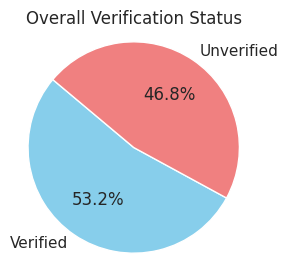

In [5]:
verification_counts = airlineReview['Verified'].value_counts()
print(verification_counts)
print(" ")

labels = ['Verified', 'Unverified']
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(3, 3))
plt.pie(verification_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Verification Status')
plt.axis('equal')
plt.show()

In [6]:
verifiedairlineReview = airlineReview[airlineReview['Verified']>0]

In [7]:
verification_counts = verifiedairlineReview['Verified'].value_counts()
print(verification_counts)
print(" ")

Verified
True    12322
Name: count, dtype: int64
 


This shows a successful drop of unverified reviews. 

In [8]:
verifiedairlineReview

Airline Name Overall_Rating  \
0        AB Aviation              9   
1        AB Aviation              1   
2        AB Aviation              1   
4      Adria Airways              1   
5      Adria Airways              1   
...              ...            ...   
23164         ZIPAIR              1   
23167         ZIPAIR              1   
23168         ZIPAIR              3   
23169         ZIPAIR              6   
23170         ZIPAIR              1   

                                     Review_Title          Review Date  \
0                         "pretty decent airline"   11th November 2019   
1                            "Not a good airline"       25th June 2019   
2                  "flight was fortunately short"       25th June 2019   
4           "it ruined our last days of holidays"  24th September 2019   
5                       "Had very bad experience"  17th September 2019   
...                                           ...                  ...   
23164  "$300 savings was absolutely not worth it"       22nd July 2022   
23167                        "Avoid at all costs"        1st June 2022   
23168              "Will not recommend to anyone"        31st May 2022   
23169                 "It was immaculately clean"        23rd May 2022   
23170      "lost all of our money with no refund"        20th May 2022   

       Verified                                             Review  \
0          True    Moroni to Moheli. Turned out to be a pretty ...   
1          True   Moroni to Anjouan. It is a very small airline...   
2          True    Anjouan to Dzaoudzi. A very small airline an...   
4          True   Do not book a flight with this airline! My fr...   
5          True    Had very bad experience with rerouted and ca...   
...         ...                                                ...   
23164      True    My issues started before we even flew. I rec...   
23167      True    Avoid at all costs. I booked flights to go f...   
23168      True    Flight was leaving at 23.15 and after an hou...   
23169      True   Zipair is JAL’s budget airline. They don’t ha...   
23170      True    They lied about connection in Narita and we ...   

      Type Of Traveller       Seat Type      Date Flown  Seat Comfort  \
0          Solo Leisure   Economy Class   November 2019           4.0   
1          Solo Leisure   Economy Class       June 2019           2.0   
2          Solo Leisure   Economy Class       June 2019           2.0   
4        Couple Leisure   Economy Class  September 2019           1.0   
5        Couple Leisure   Economy Class  September 2019           1.0   
...                 ...             ...             ...           ...   
23164    Family Leisure   Economy Class       July 2022           3.0   
23167      Solo Leisure   Economy Class       June 2022           NaN   
23168          Business   Economy Class        May 2022           2.0   
23169          Business  Business Class        May 2022           3.0   
23170      Solo Leisure   Economy Class        May 2022           NaN   

       Cabin Staff Service  Food & Beverages  Ground Service  \
0                      5.0               4.0             4.0   
1                      2.0               1.0             1.0   
2                      1.0               1.0             1.0   
4                      1.0               1.0             1.0   
5                      1.0               1.0             1.0   
...                    ...               ...             ...   
23164                  4.0               1.0             1.0   
23167                  NaN               NaN             NaN   
23168                  4.0               2.0             1.0   
23169                  4.0               3.0             1.0   
23170                  NaN               NaN             1.0   

       Inflight Entertainment  Wifi & Connectivity  Value For Money  \
0                         NaN                  NaN              3.0   
1                    

We proceed to identify reviews with null values and visualizing which columns have the most NaN or empty fields

In [9]:
!pip install missingno==0.5.2


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
import missingno as msno
nan_count = verifiedairlineReview.isna().sum()
total_rows = len(verifiedairlineReview)

nan_percentage = (nan_count / total_rows) * 100

for column in verifiedairlineReview.columns:
    percentage = (nan_count[column] / total_rows) * 100
    print(f"Percentage of NaN values in {column}: {percentage:.2f}%")

nan_count_df = pd.DataFrame(nan_count)

Percentage of NaN values in Airline Name: 0.00%
Percentage of NaN values in Overall_Rating: 0.00%
Percentage of NaN values in Review_Title: 0.00%
Percentage of NaN values in Review Date: 0.00%
Percentage of NaN values in Verified: 0.00%
Percentage of NaN values in Review: 0.00%
Percentage of NaN values in Type Of Traveller: 0.01%
Percentage of NaN values in Seat Type: 0.00%
Percentage of NaN values in Date Flown: 0.00%
Percentage of NaN values in Seat Comfort: 9.98%
Percentage of NaN values in Cabin Staff Service: 10.70%
Percentage of NaN values in Food & Beverages: 33.66%
Percentage of NaN values in Ground Service: 5.76%
Percentage of NaN values in Inflight Entertainment: 50.70%
Percentage of NaN values in Wifi & Connectivity: 68.92%
Percentage of NaN values in Value For Money: 0.01%
Percentage of NaN values in Recommended: 0.00%


<AxesSubplot: >

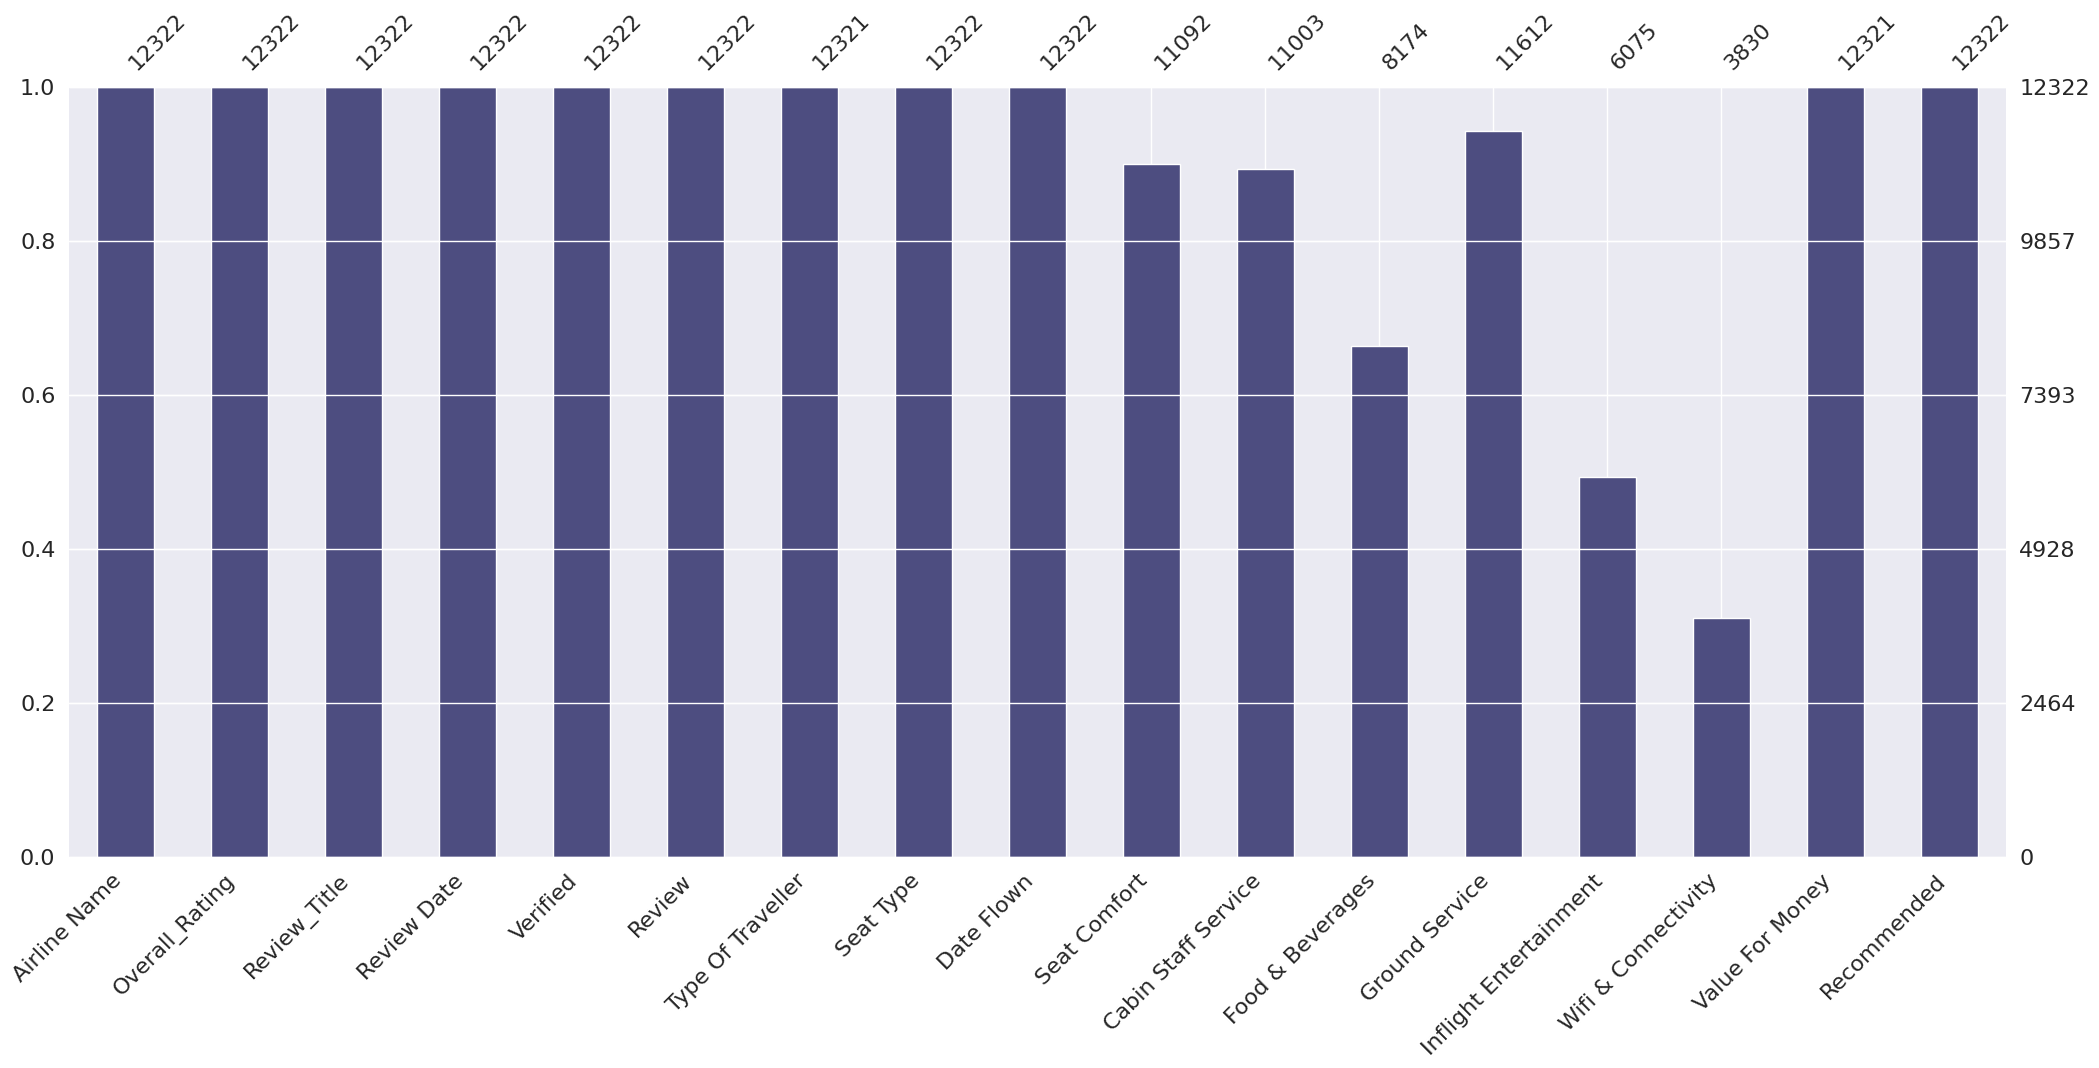

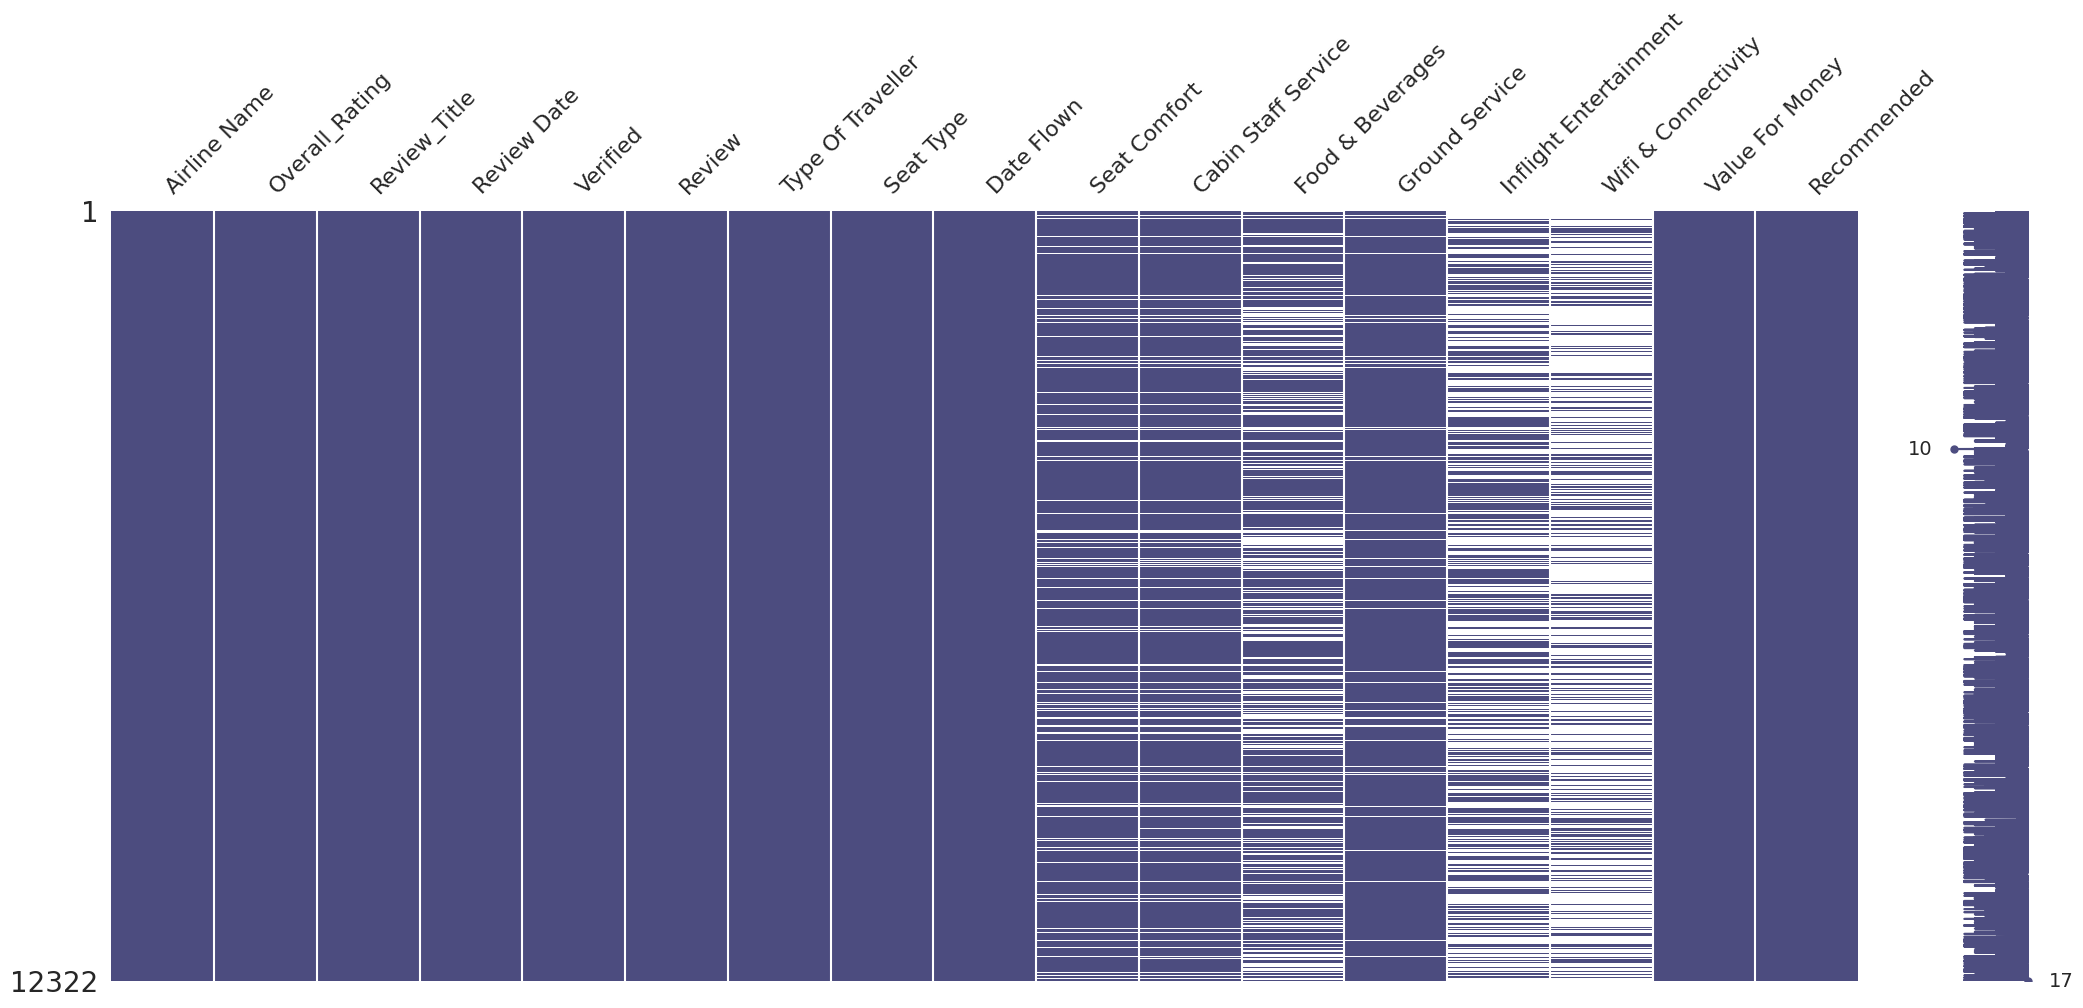

In [11]:
msno.bar(verifiedairlineReview, color =(0.3,0.3, 0.5))
msno.matrix(verifiedairlineReview, color=(0.3,0.3, 0.5))

The first graph provides a visualisation of the non-null values in each column in a bar format while the second graph is a matrix forms where the white dashes represent empty values. 

As the first graph shows, the dataset has 12322 rows and a complete column has all 12322 rows filled with non NaN values. 

Both visualisations, support our calculations where the percentage of NaN values in Inflight Entertainment is 50.70% and percentage of NaN values in Wifi & Connectivity is 68.92% which is reflected by the short bar for these column in the first graph and relatively empty looking matrices in the second graph.

This is due to the fact that all these services are mostly only offered on full service airlines and not on low cost carriers. Even full service airlines may not include all services on short haul trips. Such services are common among European airlines especially when they fly across Europe they often offer a "budget" version of their service with no entertainment and wifi. 

However, for a fair analysis of the dataset we should look to eliminate these NaN valued rows.

This record below was dropped as the passenger had not flown and every column was NA. This review was about refund collection and nothing to do with the travelling experience. 

In [12]:
index_to_drop = airlineReview[
    (airlineReview['Airline Name'] == 'Citilink') &
    (airlineReview['Review Date'] == '21st September 2020') &
    (airlineReview['Review'].str.contains('process the voucher refund', case=False, na=False))
].index

index_to_drop

Index([7125], dtype='int64')

The Date Flown columns will be converted to a datetime for easy segmentation of the dataset later on.

In [13]:
#Convert Date Flown to Date/Time
verifiedairlineReview['Date Flown'] = pd.to_datetime(verifiedairlineReview['Date Flown'])
verifiedairlineReview['Date Flown']

/tmp/ipykernel_70/1237150107.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  verifiedairlineReview['Date Flown'] = pd.to_datetime(verifiedairlineReview['Date Flown'])
/tmp/ipykernel_70/1237150107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verifiedairlineReview['Date Flown'] = pd.to_datetime(verifiedairlineReview['Date Flown'])


0       2019-11-01
1       2019-06-01
2       2019-06-01
4       2019-09-01
5       2019-09-01
           ...    
23164   2022-07-01
23167   2022-06-01
23168   2022-05-01
23169   2022-05-01
23170   2022-05-01
Name: Date Flown, Length: 12322, dtype: datetime64[ns]

In [14]:
columns_to_fill = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                   'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity']

# DataFrame that fills NA values with 0
verifiedairlineReview_filled = verifiedairlineReview.copy()
verifiedairlineReview_filled[columns_to_fill] = verifiedairlineReview_filled[columns_to_fill].fillna(0)

# Explicitly copying the DataFrame for dropping rows with NA values
verifiedairlineReview_dropped = verifiedairlineReview.copy().dropna(subset=columns_to_fill)

# Check changes in the filled DataFrame
print("DF with NA values filled with 0:")
print(verifiedairlineReview_filled[columns_to_fill].isnull().sum())

# Check changes in the dropped DataFrame
print("\DF with NA values dropped:")
print(verifiedairlineReview_dropped[columns_to_fill].isnull().sum())


DF with NA values filled with 0:
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
dtype: int64
\DF with NA values dropped:
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
dtype: int64


The verifiedairlineReview_filled dataframe consists of all reviews regardless of whether they had in flight entertainment, wifi connectivity or not while the verifiedairlineReview_dropped only has reviews in which all the criterias had a non NA rating. 

We did this because filling all the NA with 0 may result in a skew in our subsequent analysis but we wanted to retain airlines that may be low cost and do not offer the full suite of services. 

Hence, the verifiedairlineReview_filled consists of all airlines that have verified reviews while the verifiedairlineReview_dropped likely only consists of full service airlines that offer all services. 

We then proceed to ensure that our target columns which are the amenities and rating of a review are all in integer format for ease of analysis during EDA and ML techniques

In [15]:
columns_to_convert = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                      'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Overall_Rating']

for column in columns_to_convert:
    verifiedairlineReview_filled[column] = verifiedairlineReview_filled[column].astype(int)
    verifiedairlineReview_dropped[column] = verifiedairlineReview_dropped[column].astype(int)

# Check the changes
print(verifiedairlineReview_filled[columns_to_convert].dtypes)
print(verifiedairlineReview_dropped[columns_to_convert].dtypes)

Seat Comfort              int64
Cabin Staff Service       int64
Food & Beverages          int64
Ground Service            int64
Inflight Entertainment    int64
Wifi & Connectivity       int64
Overall_Rating            int64
dtype: object
Seat Comfort              int64
Cabin Staff Service       int64
Food & Beverages          int64
Ground Service            int64
Inflight Entertainment    int64
Wifi & Connectivity       int64
Overall_Rating            int64
dtype: object


In [16]:
verifiedairlineReview_filled

Airline Name  Overall_Rating  \
0        AB Aviation               9   
1        AB Aviation               1   
2        AB Aviation               1   
4      Adria Airways               1   
5      Adria Airways               1   
...              ...             ...   
23164         ZIPAIR               1   
23167         ZIPAIR               1   
23168         ZIPAIR               3   
23169         ZIPAIR               6   
23170         ZIPAIR               1   

                                     Review_Title          Review Date  \
0                         "pretty decent airline"   11th November 2019   
1                            "Not a good airline"       25th June 2019   
2                  "flight was fortunately short"       25th June 2019   
4           "it ruined our last days of holidays"  24th September 2019   
5                       "Had very bad experience"  17th September 2019   
...                                           ...                  ...   
23164  "$300 savings was absolutely not worth it"       22nd July 2022   
23167                        "Avoid at all costs"        1st June 2022   
23168              "Will not recommend to anyone"        31st May 2022   
23169                 "It was immaculately clean"        23rd May 2022   
23170      "lost all of our money with no refund"        20th May 2022   

       Verified                                             Review  \
0          True    Moroni to Moheli. Turned out to be a pretty ...   
1          True   Moroni to Anjouan. It is a very small airline...   
2          True    Anjouan to Dzaoudzi. A very small airline an...   
4          True   Do not book a flight with this airline! My fr...   
5          True    Had very bad experience with rerouted and ca...   
...         ...                                                ...   
23164      True    My issues started before we even flew. I rec...   
23167      True    Avoid at all costs. I booked flights to go f...   
23168      True    Flight was leaving at 23.15 and after an hou...   
23169      True   Zipair is JAL’s budget airline. They don’t ha...   
23170      True    They lied about connection in Narita and we ...   

      Type Of Traveller       Seat Type Date Flown  Seat Comfort  \
0          Solo Leisure   Economy Class 2019-11-01             4   
1          Solo Leisure   Economy Class 2019-06-01             2   
2          Solo Leisure   Economy Class 2019-06-01             2   
4        Couple Leisure   Economy Class 2019-09-01             1   
5        Couple Leisure   Economy Class 2019-09-01             1   
...                 ...             ...        ...           ...   
23164    Family Leisure   Economy Class 2022-07-01             3   
23167      Solo Leisure   Economy Class 2022-06-01             0   
23168          Business   Economy Class 2022-05-01             2   
23169          Business  Business Class 2022-05-01             3   
23170      Solo Leisure   Economy Class 2022-05-01             0   

       Cabin Staff Service  Food & Beverages  Ground Service  \
0                        5                 4               4   
1                        2                 1               1   
2                        1                 1               1   
4                        1                 1               1   
5                        1                 1               1   
...                    ...               ...             ...   
23164                    4                 1               1   
23167                    0                 0               0   
23168                    4                 2               1   
23169                    4                 3               1   
23170                    0                 0               1   

       Inflight Entertainment  Wifi & Connectivity  Value For Money  \
0                           0                    0              3.0   
1                           0                    0              2.0  

### Exploratory Data Analysis

In [17]:
verifiedairlineReview_filled.groupby("Airline Name").agg({"Recommended": "count"}).sort_values("Recommended", ascending=False)

Recommended
Airline Name                          
China Southern Airlines             97
Hainan Airlines                     97
Garuda Indonesia                    93
Qatar Airways                       92
Aeroflot Russian Airlines           90
...                                ...
Mack Air                             1
Maldivian                            1
Mann Yadanarpon Airlines             1
Manta Air                            1
JetsuiteX                            1

[422 rows x 1 columns]

In [18]:
verifiedairlineReview_dropped.groupby("Airline Name").agg({"Recommended": "count"}).sort_values("Recommended", ascending=False)

Recommended
Airline Name                          
Qatar Airways                       51
Emirates                            42
Jet Airways                         41
El Al Israel Airlines               40
Singapore Airlines                  39
...                                ...
Myanmar National Airlines            1
Avior Airlines                       1
Azur Air Germany                     1
Kulula                               1
Air Antilles                         1

[291 rows x 1 columns]

On the left we can see that China Southern Airlines, Hainan Airlines and Garuda Indonesia are among the top recommended airlines from the verfied reviews. However, their non appearance on the right, indicates that passengers who reviewed these airlines often fly without the full suite of amenities. 


Among the full service airlines, we see that Qatar Airways leads the pack in the most recommended airline followed by Emirates and the now defunct Jet Airways. However, from the two tables we can see a deviation in recommended in Qatar Airways (92 vs 51) which shows that even full service airlies often fly routes on which they do not provide full service on. 

In [19]:
# Aggregate to get the total number of reviews and the average rating per airline
verifiedairlineReview_filledsummary = verifiedairlineReview_filled.groupby('Airline Name').agg(
    Total_Reviews=('Airline Name', 'size'),
    Average_Rating=('Overall_Rating', 'mean')
).sort_values(by='Total_Reviews', ascending=False)

# Display the result
print(verifiedairlineReview_filledsummary)


                           Total_Reviews  Average_Rating
Airline Name                                            
China Southern Airlines               97        6.309278
Hainan Airlines                       97        4.298969
Garuda Indonesia                      93        3.870968
Qatar Airways                         92        3.978261
Aeroflot Russian Airlines             90        2.811111
...                                  ...             ...
Mack Air                               1        9.000000
Maldivian                              1        1.000000
Mann Yadanarpon Airlines               1        7.000000
Manta Air                              1        9.000000
JetsuiteX                              1        1.000000

[422 rows x 2 columns]


In [20]:
# Aggregate to get the total number of reviews and the average rating per airline
verifiedairlineReview_droppedsummary = verifiedairlineReview_dropped.groupby('Airline Name').agg(
    Total_Reviews=('Airline Name', 'size'),
    Average_Rating=('Overall_Rating', 'mean')
).sort_values(by='Total_Reviews', ascending=False)

# Display the result
print(verifiedairlineReview_droppedsummary)

                           Total_Reviews  Average_Rating
Airline Name                                            
Qatar Airways                         51        4.039216
Emirates                              42        2.833333
Jet Airways                           41        1.951220
El Al Israel Airlines                 40        2.925000
Singapore Airlines                    39        4.000000
...                                  ...             ...
Myanmar National Airlines              1        1.000000
Avior Airlines                         1        1.000000
Azur Air Germany                       1        1.000000
Kulula                                 1        1.000000
Air Antilles                           1        1.000000

[291 rows x 2 columns]


By calculating the average rating, we can sieve out certain information like even though Emirates was the second most recommended full service carrier its average rating is way lower than Singapore Airlines which is almost on par with Qatar Airways.

Recommended
no     8571
yes    3751
Name: count, dtype: int64
 


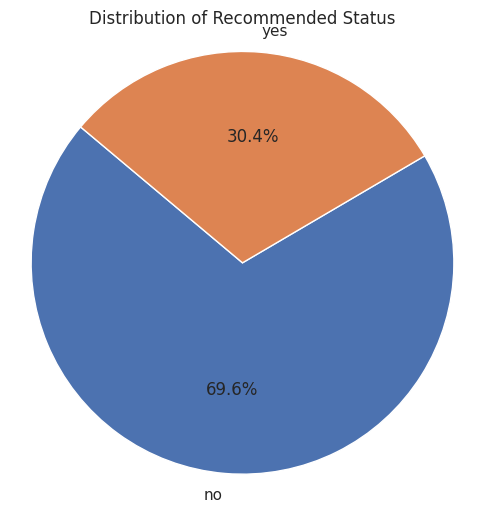

In [21]:
Recommendation_counts = verifiedairlineReview_filled['Recommended'].value_counts()
print(Recommendation_counts)
print(" ")

plt.figure(figsize=(6, 6))
plt.pie(Recommendation_counts, labels=Recommendation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recommended Status')
plt.axis('equal')
plt.show()


Recommended
no     2703
yes     774
Name: count, dtype: int64
 


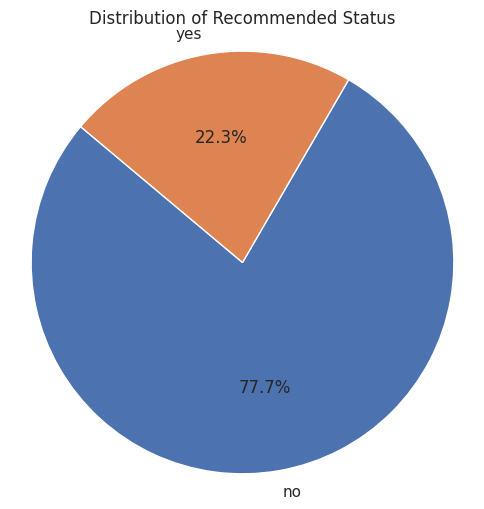

In [22]:
Recommendation_counts = verifiedairlineReview_dropped['Recommended'].value_counts()
print(Recommendation_counts)
print(" ")

plt.figure(figsize=(6, 6))
plt.pie(Recommendation_counts, labels=Recommendation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recommended Status')
plt.axis('equal')
plt.show()


This shows that a great majority of the reviews are probably unhappy passengers who would not recommend their airline and among full service carriers the likelihood of being recommended further decreases showing that either passengers are only more likely to post reviews of negative expereinces as they probably expect a good experience with a full service carrier as the baseline.

Seat Type
Economy Class      10578
Business Class      1251
Premium Economy      383
First Class          110
Name: count, dtype: int64
 


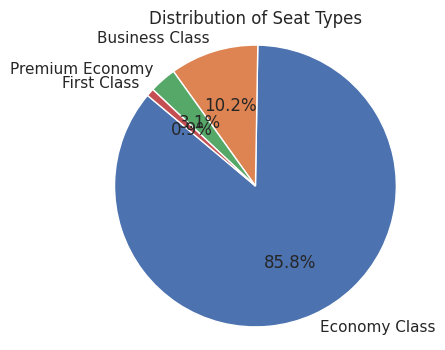

In [23]:
SeatType_counts = verifiedairlineReview_filled['Seat Type'].value_counts()
print(SeatType_counts)
print(" ")

plt.figure(figsize=(4, 4))
plt.pie(SeatType_counts, labels=SeatType_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seat Types')
plt.axis('equal')
plt.show()

Seat Type
Economy Class      2869
Business Class      432
Premium Economy     130
First Class          46
Name: count, dtype: int64
 


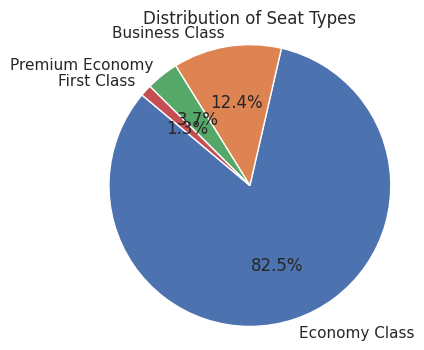

In [24]:
SeatType_counts = verifiedairlineReview_dropped['Seat Type'].value_counts()
print(SeatType_counts)
print(" ")

plt.figure(figsize=(4, 4))
plt.pie(SeatType_counts, labels=SeatType_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seat Types')
plt.axis('equal')
plt.show()

Ther percentage of people travelling in the four classes of travel are rather similar across both datasets but since full service airlines often have more seats in the preium cabin, there is a slight increase in reviews of the premium cabins as shown by the decrease in economy class reviews (85.8 vs 82.5)

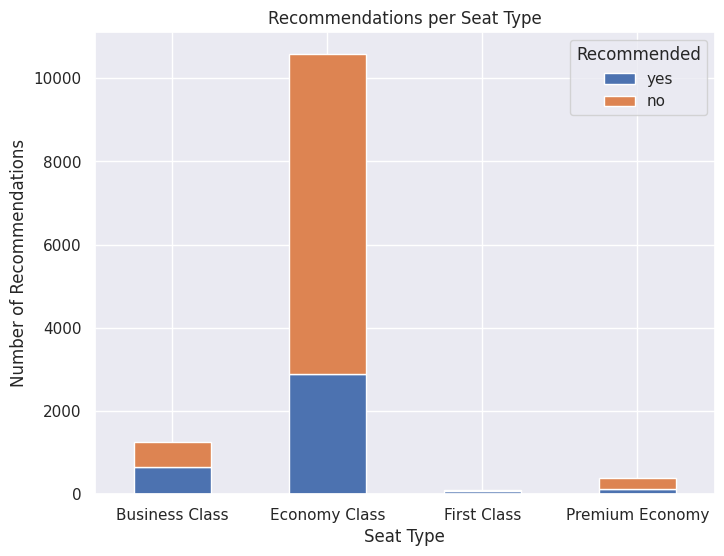

Recommendations Count for Each Seat Type:
Recommended        no   yes  Total  % Yes of Total
Seat Type                                         
Business Class    593   658   1251       52.597922
Economy Class    7679  2899  10578       27.405937
First Class        43    67    110       60.909091
Premium Economy   256   127    383       33.159269


In [25]:
grouped_data = verifiedairlineReview_filled.groupby(['Seat Type', 'Recommended']).size().unstack(fill_value=0)

# Adding total recommendations per seat type
grouped_data['Total'] = grouped_data.sum(axis=1)

# Adding percentage of 'Yes' recommendations
grouped_data['% Yes of Total'] = (grouped_data['yes'] / grouped_data['Total']) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
grouped_data[['yes', 'no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Recommendations per Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Number of Recommendations')
plt.xticks(rotation=0)
plt.legend(title='Recommended')
plt.show()

# Printing the updated DataFrame with total and percentage of 'Yes'
print("Recommendations Count for Each Seat Type:")
print(grouped_data[['no', 'yes', 'Total', '% Yes of Total']])


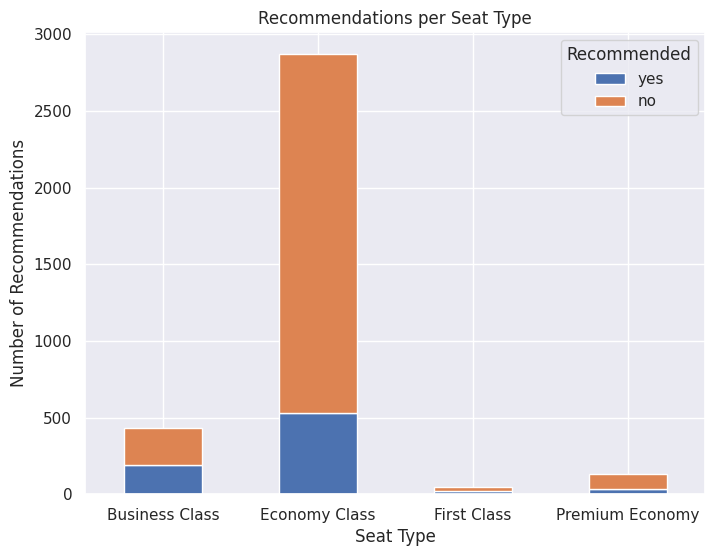

Recommendations Count for Each Seat Type:
Recommended        no  yes  Total  % Yes of Total
Seat Type                                        
Business Class    243  189    432       43.750000
Economy Class    2339  530   2869       18.473336
First Class        22   24     46       52.173913
Premium Economy    99   31    130       23.846154


In [26]:
grouped_data = verifiedairlineReview_dropped.groupby(['Seat Type', 'Recommended']).size().unstack(fill_value=0)

# Adding total recommendations per seat type
grouped_data['Total'] = grouped_data.sum(axis=1)

# Adding percentage of 'Yes' recommendations
grouped_data['% Yes of Total'] = (grouped_data['yes'] / grouped_data['Total']) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
grouped_data[['yes', 'no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Recommendations per Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Number of Recommendations')
plt.xticks(rotation=0)
plt.legend(title='Recommended')
plt.show()

# Printing the updated DataFrame with total and percentage of 'Yes'
print("Recommendations Count for Each Seat Type:")
print(grouped_data[['no', 'yes', 'Total', '% Yes of Total']])

Even across both the datasets, the trend is the same. Economy class passengers are least likely to recommend an airline and across premium economy, business class and first class there is an increasing trend in likelihood that passengers would recommned an airline. 

However, whenever a passenger gave a full review meaning the airline offered all the amenities, passengers seemed more likely to find faults and subsequently not recommend an airline compared to when they didnt have some amenities. This could be due to the fact that low cost carrier passengers probably have lesser expectations and would be content with a sub-par service of the value they paid was significantly lesser. Moreover, as well all know short haul premium cabins lack certain amenities which is why the number of recommendations nearly tripled for buisness class in the filled dataset over the dropped dataset. 

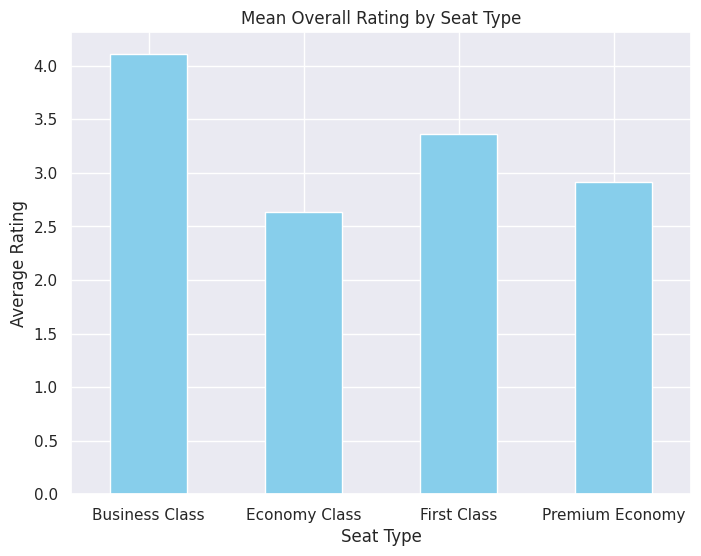

Mean Overall Ratings for Each Seat Type:
Seat Type
Business Class     4.107114
Economy Class      2.633579
First Class        3.363636
Premium Economy    2.913838
Name: Overall_Rating, dtype: float64


In [27]:
# Group by 'Seat Type' and calculate mean of 'Overall Rating'
rating_data = verifiedairlineReview_filled.groupby('Seat Type')['Overall_Rating'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
rating_data.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Mean Overall Rating by Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# Printing the mean overall ratings for each seat type
print("Mean Overall Ratings for Each Seat Type:")
print(rating_data)

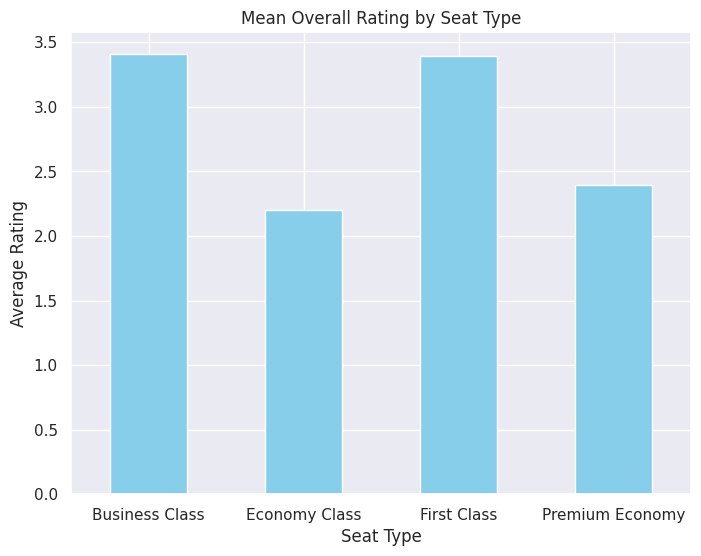

Mean Overall Ratings for Each Seat Type:
Seat Type
Business Class     3.407407
Economy Class      2.202858
First Class        3.391304
Premium Economy    2.392308
Name: Overall_Rating, dtype: float64


In [28]:
# Group by 'Seat Type' and calculate mean of 'Overall Rating'
rating_data = verifiedairlineReview_dropped.groupby('Seat Type')['Overall_Rating'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
rating_data.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Mean Overall Rating by Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# Printing the mean overall ratings for each seat type
print("Mean Overall Ratings for Each Seat Type:")
print(rating_data)

Ironically, people on business class tend to rate their experience higher than those in first class which is interesting because normally one would expect first class to have an ultra premium service that people would be greatly satisified with. 

From this point on, we will only consider the verifiedairlineReview_dropped dataset as we want to analyse the specific factors that hold the most importance to a passengers experience. 

If we were to include the reviews where people rated 'NA' that we filled with 0, it may not result in the most accurate analysis. 

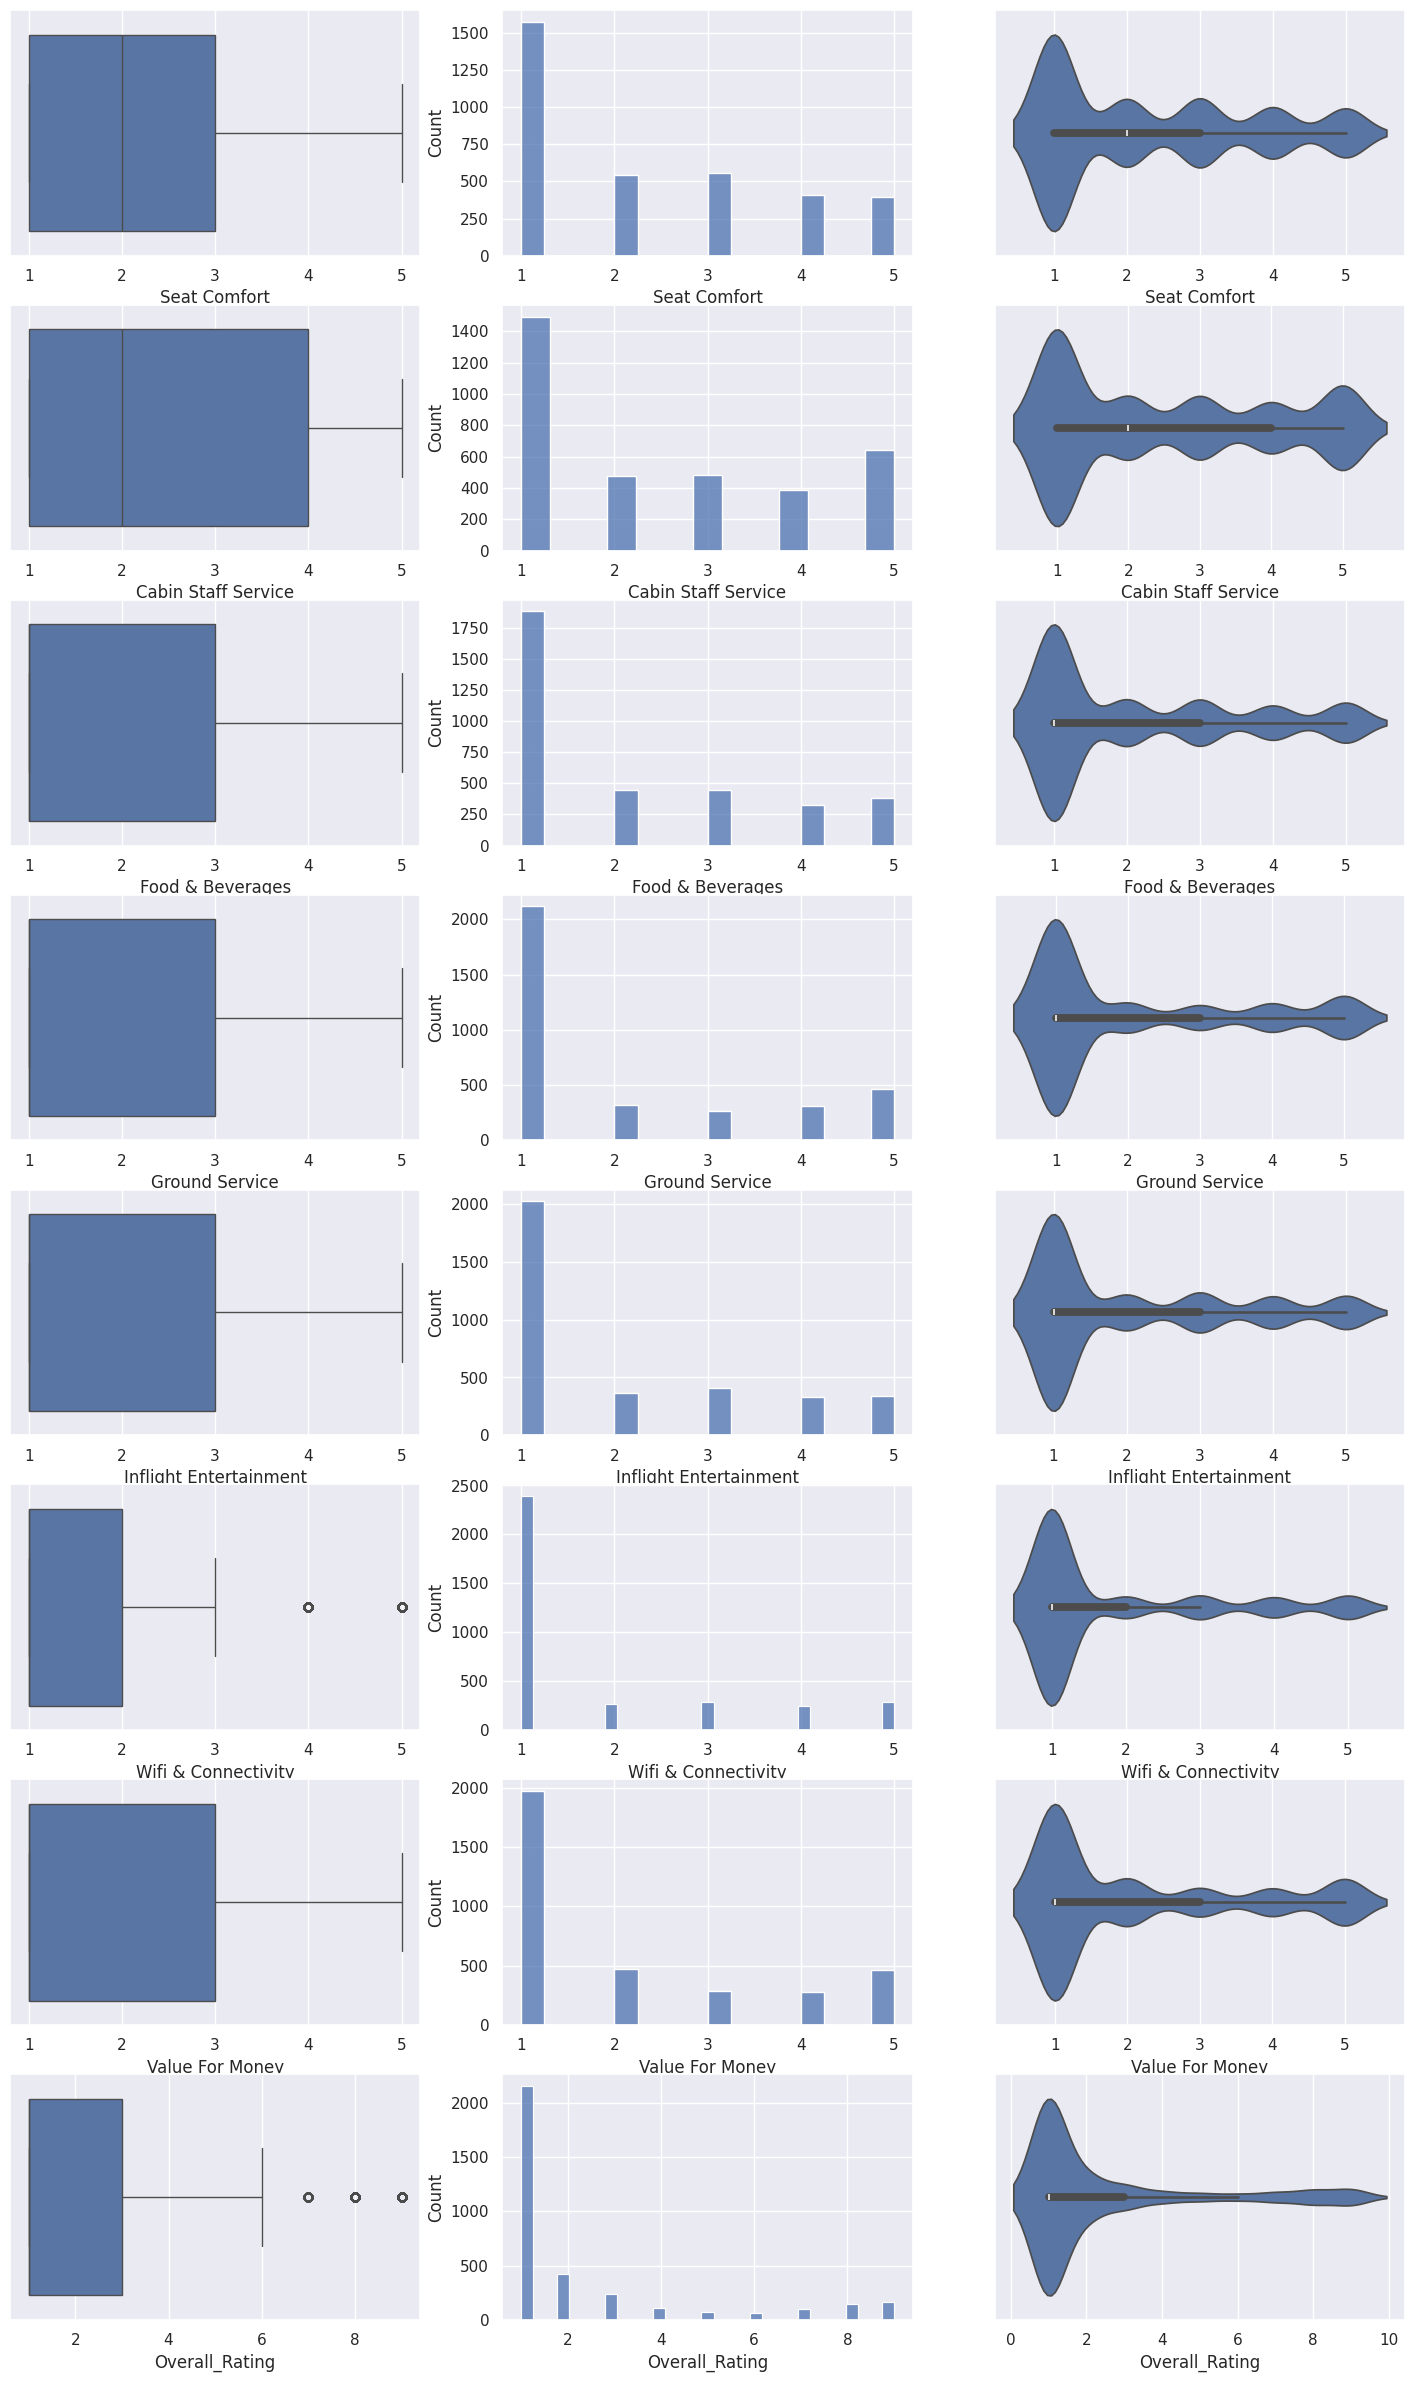

In [29]:
# Draw the distributions of all variables
ratingVariables = pd.DataFrame(verifiedairlineReview_dropped[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 
           'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Overall_Rating']])
f, axes = plt.subplots(8, 3, figsize=(18, 30))

count = 0
for var in ratingVariables:
    sb.boxplot(data = ratingVariables[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = ratingVariables[var], ax = axes[count,1])
    sb.violinplot(data = ratingVariables[var], orient = "h", ax = axes[count,2])
    count += 1

 After drawing the distribution among different variables that were rated, there is a disproportionate amount of low reviews, especially rated 1, which is the lowest possible review. This pattern can be observed across all variables above.

A possible cause of this pattern is human nature. Negative experiences tend to evoke stronger emotions than positive ones. When customers feel let down by a service, they're more likely to want to express their dissatisfaction to vent their emotions.


Next we will explore further visualizations with the respective service aspects with respect to Overall Rating

<AxesSubplot: xlabel='Seat Comfort', ylabel='Overall_Rating'>

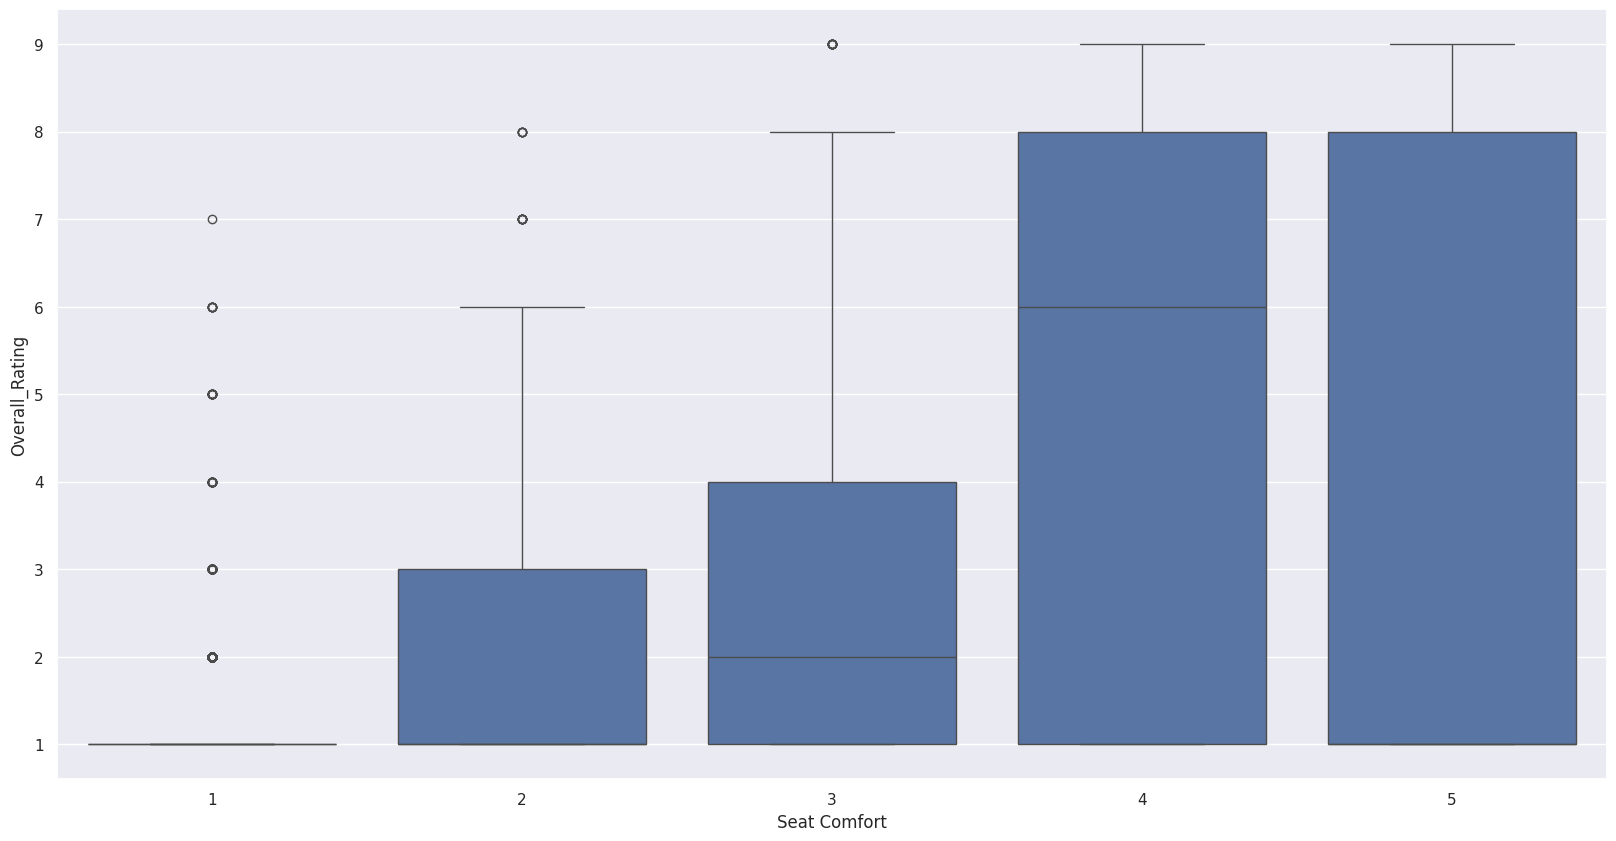

In [30]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Seat Comfort',y='Overall_Rating')

<AxesSubplot: xlabel='Cabin Staff Service', ylabel='Overall_Rating'>

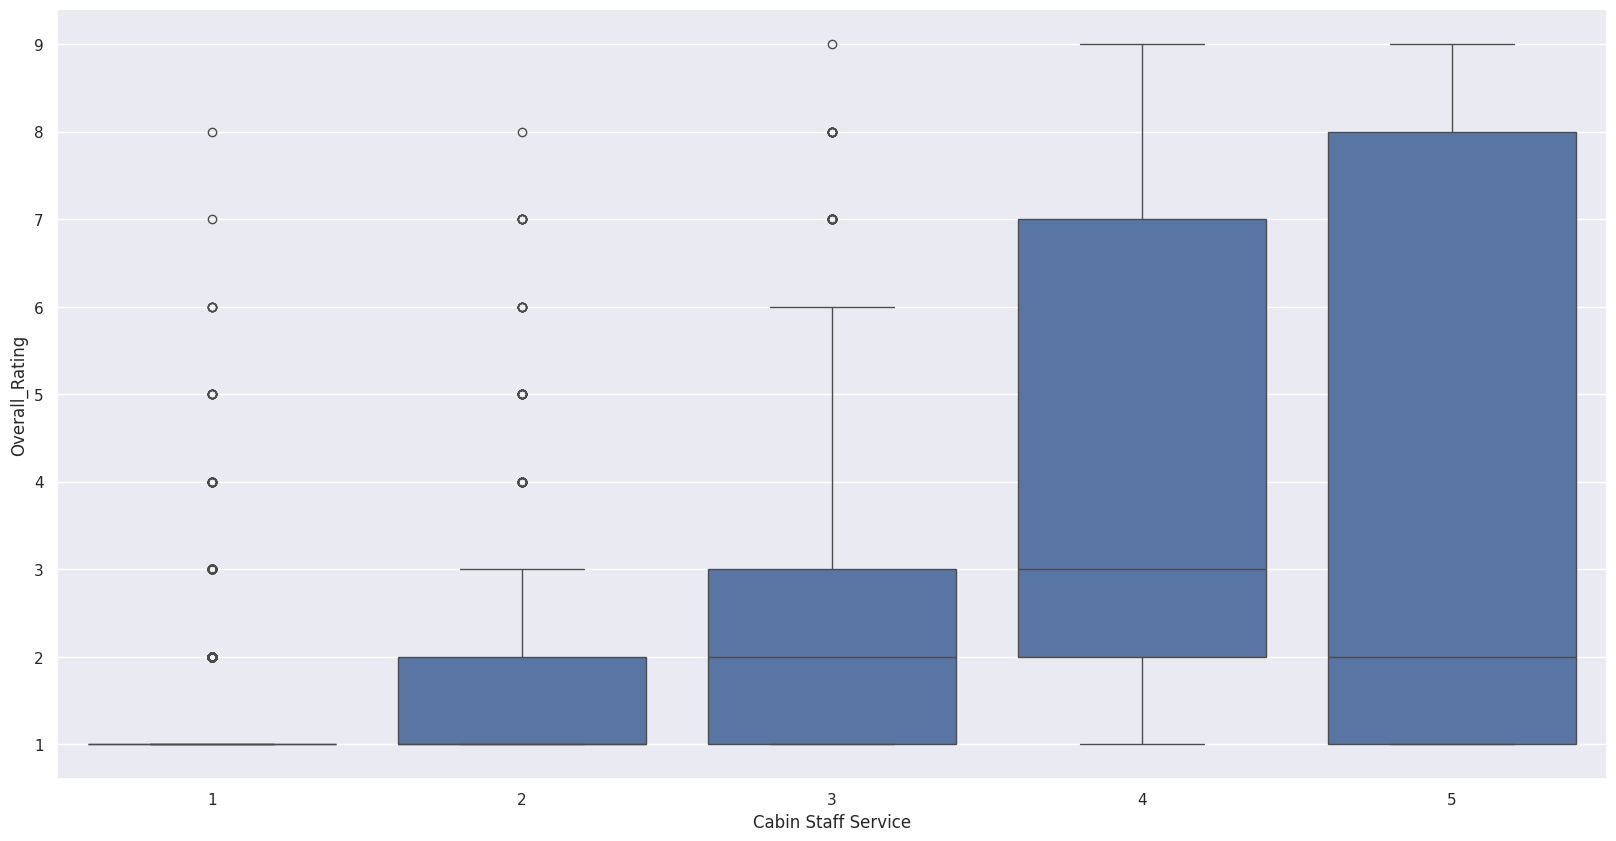

In [31]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Cabin Staff Service',y='Overall_Rating')

<AxesSubplot: xlabel='Food & Beverages', ylabel='Overall_Rating'>

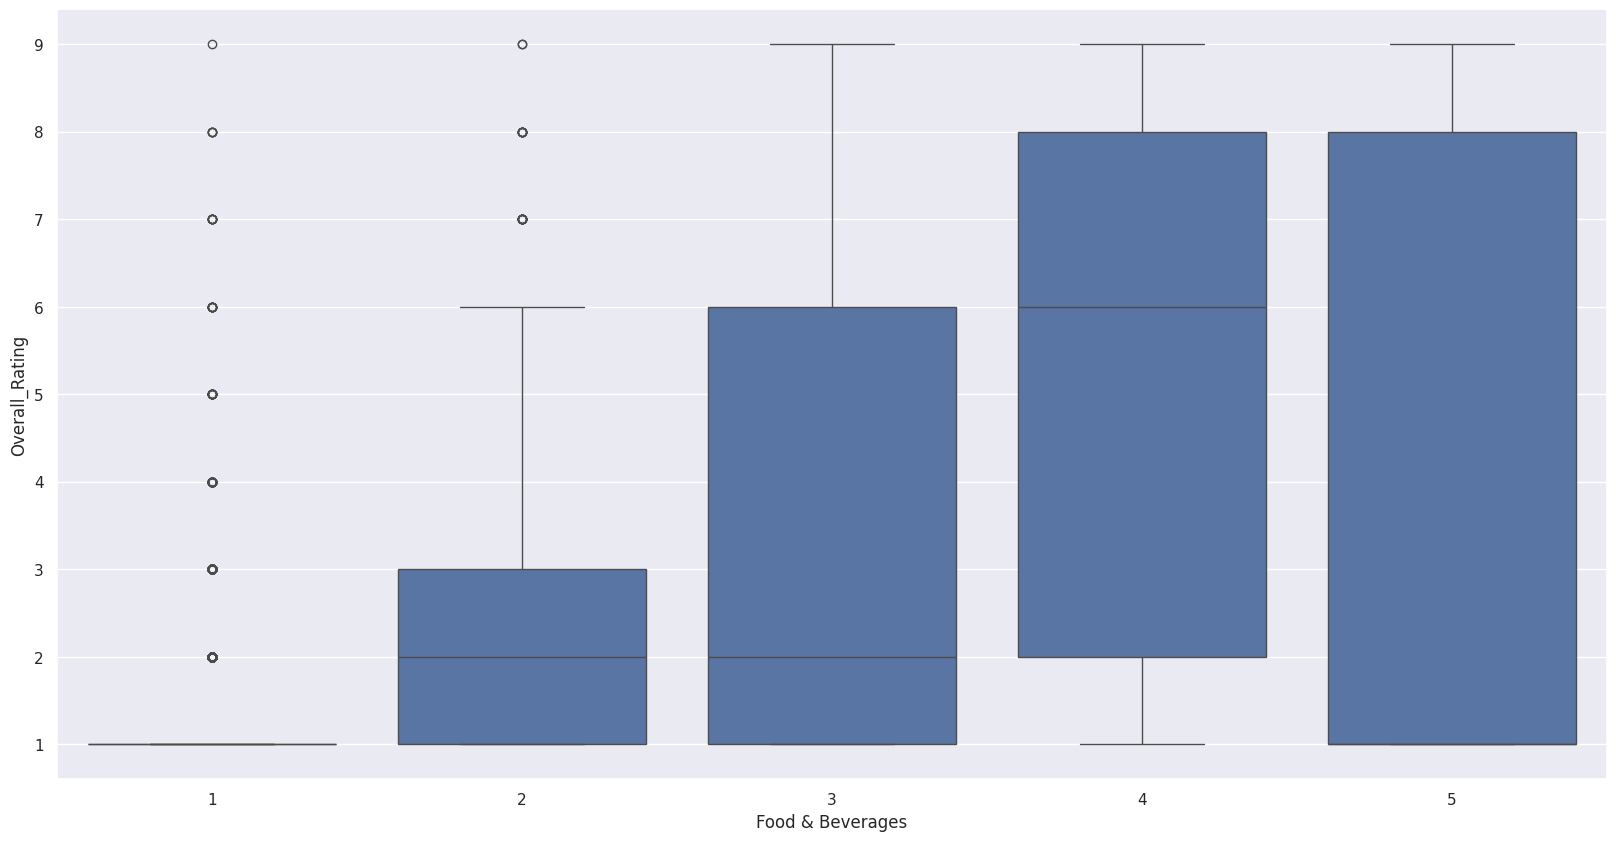

In [32]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Food & Beverages',y='Overall_Rating')

<AxesSubplot: xlabel='Ground Service', ylabel='Overall_Rating'>

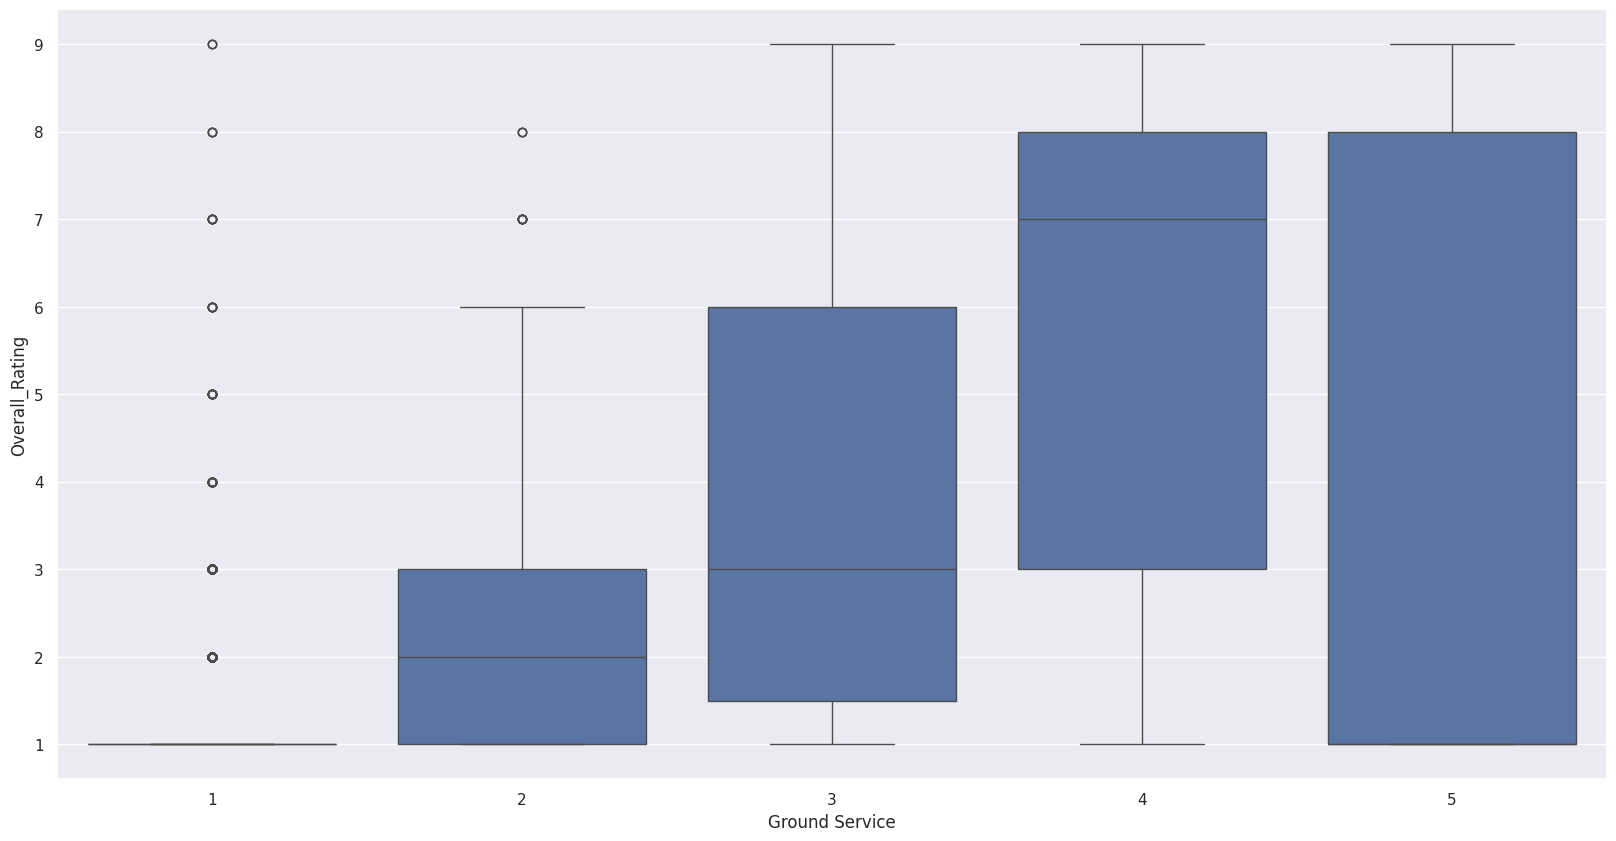

In [33]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Ground Service',y='Overall_Rating')

<AxesSubplot: xlabel='Inflight Entertainment', ylabel='Overall_Rating'>

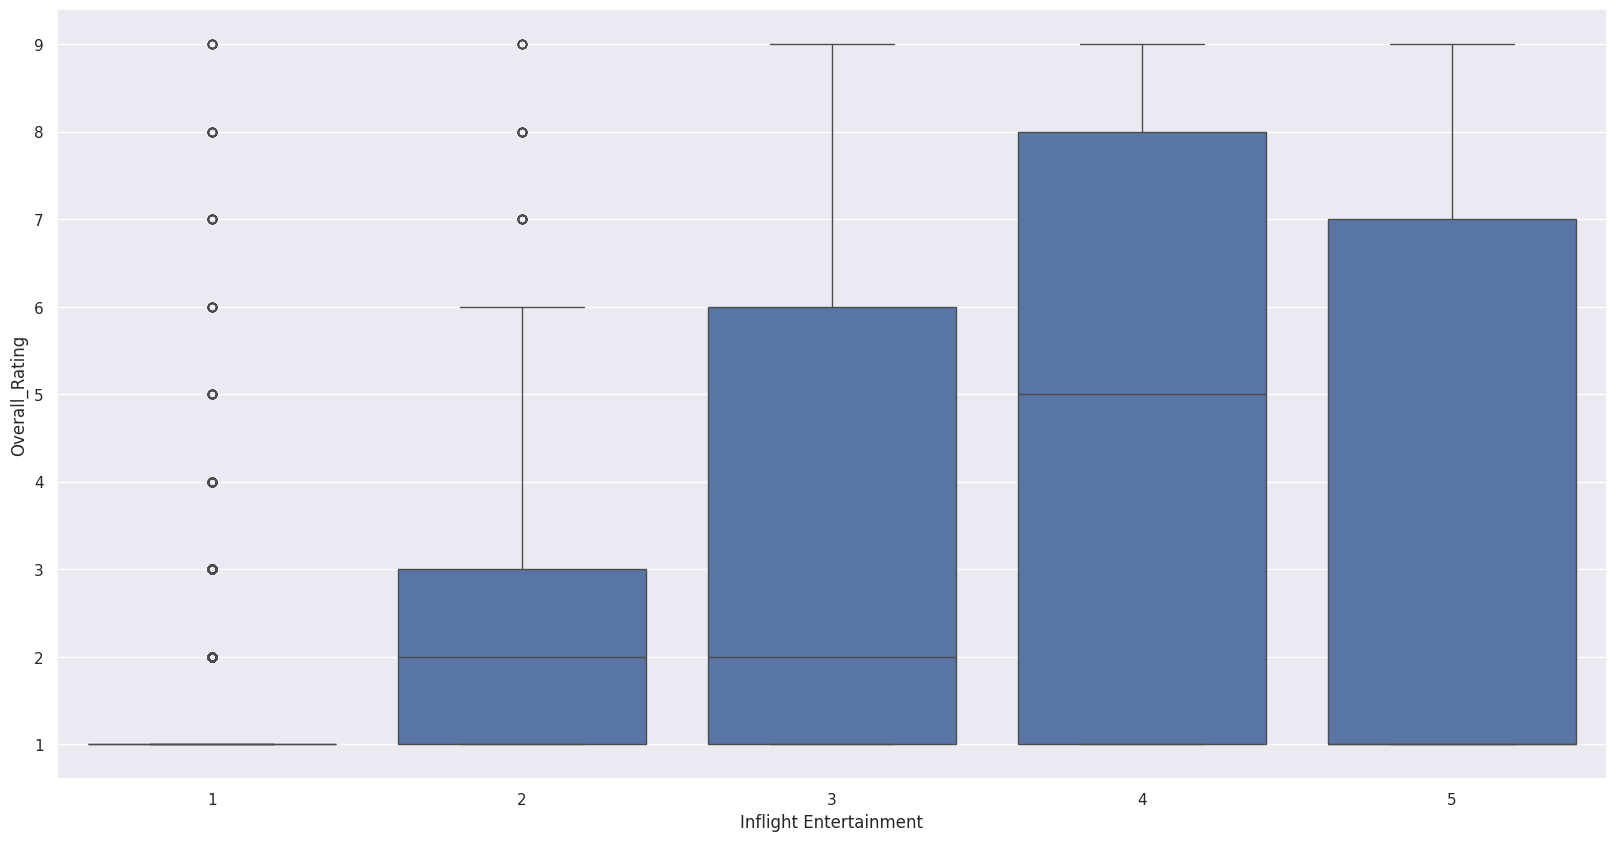

In [34]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Inflight Entertainment',y='Overall_Rating')

<AxesSubplot: xlabel='Wifi & Connectivity', ylabel='Overall_Rating'>

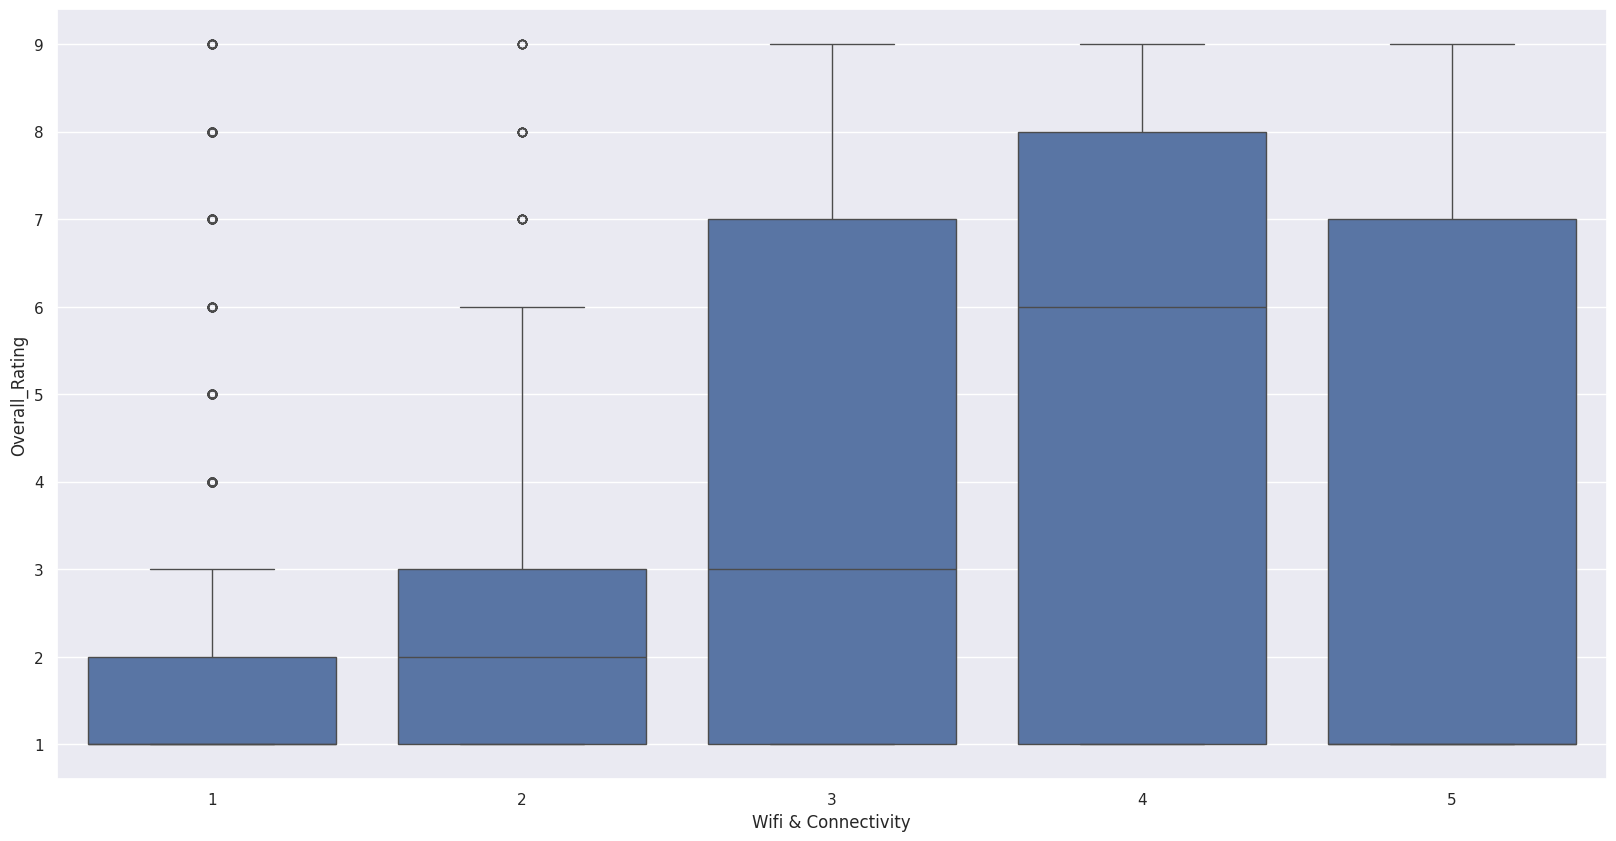

In [35]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Wifi & Connectivity',y='Overall_Rating')

<AxesSubplot: xlabel='Value For Money', ylabel='Overall_Rating'>

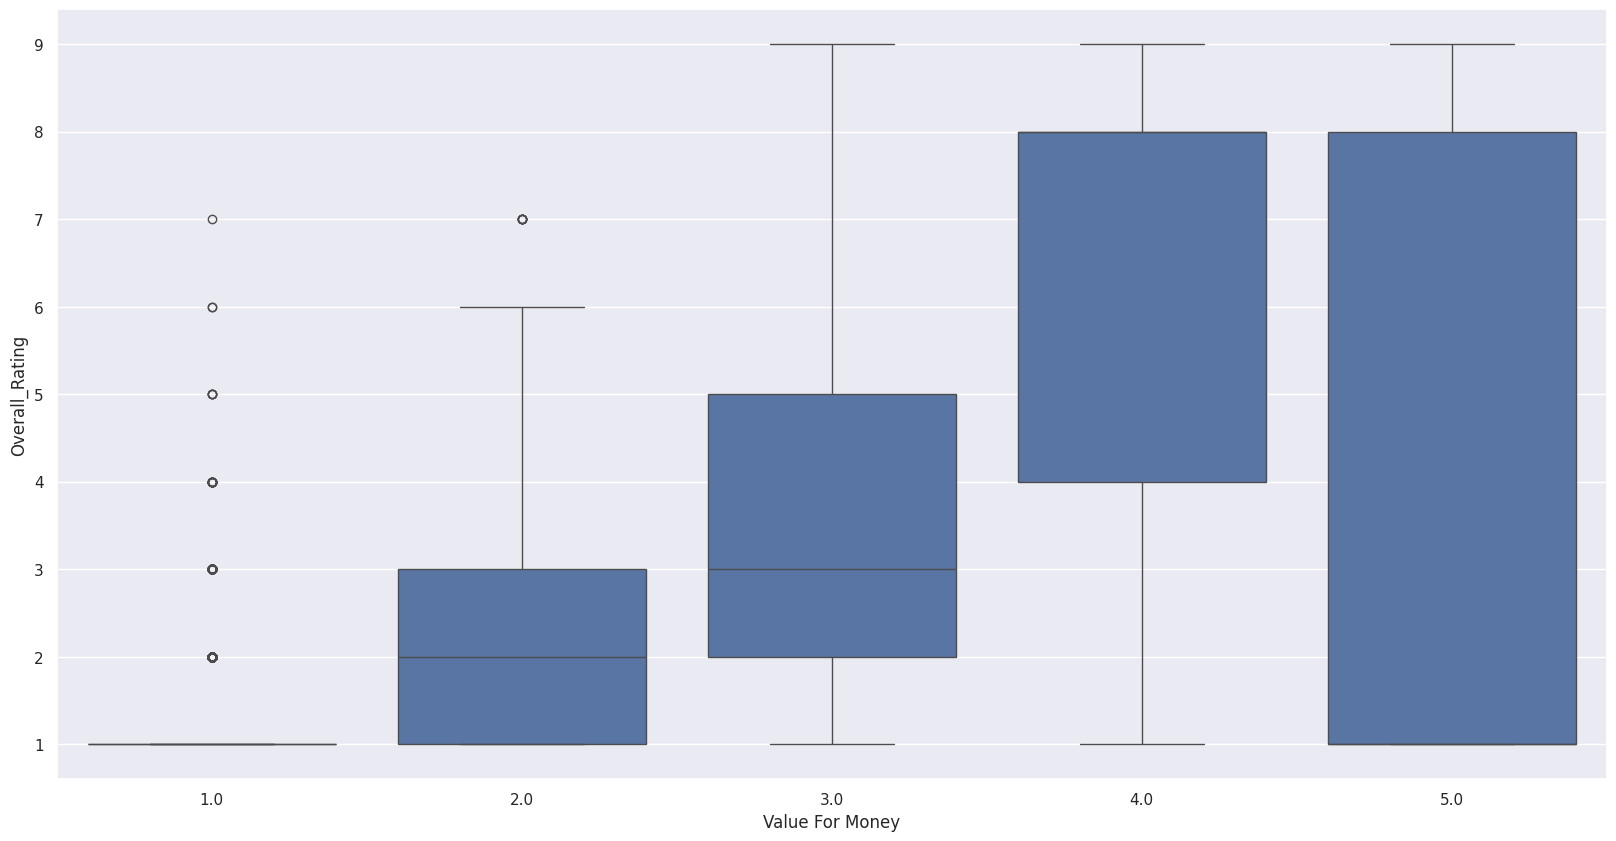

In [36]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=verifiedairlineReview_dropped, orient='v', x='Value For Money',y='Overall_Rating')

From the visualizations above, "Value For Money" looks to have the highest linear relation with Overall_Rating compared to the rest of the other variables.

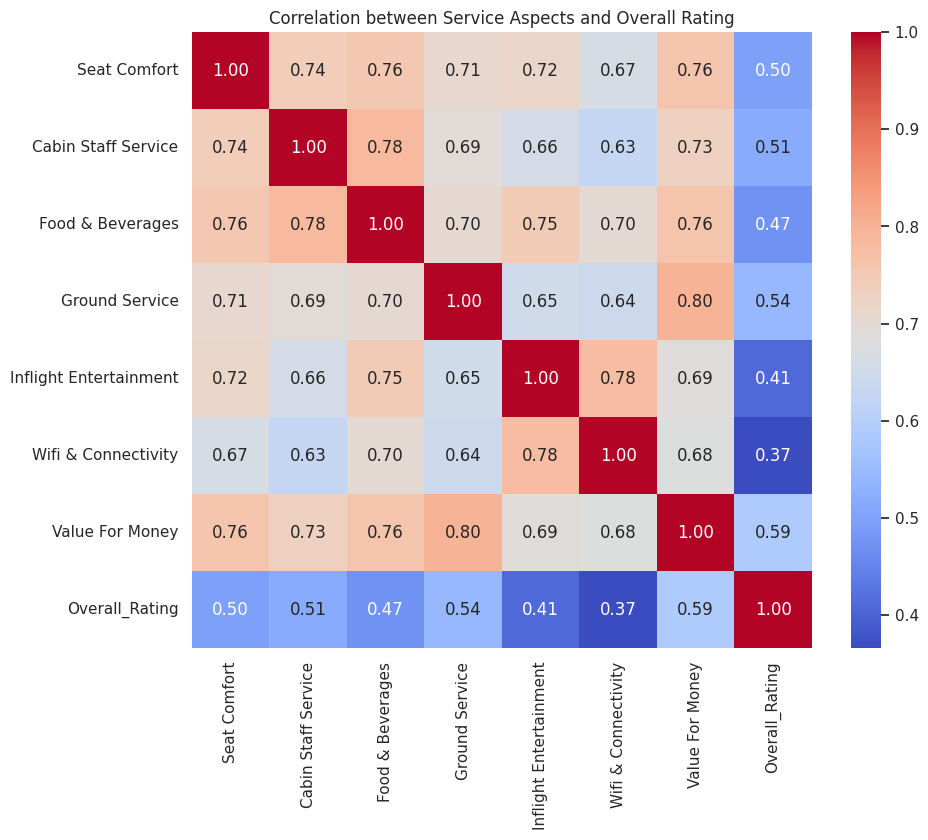

In [37]:
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 
           'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Overall_Rating']
data_numeric = verifiedairlineReview_dropped[columns]
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Service Aspects and Overall Rating')
plt.show()

We immediately see that "Value For Money" is the most important factor but is closely followed by "Ground Service", "Cabin Staff Service" and "Seat Comfort" on full service airline reviews in terms of correlation with Overall_Rating.

However, we feel that "Value For Money" is a highly subjective variable as it differs from each individual as they can come from various financial background and each has their own definition on what is "Value For Money". For example, Value For Money for person A may not apply for person B. 

Thus, we decided that "Value For Money" will be ignored as a potential variable when we explore further and for the rest of the project.

### Machine Learning Techniques (Decision Tree)

First, let us use a decision tree and compare overall rating against the other services full service airlines provide and try to determine the importance of those services.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6217874952052167

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6057471264367816



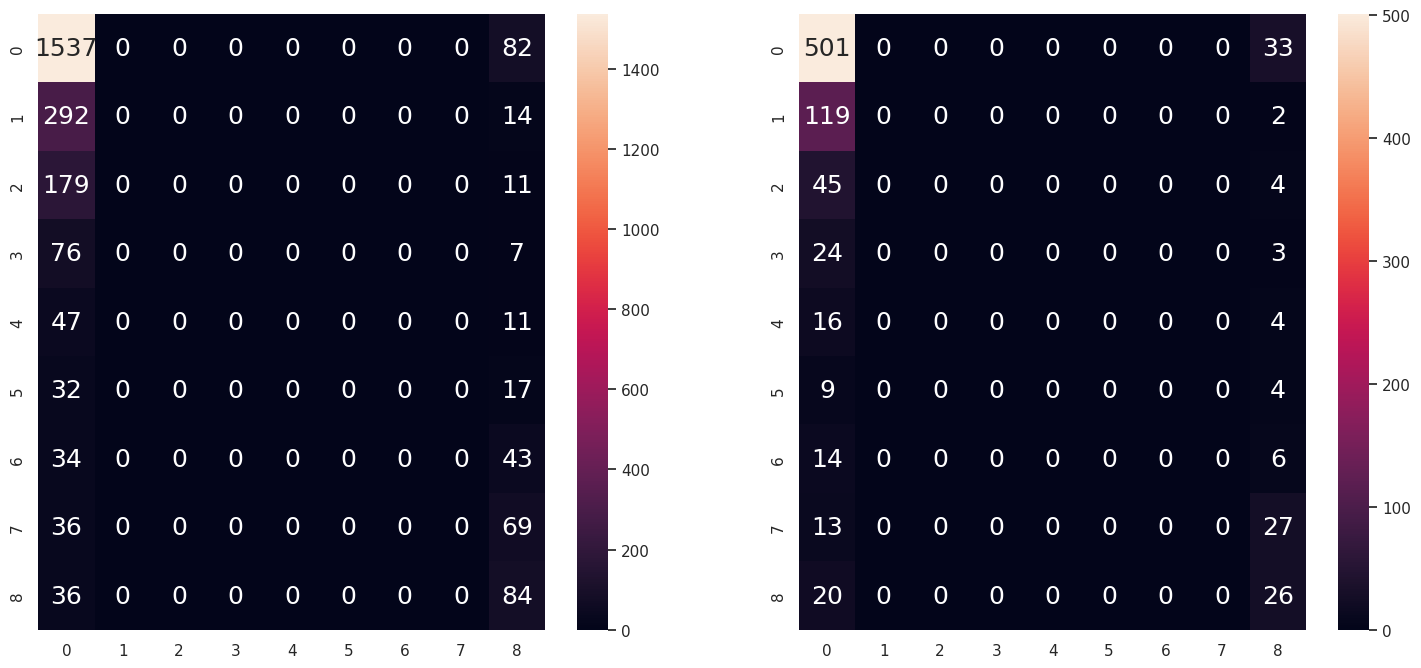

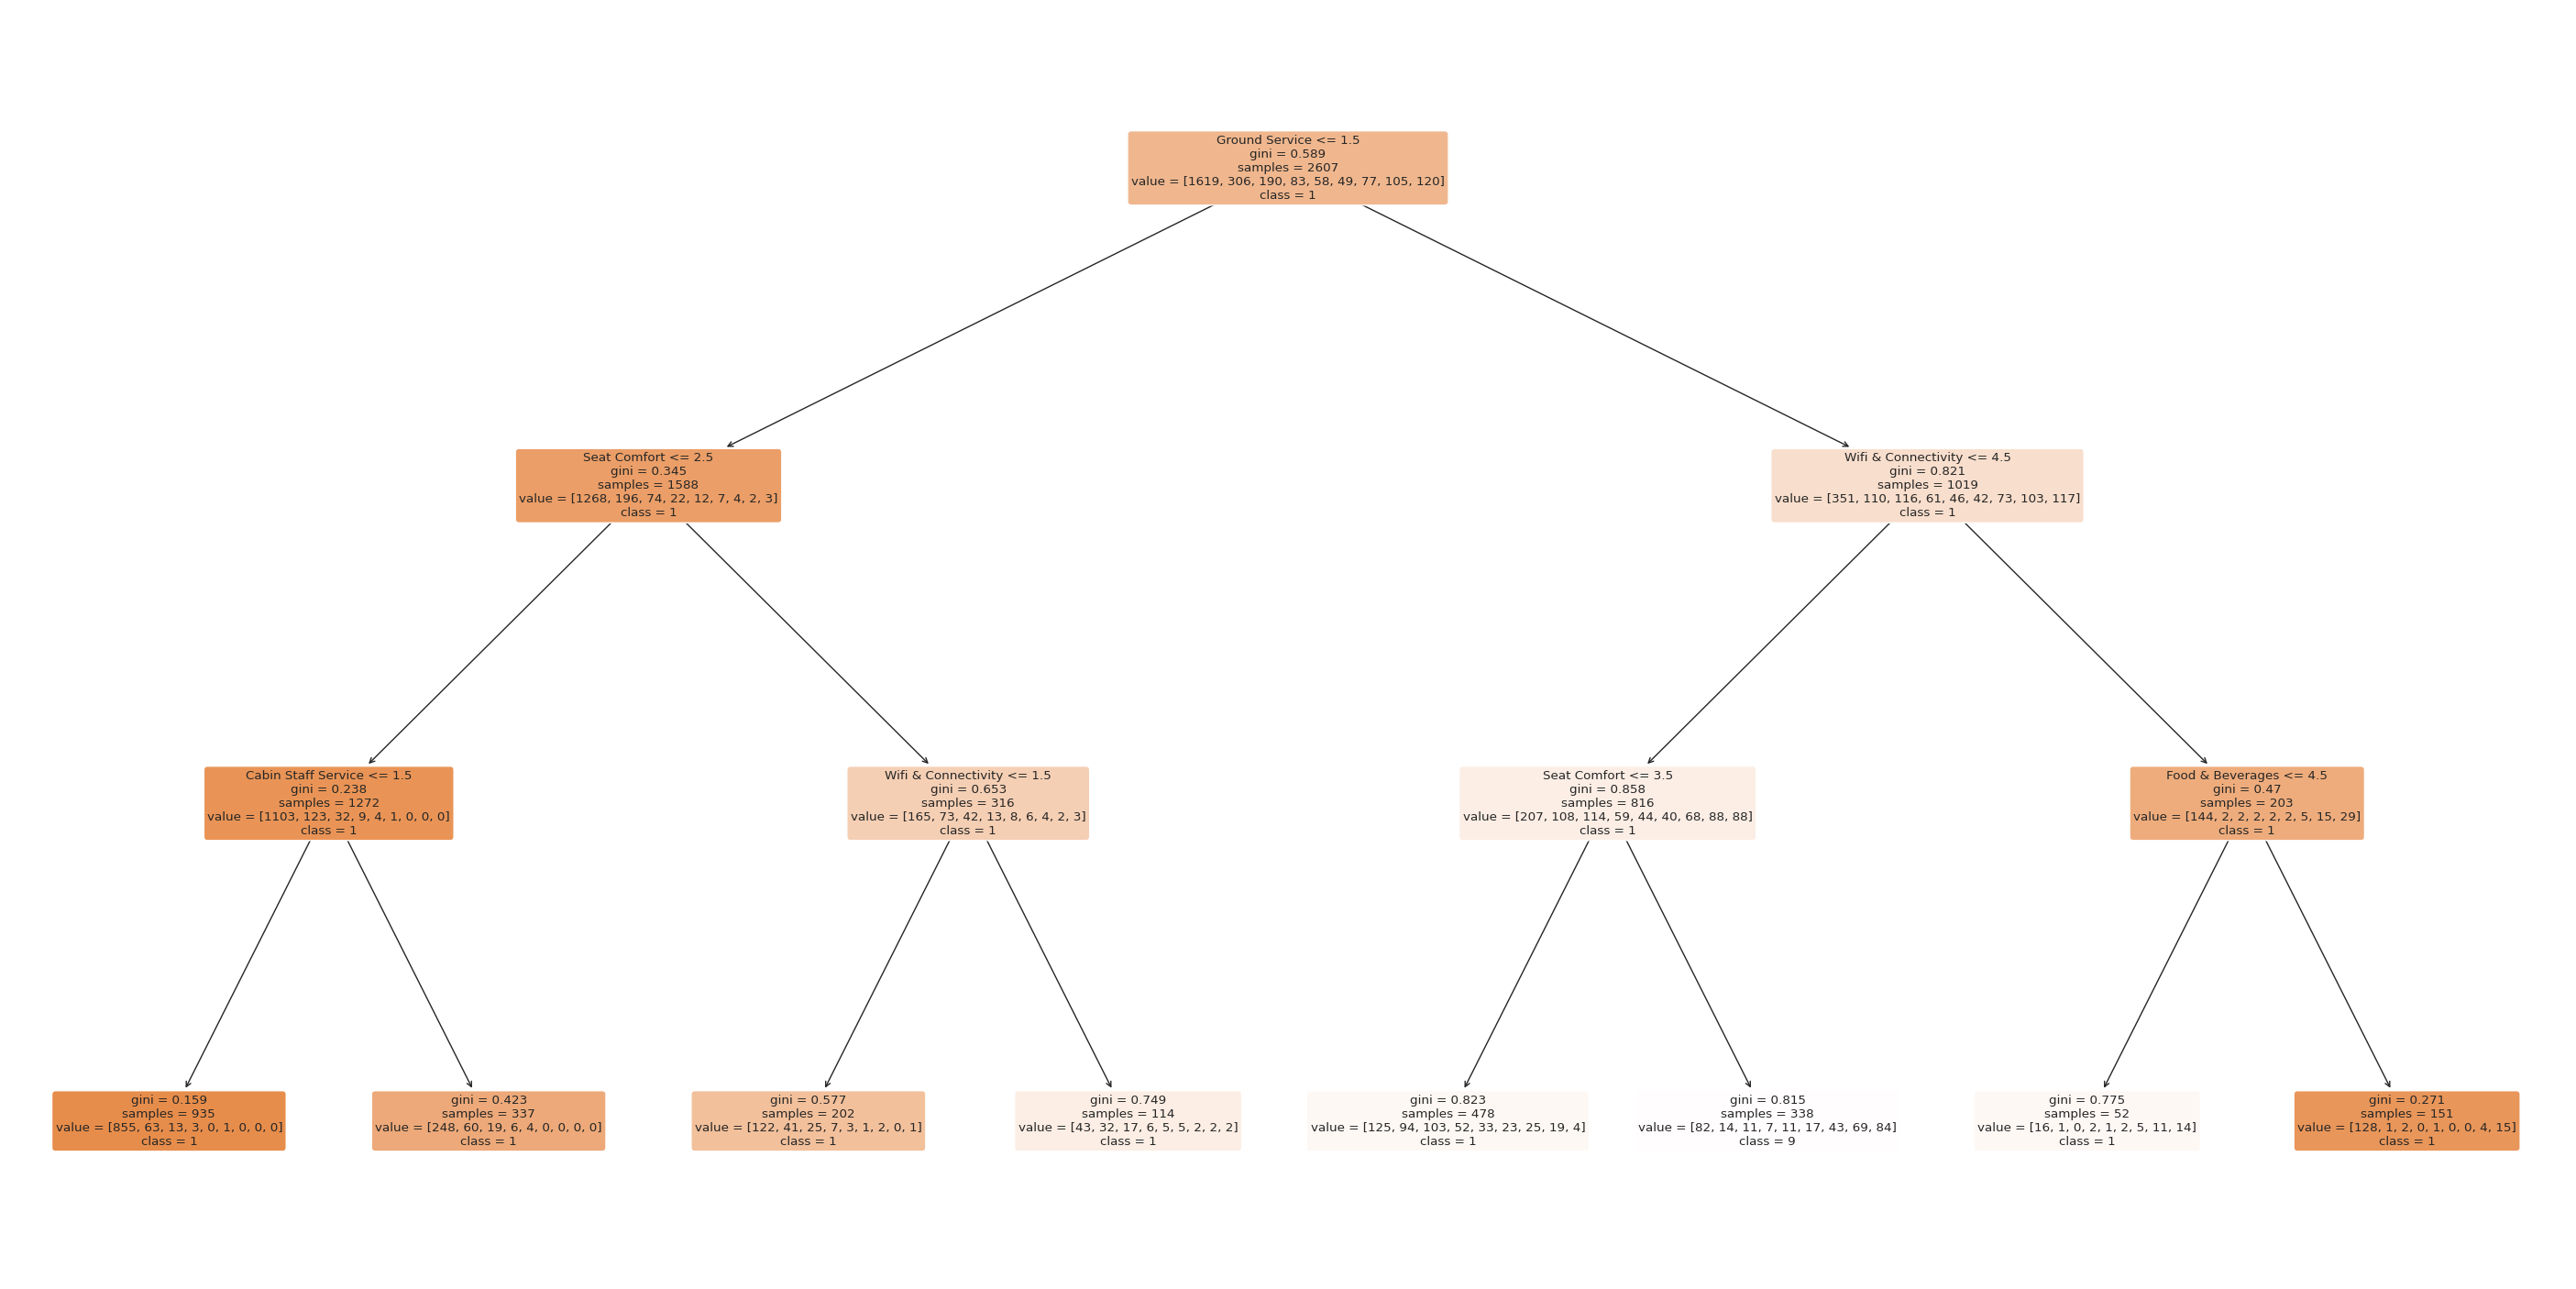

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Extract Response and Predictors
y = pd.DataFrame(verifiedairlineReview_dropped['Overall_Rating'])
X = pd.DataFrame(verifiedairlineReview_dropped[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)  # create the decision tree object with a specified depth
dectree.fit(X_train, y_train)                   # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(18, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in dectree.classes_])

plt.show()

In [39]:
feature_importances = dectree.feature_importances_
print(dict(zip(X_train.columns, feature_importances)))

{'Seat Comfort': 0.2378544559004816, 'Cabin Staff Service': 0.039316395186285734, 'Food & Beverages': 0.0487355238593829, 'Ground Service': 0.5178817922247565, 'Inflight Entertainment': 0.0, 'Wifi & Connectivity': 0.15621183282909323}


From this decision tree, we can see that ground service is the most important factor when giving a rating to an airline and that is followed by seat comfort while the rest have rather insignificant values

Now, let us use a decision tree and compare recommended against the other services full service airlines provide and try to determine the importance of those services to see if a passenger would recommend an airline.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9465680230168516

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9367816091954023



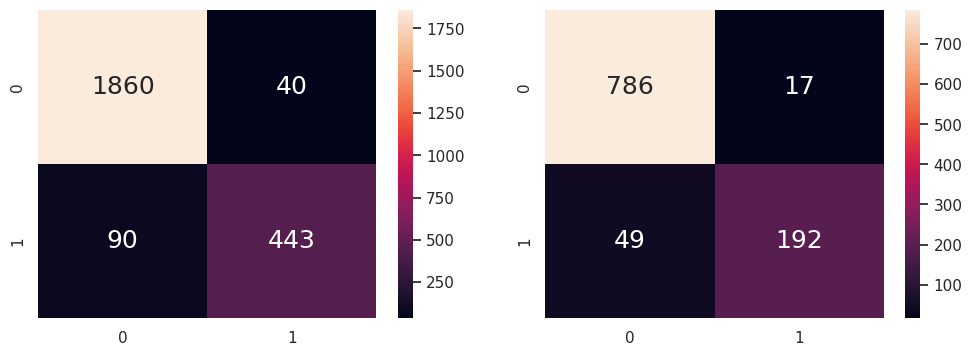

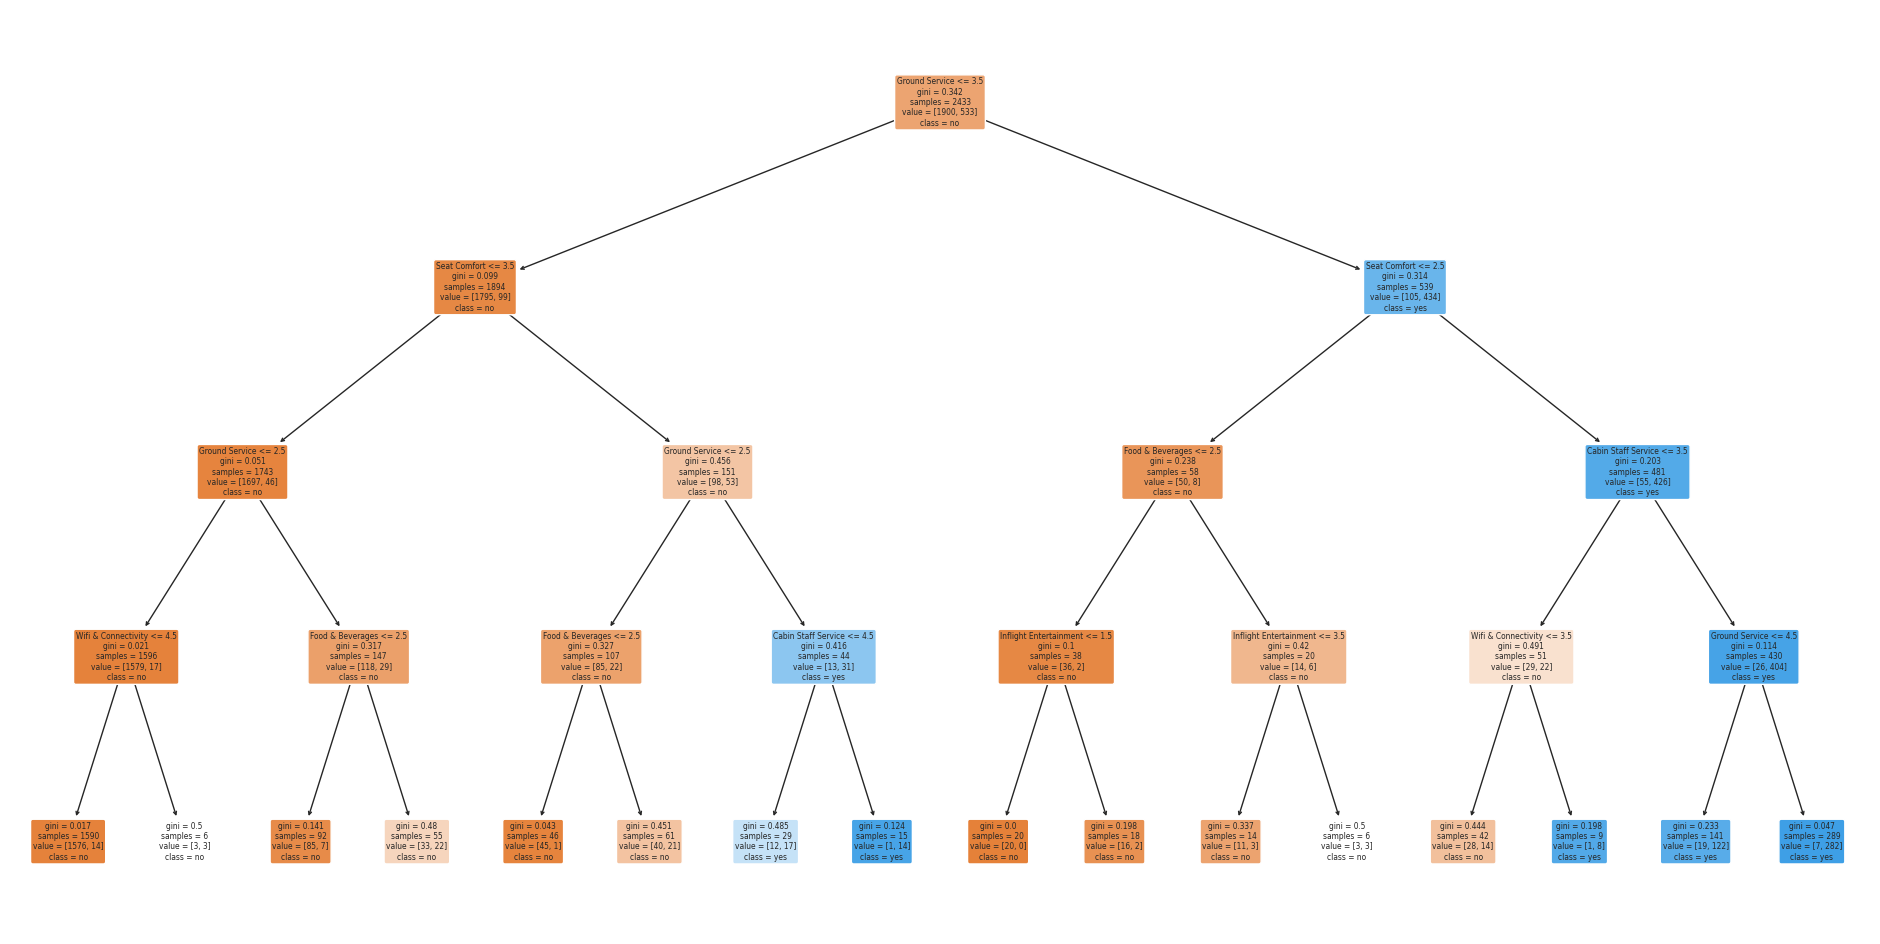

{'Seat Comfort': 0.13646521067168152, 'Cabin Staff Service': 0.04059715133050777, 'Food & Beverages': 0.022361931381605877, 'Ground Service': 0.7874564685666268, 'Inflight Entertainment': 0.0014398634094340208, 'Wifi & Connectivity': 0.011679374640144102}


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt


# Extract Response and Predictors
y = pd.DataFrame(verifiedairlineReview_dropped['Recommended'])
X = pd.DataFrame(verifiedairlineReview_dropped[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=4)  # create the decision tree object with a specified depth
dectree.fit(X_train, y_train)                   # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in dectree.classes_])

plt.show()

feature_importances = dectree.feature_importances_
print(dict(zip(X_train.columns, feature_importances)))


From this decision tree, we can still see the same trend applies if we change the target to recommended as well. Ground service is still the most important followed by seat comfort. 

### New Machine Learning Techniques (Random Forest)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
Train Data
Accuracy  :	 0.969173859432799

Confusion Matrix (Train Data):
 [[1869   31]
 [  44  489]]



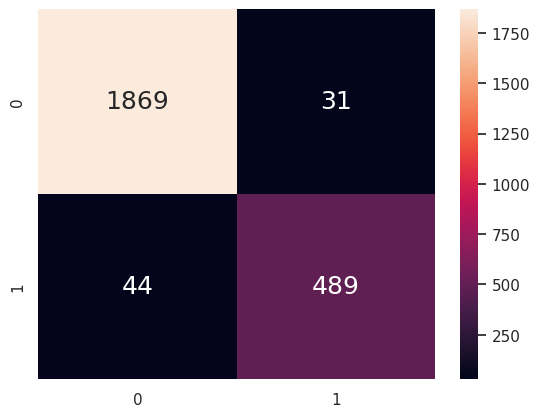

Test Data
Accuracy  :	 0.9741379310344828

Confusion Matrix (Test Data):
 [[797   6]
 [ 21 220]]



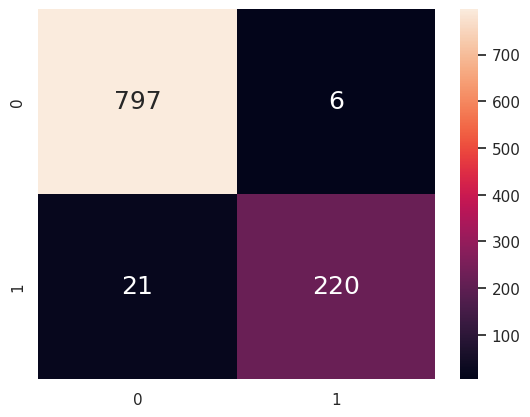

{'Seat Comfort': 0.2272399394731018, 'Cabin Staff Service': 0.14397210436345947, 'Food & Beverages': 0.19950807786950583, 'Ground Service': 0.3226123594537688, 'Inflight Entertainment': 0.06099058743756515, 'Wifi & Connectivity': 0.045676931402598875}


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


y = pd.DataFrame(verifiedairlineReview_dropped['Recommended'])
X = pd.DataFrame(verifiedairlineReview_dropped[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Create the Random Forest object with the best parameters
rforest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit Random Forest on the entire dataset
rforest.fit(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", cmTrain)
print()

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Test Data Metrics
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", cmTest)
print()

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

feature_importances = rforest.feature_importances_
features_and_importances = dict(zip(X_train.columns, feature_importances))
print(features_and_importances)


From the random forest analysis, we see a flatter spread of feature importances but the trend still stays the same but food and beverages and cabin staff service follow closely behind seat comfort. 

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
Train Data
Accuracy  :	 0.7986025482942869

Confusion Matrix (Train Data):
 [[1467    5    5    0    1    0    1    2   27]
 [ 177  101    5    0    1    1    2    2    2]
 [  81    7   84    0    0    0    1    3    2]
 [  30    4    6   31    0    1    1    2    1]
 [  14    2    4    0   29    1    2    2    1]
 [   4    0    1    0    1   34    2    0    3]
 [   7    1    2    0    1    2   47    4    9]
 [   8    0    1    0    0    0    4   65   20]
 [  16    0    0    0    1    0    1    6   85]]



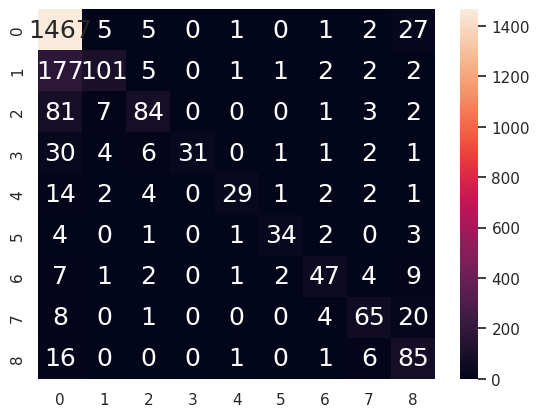

Test Data
Accuracy  :	 0.7863984674329502

Confusion Matrix (Test Data):
 [[623   3   8   0   1   0   1   1   8]
 [ 92  39   4   0   0   0   0   1   0]
 [ 24   4  31   0   0   0   1   0   1]
 [ 13   4   2  14   0   0   1   0   0]
 [  7   0   1   0  15   0   0   0   0]
 [  3   0   1   0   0  10   2   1   0]
 [  3   1   0   0   1   0  18   0   1]
 [  7   0   0   1   0   0   3  31   5]
 [ 13   0   0   0   0   0   0   4  40]]



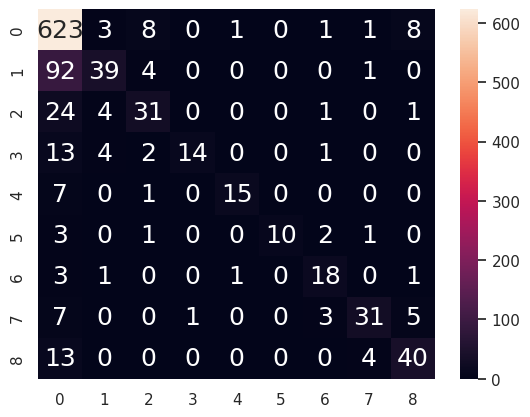

{'Seat Comfort': 0.1798651634078219, 'Cabin Staff Service': 0.17162931162617817, 'Food & Beverages': 0.161297409260949, 'Ground Service': 0.23170315072984077, 'Inflight Entertainment': 0.13184764440771266, 'Wifi & Connectivity': 0.12365732056749744}


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


y = pd.DataFrame(verifiedairlineReview_dropped['Overall_Rating'])
X = pd.DataFrame(verifiedairlineReview_dropped[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Create the Random Forest object with the best parameters
rforest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit Random Forest on the entire dataset
rforest.fit(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", cmTrain)
print()

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Test Data Metrics
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", cmTest)
print()

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

feature_importances = rforest.feature_importances_
features_and_importances = dict(zip(X_train.columns, feature_importances))
print(features_and_importances)

### New Machine Learning Techniques (XGBoost Regression & Classification)

Here we will be using XGBoost regression to develop a model to predict Overall Rating using the service aspect variables

XGBoost was chosen as an alternative to SKLearn as it can handle complex relationships better, has a higher predictive performance and more robust to outliers, it is also able to handle non-linear patterns better.

In [43]:
!sudo pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Train Mean Squared Error: 1.1353331823235342
Test Mean Squared Error: 3.4170394220668703


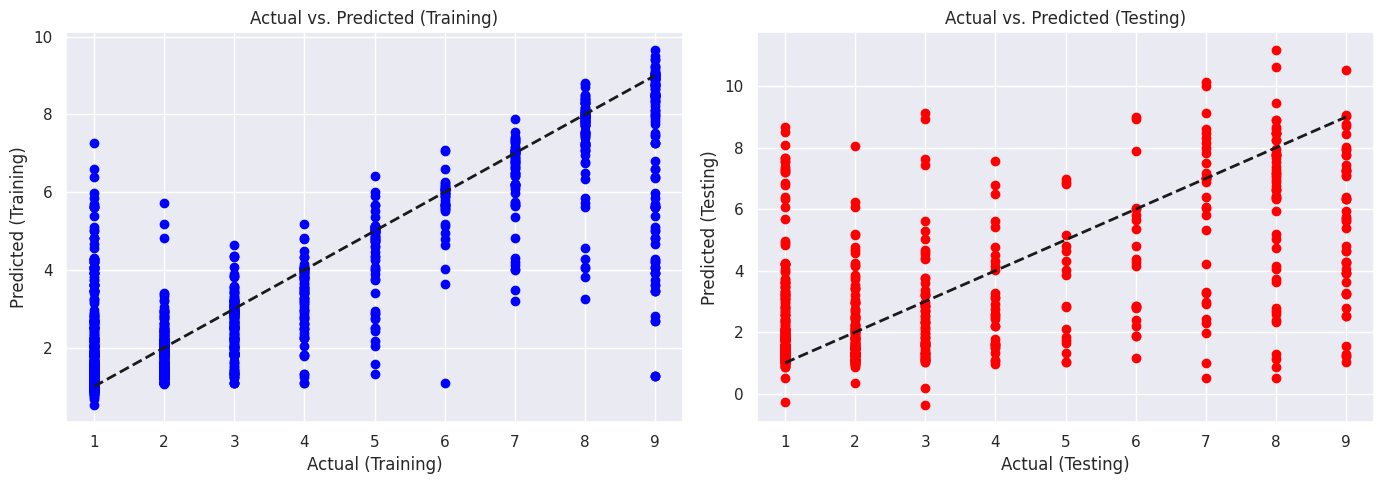

In [44]:
# Extract Response and Predictors
y = pd.DataFrame(verifiedairlineReview_dropped['Overall_Rating']) #Response
X = pd.DataFrame(verifiedairlineReview_dropped[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Instantiate an XGBoost regressor
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Train Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Plot actual vs. predicted values for training set
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual (Training)')
plt.ylabel('Predicted (Training)')
plt.title('Actual vs. Predicted (Training)')

# Plot actual vs. predicted values for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual (Testing)')
plt.ylabel('Predicted (Testing)')
plt.title('Actual vs. Predicted (Testing)')

plt.tight_layout()
plt.show()

In [45]:
# Function to input ratings within the range of 1 to 5
def input_rating(prompt):
    while True:
        try:
            rating = float(input(prompt))
            if 1 <= rating <= 5:
                return rating
            else:
                print("Rating must be between 1 and 5.")
        except ValueError:
            print("Please enter a valid number.")

# Input values for predictor variables
seat_comfort = input_rating("Enter Seat Comfort rating (1-5): ")
print("Entered Seat Comfort rating:", seat_comfort)

cabin_staff_service = input_rating("Enter Cabin Staff Service rating (1-5): ")
print("Entered Cabin Staff Service rating:", cabin_staff_service)

food_beverages = input_rating("Enter Food & Beverages rating (1-5): ")
print("Entered Food & Beverages rating:", food_beverages)

ground_service = input_rating("Enter Ground Service rating (1-5): ")
print("Entered Ground Service rating:", ground_service)

inflight_entertainment = input_rating("Enter Inflight Entertainment rating (1-5): ")
print("Entered Inflight Entertainment rating:", inflight_entertainment)

wifi_connectivity = input_rating("Enter Wifi & Connectivity rating (1-5): ")
print("Entered Wifi & Connectivity rating:", wifi_connectivity)

# Use the trained model to make predictions on the input values
predicted_rating = model.predict([[seat_comfort, cabin_staff_service, food_beverages, ground_service, inflight_entertainment, wifi_connectivity]])

# Print the predicted rating
print("Predicted Overall Rating:", predicted_rating[0])

Entered Seat Comfort rating: 5.0
Entered Cabin Staff Service rating: 3.0
Entered Food & Beverages rating: 3.0
Entered Ground Service rating: 5.0
Entered Inflight Entertainment rating: 1.0
Entered Wifi & Connectivity rating: 1.0
Predicted Overall Rating: 7.9146285


From the model, it can be seen that a high rating for "Ground Service" and "Seat Comfort" followed by "Cabin Staff Service" and "Food & Beverage" results in a high Overall_Rating which aligns with the findings from the previous ML techniques used.

"Inflight Entertainment" and "Wifi & Connectivity" seem to be irrelevant when it comes to Overall_Rating as even with the lowest possible rating for these two, the Overall Rating is still relatively high

Next, we will use XGBoost Classification to develop a model to predict if a set of ratings would give a Yes or No Recommendation.

Train Accuracy: 0.9843814221126181
Test Accuracy: 0.9406130268199234


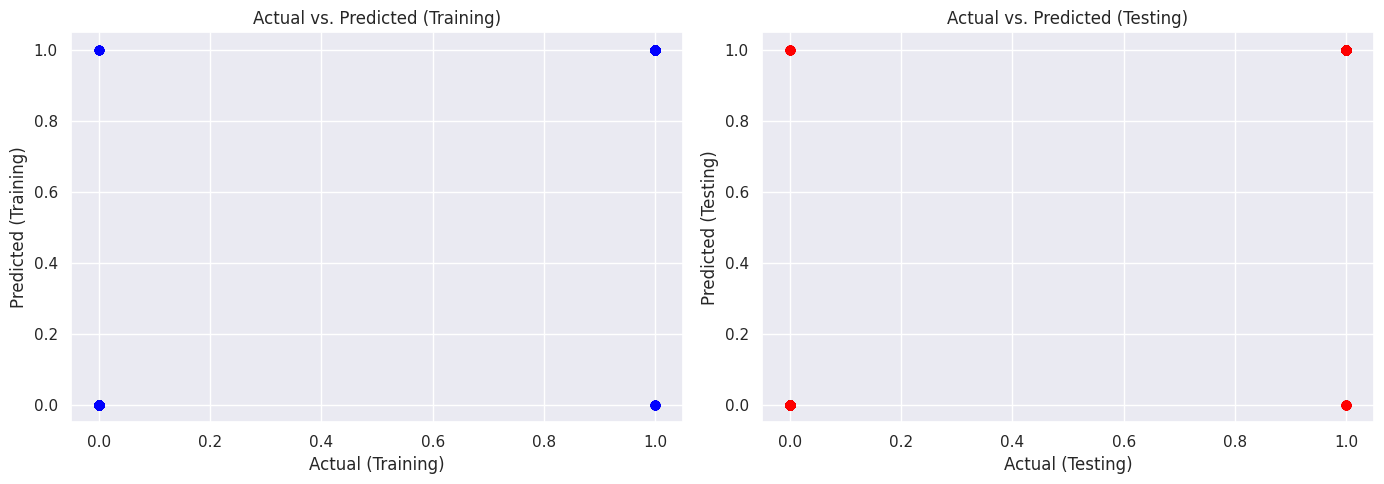

In [46]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Extract Response and Predictors
y = verifiedairlineReview_dropped['Recommended']  # Response
X = verifiedairlineReview_dropped[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]

# Encode target classes into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Instantiate an XGBoost classifier
modelClassifier = xgb.XGBClassifier()

# Train the model
modelClassifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = modelClassifier.predict(X_train)

# Make predictions on the test set
y_test_pred = modelClassifier.predict(X_test)

# Evaluate the model using accuracy score for training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Plot actual vs. predicted values for training set
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Actual (Training)')
plt.ylabel('Predicted (Training)')
plt.title('Actual vs. Predicted (Training)')

# Plot actual vs. predicted values for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red')
plt.xlabel('Actual (Testing)')
plt.ylabel('Predicted (Testing)')
plt.title('Actual vs. Predicted (Testing)')

plt.tight_layout()
plt.show()


We attempted to use a similar scatterplot graph as before, seen in XGBoost regression, however, the visualization does not provide much information.

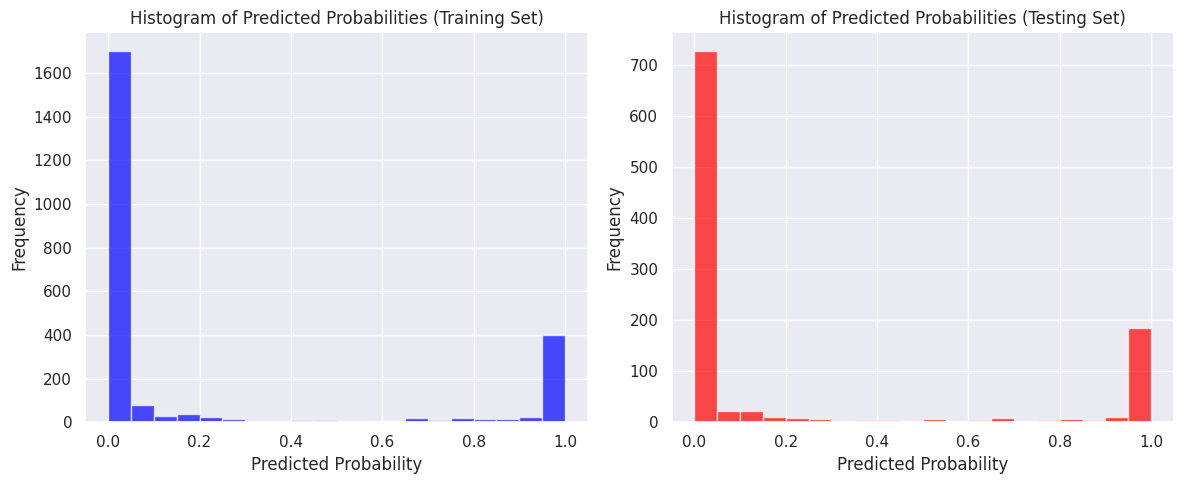

In [47]:
# Predict probabilities for training and testing sets
y_train_probs = modelClassifier.predict_proba(X_train)[:, 1]
y_test_probs = modelClassifier.predict_proba(X_test)[:, 1]

# Plot histograms of predicted probabilities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_train_probs, bins=20, color='blue', alpha=0.7, label='Training Set')
plt.title('Histogram of Predicted Probabilities (Training Set)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test_probs, bins=20, color='red', alpha=0.7, label='Testing Set')
plt.title('Histogram of Predicted Probabilities (Testing Set)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Instead we used a histogram of predicted posibilities, compared to the previous graph, here we can visualize the distribution of Recommendation, the values are not evenly distributed, however this can be explained previously as seen in EDA, the split of Yes and No Recommendation is 22.3& and 77.7%. Thus, explaining the uneven distribution of Yes and No Recommendation in the classification model.

In [48]:
# Function to input ratings within the range of 1 to 5
def input_rating(prompt):
    while True:
        try:
            rating = float(input(prompt))
            if 1 <= rating <= 5:
                return rating
            else:
                print("Rating must be between 1 and 5.")
        except ValueError:
            print("Please enter a valid number.")

# Input values for predictor variables
seat_comfort = input_rating("Enter Seat Comfort rating (1-5): ")
print("Entered Seat Comfort rating:", seat_comfort)

cabin_staff_service = input_rating("Enter Cabin Staff Service rating (1-5): ")
print("Entered Cabin Staff Service rating:", cabin_staff_service)

food_beverages = input_rating("Enter Food & Beverages rating (1-5): ")
print("Entered Food & Beverages rating:", food_beverages)

ground_service = input_rating("Enter Ground Service rating (1-5): ")
print("Entered Ground Service rating:", ground_service)

inflight_entertainment = input_rating("Enter Inflight Entertainment rating (1-5): ")
print("Entered Inflight Entertainment rating:", inflight_entertainment)

wifi_connectivity = input_rating("Enter Wifi & Connectivity rating (1-5): ")
print("Entered Wifi & Connectivity rating:", wifi_connectivity)

# Use the trained model to make predictions on the input values
predicted_rating = modelClassifier.predict([[seat_comfort, cabin_staff_service, food_beverages, ground_service, inflight_entertainment, wifi_connectivity]])

# Dictionary mapping encoded labels to their corresponding values
label_mapping = {1: 'Yes', 0: 'No'}

# Decode the predicted rating using the label mapping
predicted_rating_label = label_mapping[predicted_rating[0]]

# Print the predicted rating
print("Predicted Recommendation:", predicted_rating_label)


Entered Seat Comfort rating: 5.0
Entered Cabin Staff Service rating: 3.0
Entered Food & Beverages rating: 3.0
Entered Ground Service rating: 5.0
Entered Inflight Entertainment rating: 1.0
Entered Wifi & Connectivity rating: 1.0
Predicted Recommendation: Yes


Similar to the XGBoost regression model, we used the same set of ratings and got 'Yes' for our predicted recommendation.

Together with the XGBoost Regression model, airlines are able to use both these models to predict their Overall Rating and if they would get Recommended. These models allow them to play around with different ratings so that they can find which variable they should focus on and prioritize to get the best Overall Rating and Recommendation.


### Pre / Post Covid EDA

Up till now, we looked at the reviews as a whole but we know for a fact that COVID-19 had a great impact on the airline industry nearly bringing air traffic to a halt globally. Such a event definitely had a lasting impact on the airlines as aircrafts were grounded but as travel picks up, we want to analyse the differences in consumer preferences and if COVID-19 has caused any changes in the factors that passenger consider when giving an airline a good rating or a recommendation.

In [49]:
#Pre-Covid and Post Covid 
Pre_Covid_filled_Review = verifiedairlineReview_filled[verifiedairlineReview_filled['Date Flown']<'2020-01-01']
Post_Covid_filled_Review = verifiedairlineReview_filled[verifiedairlineReview_filled['Date Flown']>='2020-01-01']

Pre_Covid_dropped_Review = verifiedairlineReview_dropped[verifiedairlineReview_dropped['Date Flown']<'2020-01-01']
Post_Covid_dropped_Review = verifiedairlineReview_dropped[verifiedairlineReview_dropped['Date Flown']>='2020-01-01']

In [50]:
Pre_Covid_dropped_Review.groupby("Airline Name").agg({"Recommended": "count"}).sort_values("Recommended", ascending=False)

Recommended
Airline Name                       
Jet Airways                      41
WOW air                          34
Kuwait Airways                   32
China Eastern Airlines           25
El Al Israel Airlines            25
...                             ...
Aircalin                          1
Sunwing Airlines                  1
Central Mountain Air              1
GoAir                             1
flyadeal                          1

[179 rows x 1 columns]

In [51]:
Post_Covid_dropped_Review.groupby("Airline Name").agg({"Recommended": "count"}).sort_values("Recommended", ascending=False)

Recommended
Airline Name                   
Qatar Airways                51
Emirates                     42
Etihad Airways               39
Finnair                      39
Singapore Airlines           39
...                         ...
Israir Airlines               1
Iraqi Airways                 1
Alitalia                      1
Iran Air                      1
Red Wings Airlines            1

[224 rows x 1 columns]

This highlights a potential limitation in our analysis. Some of the world's best airlines like Qatar Airways and Singapore Airlines today only have passenger reviews post COVID and not pre COVID in this dataset. This may cause the mean ratings to be more favourable post COVID

In [52]:
# Aggregate to get the total number of reviews and the average rating per airline
pre_covid_dropped_summary = Pre_Covid_dropped_Review.groupby('Airline Name').agg(
    Total_Reviews=('Airline Name', 'size'),
    Average_Rating=('Overall_Rating', 'mean')
).sort_values(by='Total_Reviews', ascending=False)

# Display the result
print(pre_covid_dropped_summary)

                        Total_Reviews  Average_Rating
Airline Name                                         
Jet Airways                        41        1.951220
WOW air                            34        2.029412
Kuwait Airways                     32        2.593750
China Eastern Airlines             25        3.360000
El Al Israel Airlines              25        3.200000
...                               ...             ...
Aircalin                            1        8.000000
Sunwing Airlines                    1        1.000000
Central Mountain Air                1        1.000000
GoAir                               1        1.000000
flyadeal                            1        1.000000

[179 rows x 2 columns]


In [53]:
# Aggregate to get the total number of reviews and the average rating per airline
post_covid_dropped_summary = Post_Covid_dropped_Review.groupby('Airline Name').agg(
    Total_Reviews=('Airline Name', 'size'),
    Average_Rating=('Overall_Rating', 'mean')
).sort_values(by='Total_Reviews', ascending=False)

# Display the result
print(post_covid_dropped_summary)

                    Total_Reviews  Average_Rating
Airline Name                                     
Qatar Airways                  51        4.039216
Emirates                       42        2.833333
Etihad Airways                 39        1.974359
Finnair                        39        2.307692
Singapore Airlines             39        4.000000
...                           ...             ...
Israir Airlines                 1        1.000000
Iraqi Airways                   1        1.000000
Alitalia                        1        1.000000
Iran Air                        1        1.000000
Red Wings Airlines              1        1.000000

[224 rows x 2 columns]


The data shows an increase in number of reviews and average rating for airlines. While COVID 19 did bring a drop in travel, it does seem that more reviews in this dataset have been collected after 2020 leading to more reviews post COVID. Moreover, the average rating for the most reviewed airlines has gone up due to factors explained above.

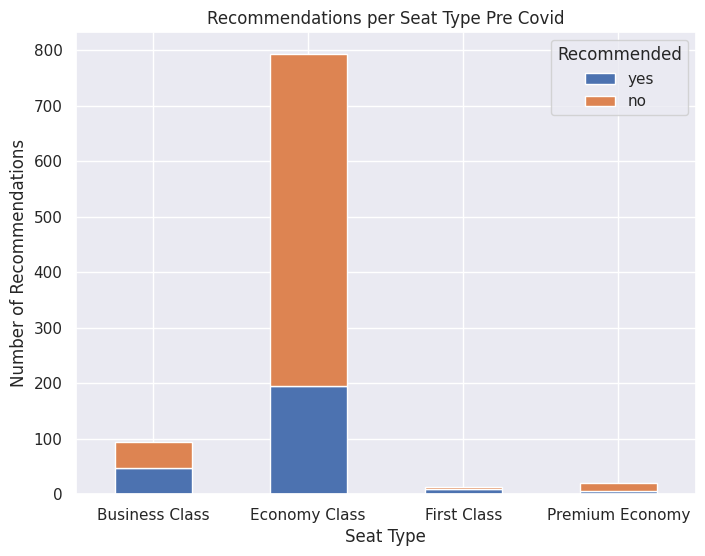

Recommendations Count for Each Seat Type Pre Covid:
Recommended       no  yes  Total  % Yes of Total
Seat Type                                       
Business Class    47   48     95       50.526316
Economy Class    598  195    793       24.590164
First Class        4    9     13       69.230769
Premium Economy   14    6     20       30.000000


In [54]:
grouped_data = Pre_Covid_dropped_Review.groupby(['Seat Type', 'Recommended']).size().unstack(fill_value=0)

# Adding total recommendations per seat type
grouped_data['Total'] = grouped_data.sum(axis=1)

# Adding percentage of 'Yes' recommendations
grouped_data['% Yes of Total'] = (grouped_data['yes'] / grouped_data['Total']) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
grouped_data[['yes', 'no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Recommendations per Seat Type Pre Covid')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Number of Recommendations')
plt.xticks(rotation=0)
plt.legend(title='Recommended')
plt.show()

# Printing the updated DataFrame with total and percentage of 'Yes'
print("Recommendations Count for Each Seat Type Pre Covid:")
print(grouped_data[['no', 'yes', 'Total', '% Yes of Total']])


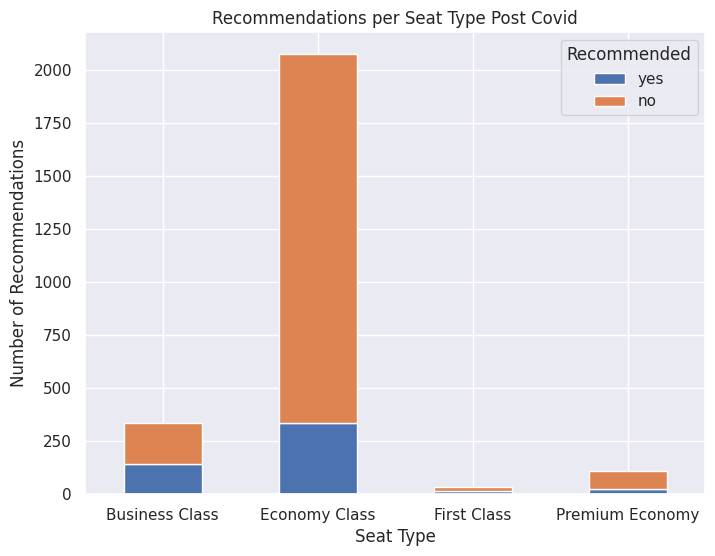

Recommendations Count for Each Seat Type Post Covid:
Recommended        no  yes  Total  % Yes of Total
Seat Type                                        
Business Class    196  141    337       41.839763
Economy Class    1741  335   2076       16.136802
First Class        18   15     33       45.454545
Premium Economy    85   25    110       22.727273


In [55]:
grouped_data = Post_Covid_dropped_Review.groupby(['Seat Type', 'Recommended']).size().unstack(fill_value=0)

# Adding total recommendations per seat type
grouped_data['Total'] = grouped_data.sum(axis=1)

# Adding percentage of 'Yes' recommendations
grouped_data['% Yes of Total'] = (grouped_data['yes'] / grouped_data['Total']) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
grouped_data[['yes', 'no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Recommendations per Seat Type Post Covid')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Number of Recommendations')
plt.xticks(rotation=0)
plt.legend(title='Recommended')
plt.show()

# Printing the updated DataFrame with total and percentage of 'Yes'
print("Recommendations Count for Each Seat Type Post Covid:")
print(grouped_data[['no', 'yes', 'Total', '% Yes of Total']])


Passengers who recommended an airline declined after COVID irrespective of their seat type. However, the premium cabins saw the greatest reduction in recommendation percentage wise which could be alluded to the fact that customer service was minimised which is quite an important factor for premium travellers. This coupled with the restrictions may see passengers unsatisfied with their experience post COVID compared to pre COVID. 

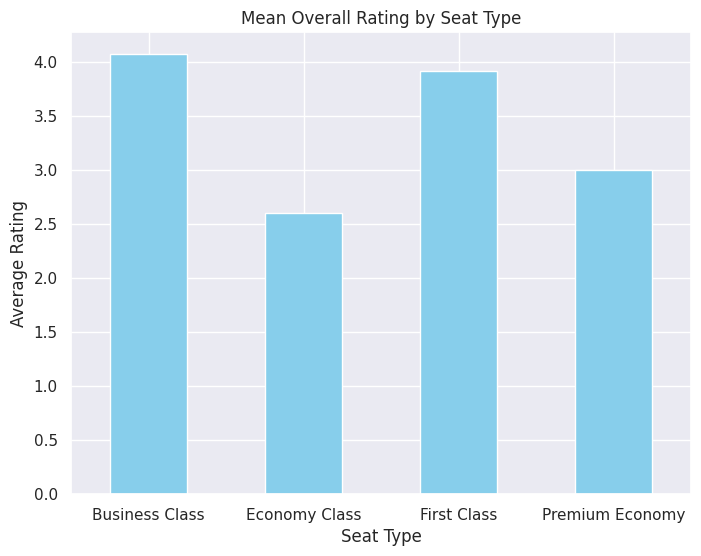

Mean Overall Ratings for Each Seat Type Pre Covid:
Seat Type
Business Class     4.073684
Economy Class      2.606557
First Class        3.923077
Premium Economy    3.000000
Name: Overall_Rating, dtype: float64


In [56]:
# Group by 'Seat Type' and calculate mean of 'Overall Rating'
rating_data = Pre_Covid_dropped_Review.groupby('Seat Type')['Overall_Rating'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
rating_data.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Mean Overall Rating by Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# Printing the mean overall ratings for each seat type
print("Mean Overall Ratings for Each Seat Type Pre Covid:")
print(rating_data)

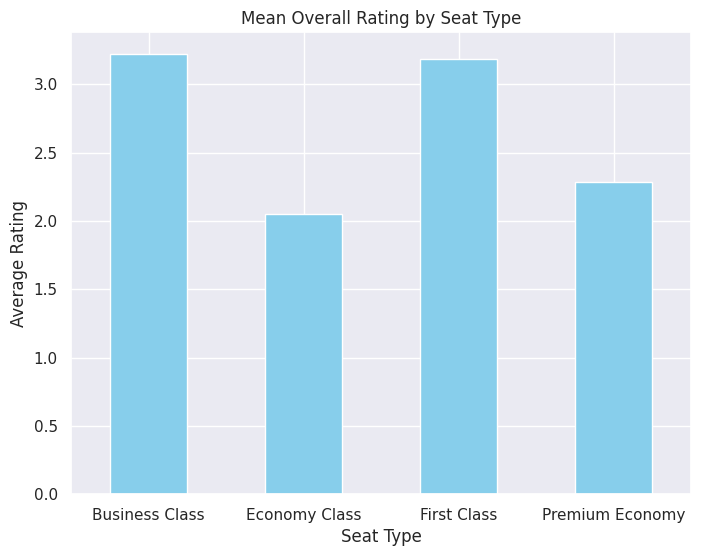

Mean Overall Ratings for Each Seat Type Post Covid:
Seat Type
Business Class     3.219585
Economy Class      2.048651
First Class        3.181818
Premium Economy    2.281818
Name: Overall_Rating, dtype: float64


In [57]:
# Group by 'Seat Type' and calculate mean of 'Overall Rating'
rating_data = Post_Covid_dropped_Review.groupby('Seat Type')['Overall_Rating'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
rating_data.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Mean Overall Rating by Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# Printing the mean overall ratings for each seat type
print("Mean Overall Ratings for Each Seat Type Post Covid:")
print(rating_data)

The same trend continues in the mean overall rating where the mean rating has dropped across all 4 cabins post COVID.

### Pre / Post Covid Machine Learning Analysis

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
Train Data
Accuracy  :	 0.968944099378882

Confusion Matrix (Train Data):
 [[456  10]
 [ 10 168]]



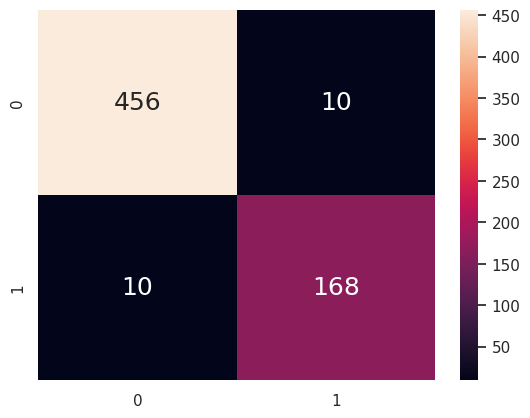

Test Data
Accuracy  :	 0.9566787003610109

Confusion Matrix (Test Data):
 [[194   3]
 [  9  71]]



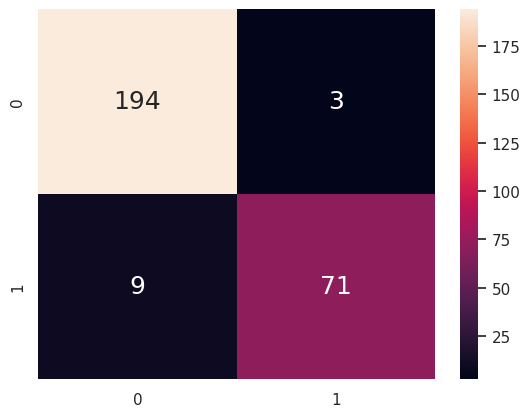

{'Seat Comfort': 0.2672225575957124, 'Cabin Staff Service': 0.1573075849169123, 'Food & Beverages': 0.16662926605375536, 'Ground Service': 0.2960811010826655, 'Inflight Entertainment': 0.07670616580476286, 'Wifi & Connectivity': 0.03605332454619153}


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


y = pd.DataFrame(Pre_Covid_dropped_Review['Recommended'])
X = pd.DataFrame(Pre_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Create the Random Forest object with the best parameters
rforest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit Random Forest on the entire dataset
rforest.fit(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", cmTrain)
print()

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Test Data Metrics
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", cmTest)
print()

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

feature_importances = rforest.feature_importances_
features_and_importances = dict(zip(X_train.columns, feature_importances))
print(features_and_importances)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
Train Data
Accuracy  :	 0.980435997764114

Confusion Matrix (Train Data):
 [[1401   10]
 [  25  353]]



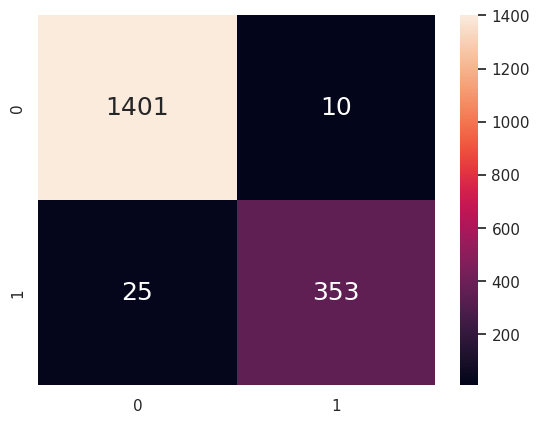

Test Data
Accuracy  :	 0.9661016949152542

Confusion Matrix (Test Data):
 [[619  10]
 [ 16 122]]



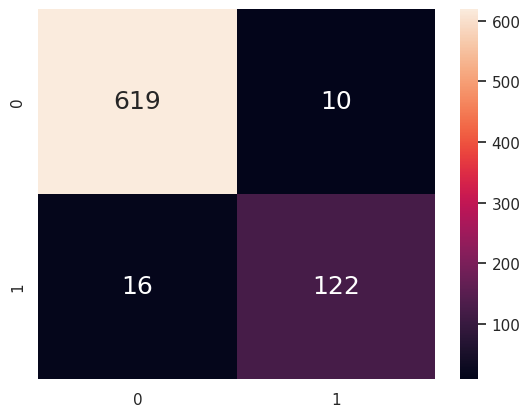

{'Seat Comfort': 0.21172222822511438, 'Cabin Staff Service': 0.17977086304138978, 'Food & Beverages': 0.17492311398474103, 'Ground Service': 0.32073398121963587, 'Inflight Entertainment': 0.06342896759018733, 'Wifi & Connectivity': 0.04942084593893172}


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


y = pd.DataFrame(Post_Covid_dropped_Review['Recommended'])
X = pd.DataFrame(Post_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Create the Random Forest object with the best parameters
rforest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit Random Forest on the entire dataset
rforest.fit(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", cmTrain)
print()

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Test Data Metrics
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", cmTest)
print()

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

feature_importances = rforest.feature_importances_
features_and_importances = dict(zip(X_train.columns, feature_importances))
print(features_and_importances)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
Train Data
Accuracy  :	 0.84472049689441

Confusion Matrix (Train Data):
 [[363   4   3   1   0   0   0   0   3]
 [ 30  40   1   0   0   0   2   0   0]
 [  9   0  27   1   0   0   1   0   0]
 [  6   2   2  15   0   0   1   1   0]
 [  3   0   0   1   7   0   1   0   0]
 [  0   0   1   0   0   7   3   0   0]
 [  1   0   0   0   0   0  27   0   2]
 [  3   0   1   0   0   0   3  19   5]
 [  7   0   0   0   0   0   1   1  39]]



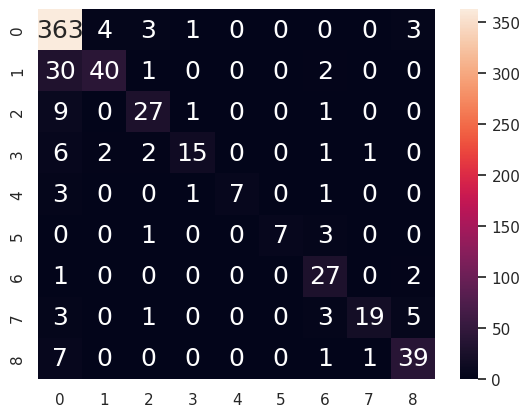

Test Data
Accuracy  :	 0.8231046931407943

Confusion Matrix (Test Data):
 [[136   1   0   0   0   0   0   1   2]
 [ 18  20   1   0   0   0   0   1   1]
 [  4   1  14   0   0   0   0   0   0]
 [  2   0   2  11   0   0   0   0   0]
 [  3   0   0   1   1   0   0   1   0]
 [  0   0   1   0   0   5   0   0   0]
 [  1   0   0   0   0   0  15   1   0]
 [  1   0   0   0   0   0   1   9   3]
 [  1   0   0   0   0   0   0   1  17]]



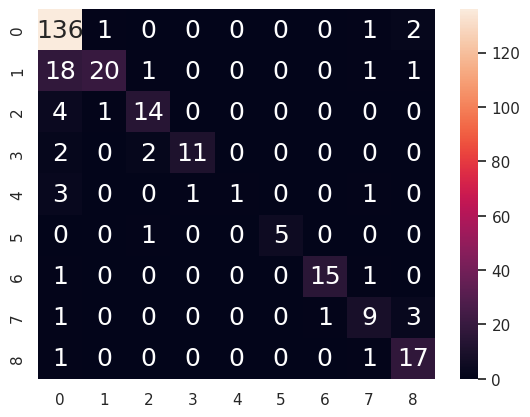

{'Seat Comfort': 0.17715805604522084, 'Cabin Staff Service': 0.17129234325194567, 'Food & Beverages': 0.15910118668290016, 'Ground Service': 0.2359519701109754, 'Inflight Entertainment': 0.1482219211892606, 'Wifi & Connectivity': 0.10827452271969738}


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


y = pd.DataFrame(Pre_Covid_dropped_Review['Overall_Rating'])
X = pd.DataFrame(Pre_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Create the Random Forest object with the best parameters
rforest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit Random Forest on the entire dataset
rforest.fit(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", cmTrain)
print()

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Test Data Metrics
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", cmTest)
print()

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

feature_importances = rforest.feature_importances_
features_and_importances = dict(zip(X_train.columns, feature_importances))
print(features_and_importances)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
Train Data
Accuracy  :	 0.8110676355505869

Confusion Matrix (Train Data):
 [[1121    3    2    0    0    0    0    2   12]
 [ 135   70    4    0    1    0    1    1    0]
 [  67    5   55    1    0    0    0    1    2]
 [  19    2    2   19    0    0    1    0    0]
 [  14    3    1    0   27    0    0    1    0]
 [   4    0    1    0    1   26    1    1    2]
 [   3    1    1    0    2    0   28    2    2]
 [   6    0    0    0    0    0    1   52    9]
 [  16    0    0    0    0    0    0    5   53]]



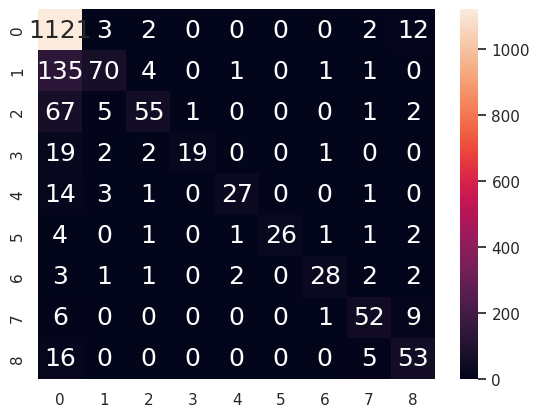

Test Data
Accuracy  :	 0.8148631029986962

Confusion Matrix (Test Data):
 [[488   2   2   0   0   0   0   0   7]
 [ 58  39   2   0   0   0   0   1   1]
 [ 19   3  28   0   0   0   0   0   1]
 [  7   4   0  12   0   1   0   0   1]
 [  4   1   1   0   8   0   0   0   0]
 [  2   0   0   0   0   5   0   1   1]
 [  0   1   0   0   0   0   7   2   1]
 [  7   0   0   0   0   0   0  22   3]
 [  7   0   0   0   0   0   0   2  16]]



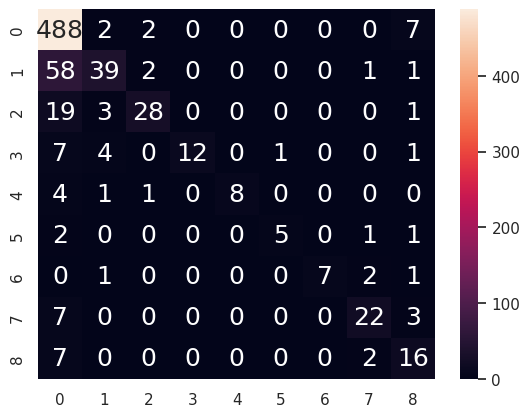

{'Seat Comfort': 0.18096595094200918, 'Cabin Staff Service': 0.17251564676641484, 'Food & Beverages': 0.17038005547888724, 'Ground Service': 0.21523825608272082, 'Inflight Entertainment': 0.13483123559194696, 'Wifi & Connectivity': 0.12606885513802096}


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


y = pd.DataFrame(Post_Covid_dropped_Review['Overall_Rating'])
X = pd.DataFrame(Post_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Create the Random Forest object with the best parameters
rforest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit Random Forest on the entire dataset
rforest.fit(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", cmTrain)
print()

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Test Data Metrics
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", cmTest)
print()

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.show()

feature_importances = rforest.feature_importances_
features_and_importances = dict(zip(X_train.columns, feature_importances))
print(features_and_importances)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9449275362318841

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9047619047619048



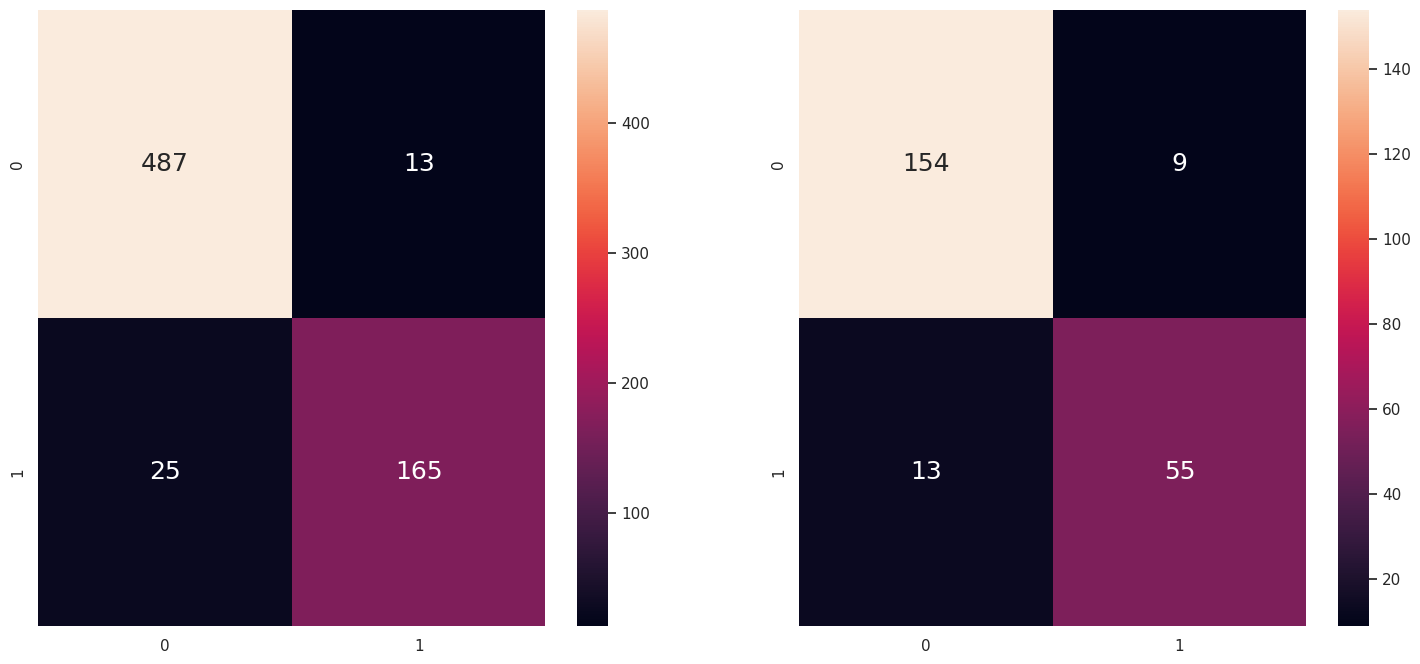

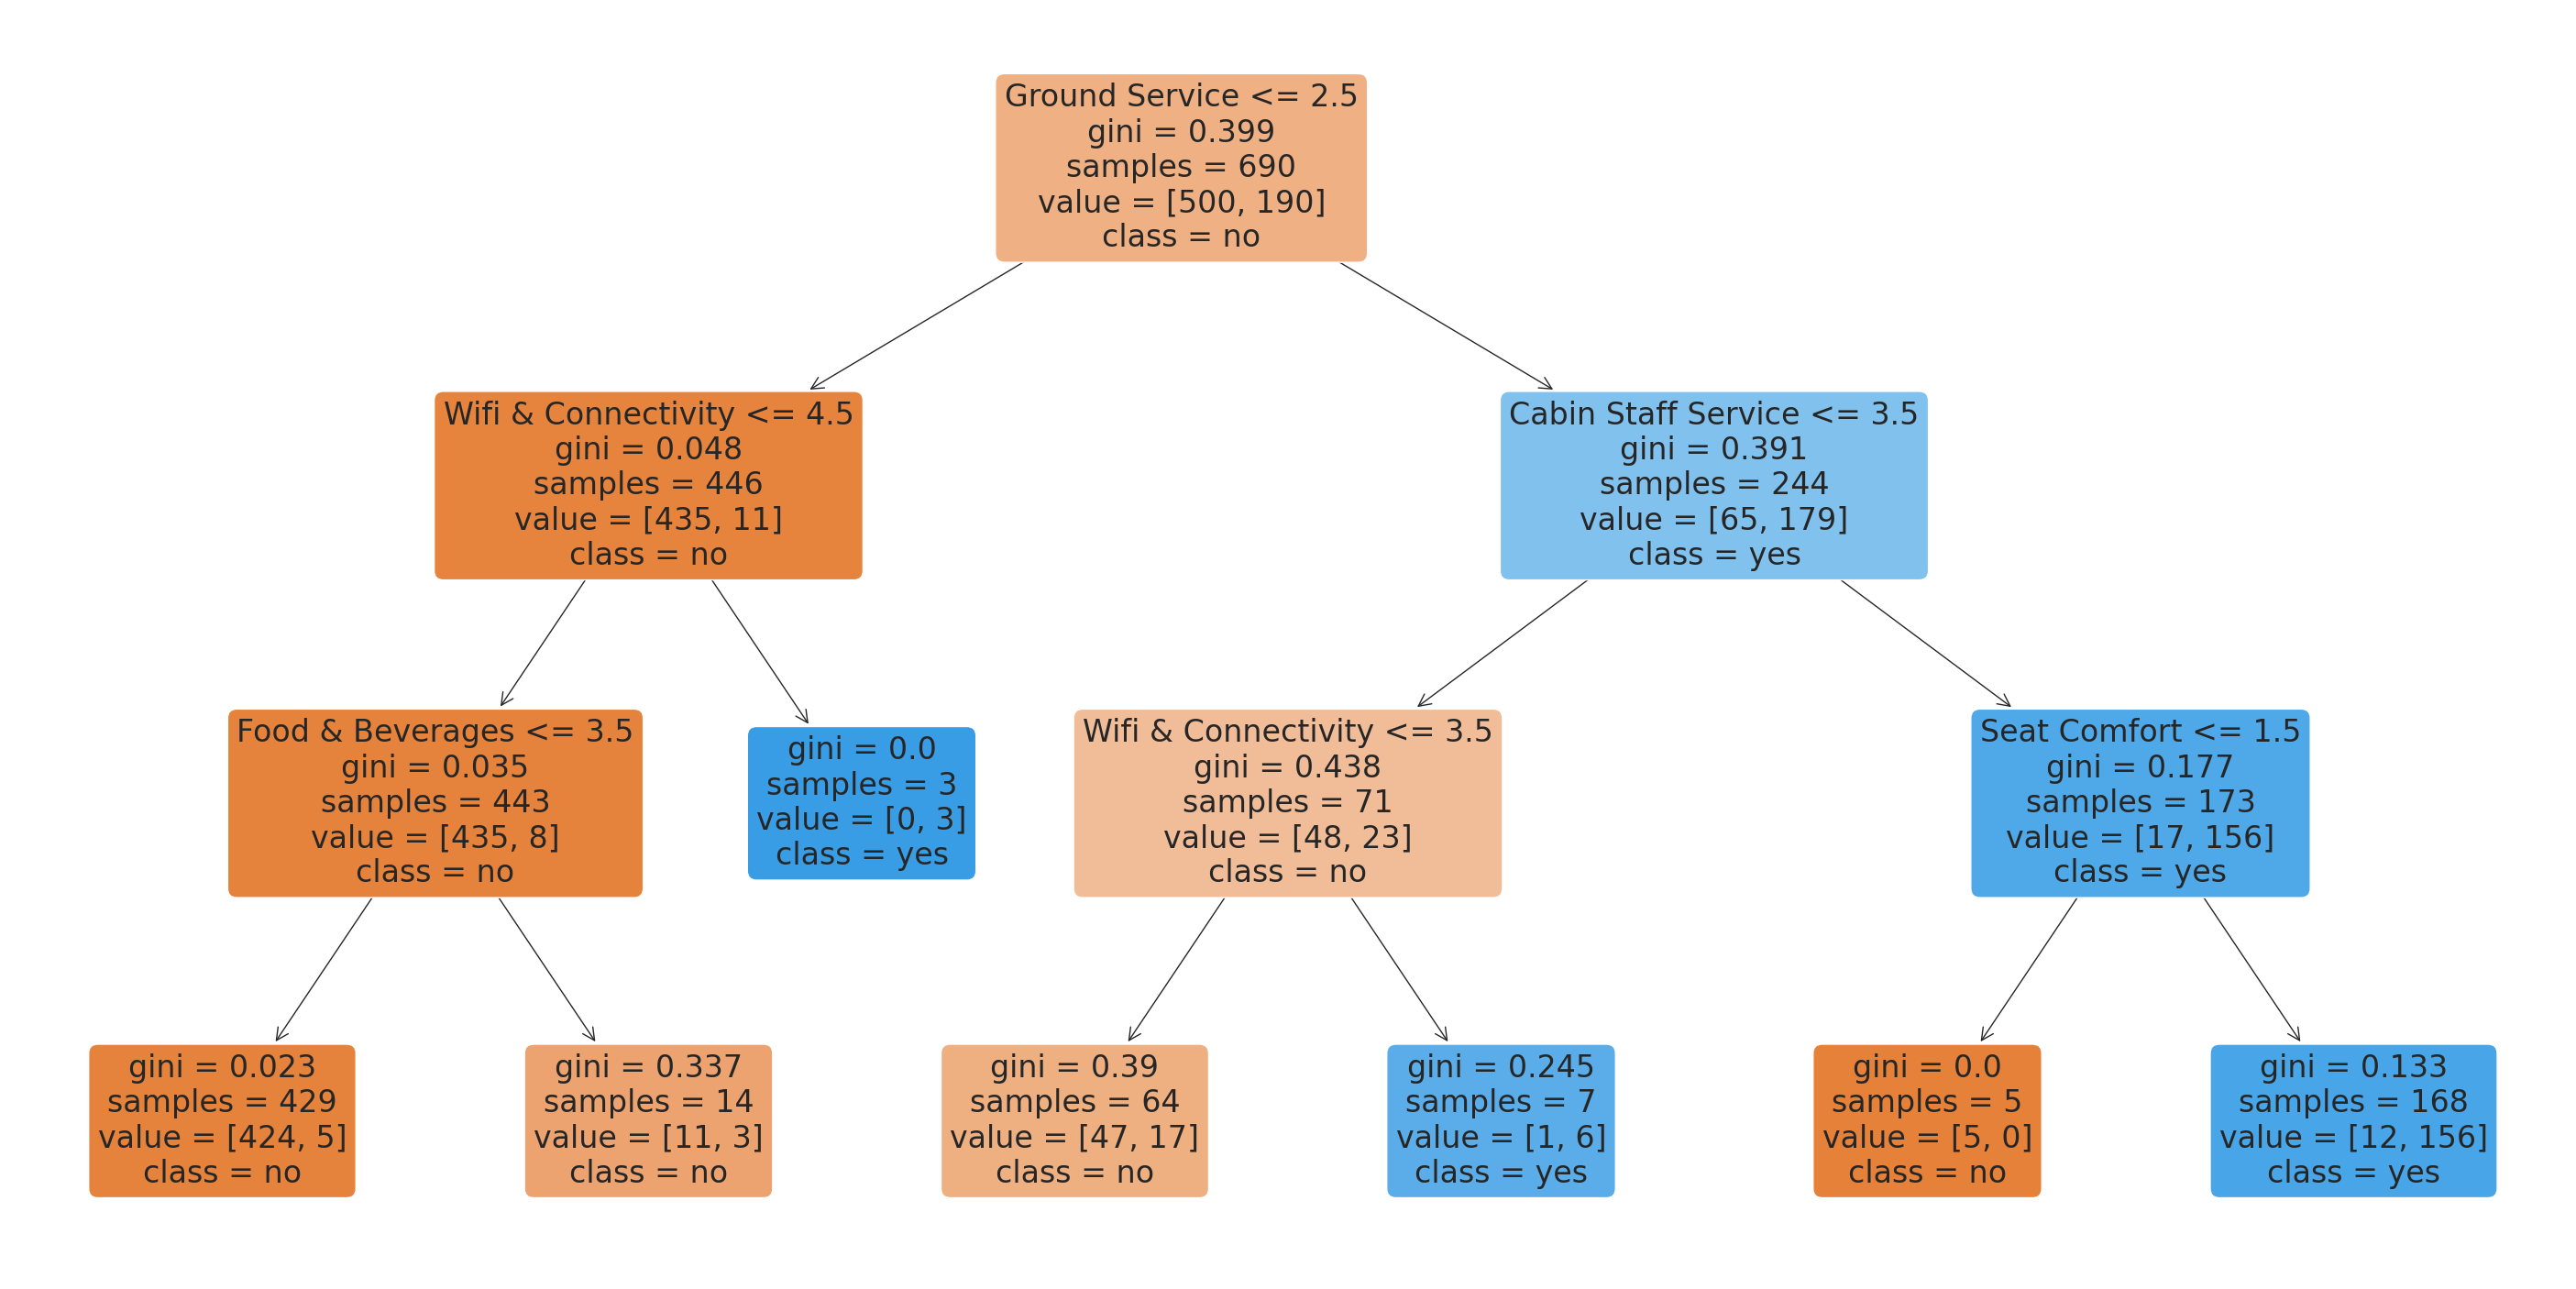

Feature importances:
Seat Comfort: 0.03953451360989358
Cabin Staff Service: 0.15869670737860941
Food & Beverages: 0.005256597041118881
Ground Service: 0.7485325128972088
Inflight Entertainment: 0.0
Wifi & Connectivity: 0.0479796690731694


In [62]:
# Extract Response and Predictors
y = pd.DataFrame(Pre_Covid_dropped_Review['Recommended'])
X = pd.DataFrame(Pre_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)  # create the decision tree object with a specified depth
dectree.fit(X_train, y_train)                   # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(18, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in dectree.classes_])

plt.show()

# Get feature importances
feature_importances = dectree.feature_importances_

# Zip feature names and their importance scores and convert to a dictionary
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Print the feature importances
print("Feature importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9504434011476265

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9389671361502347



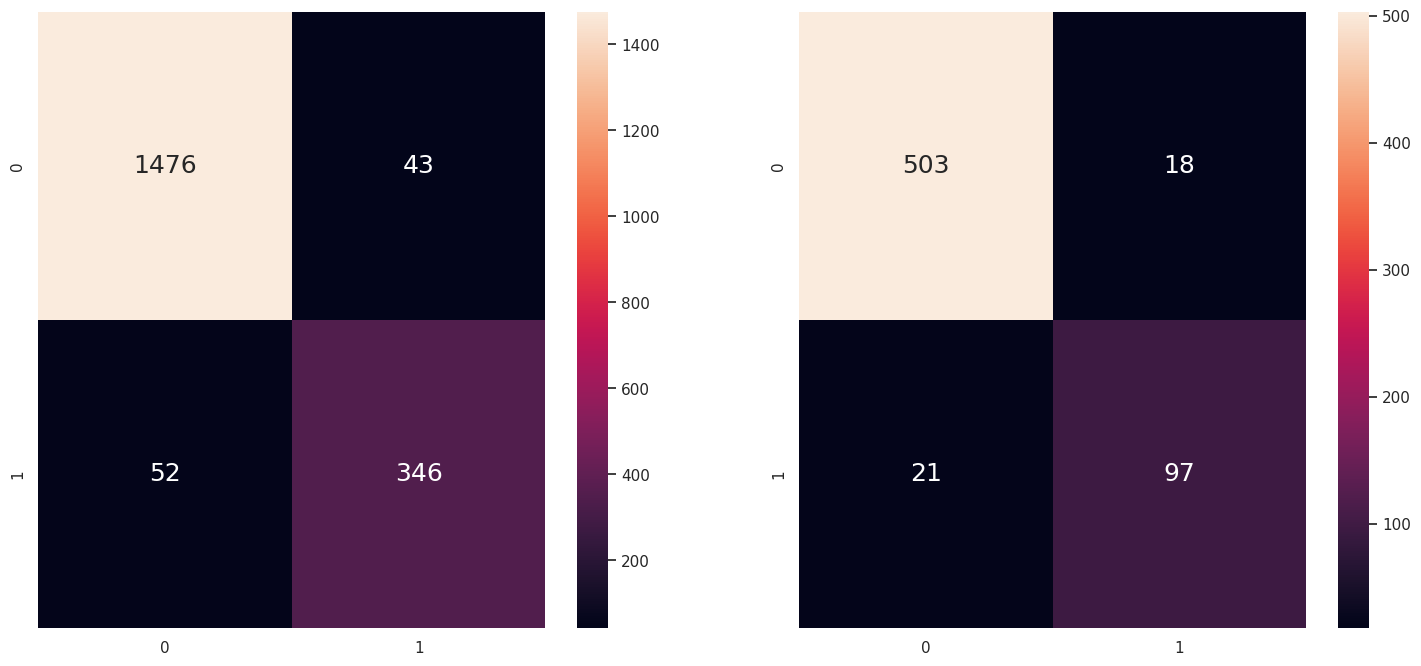

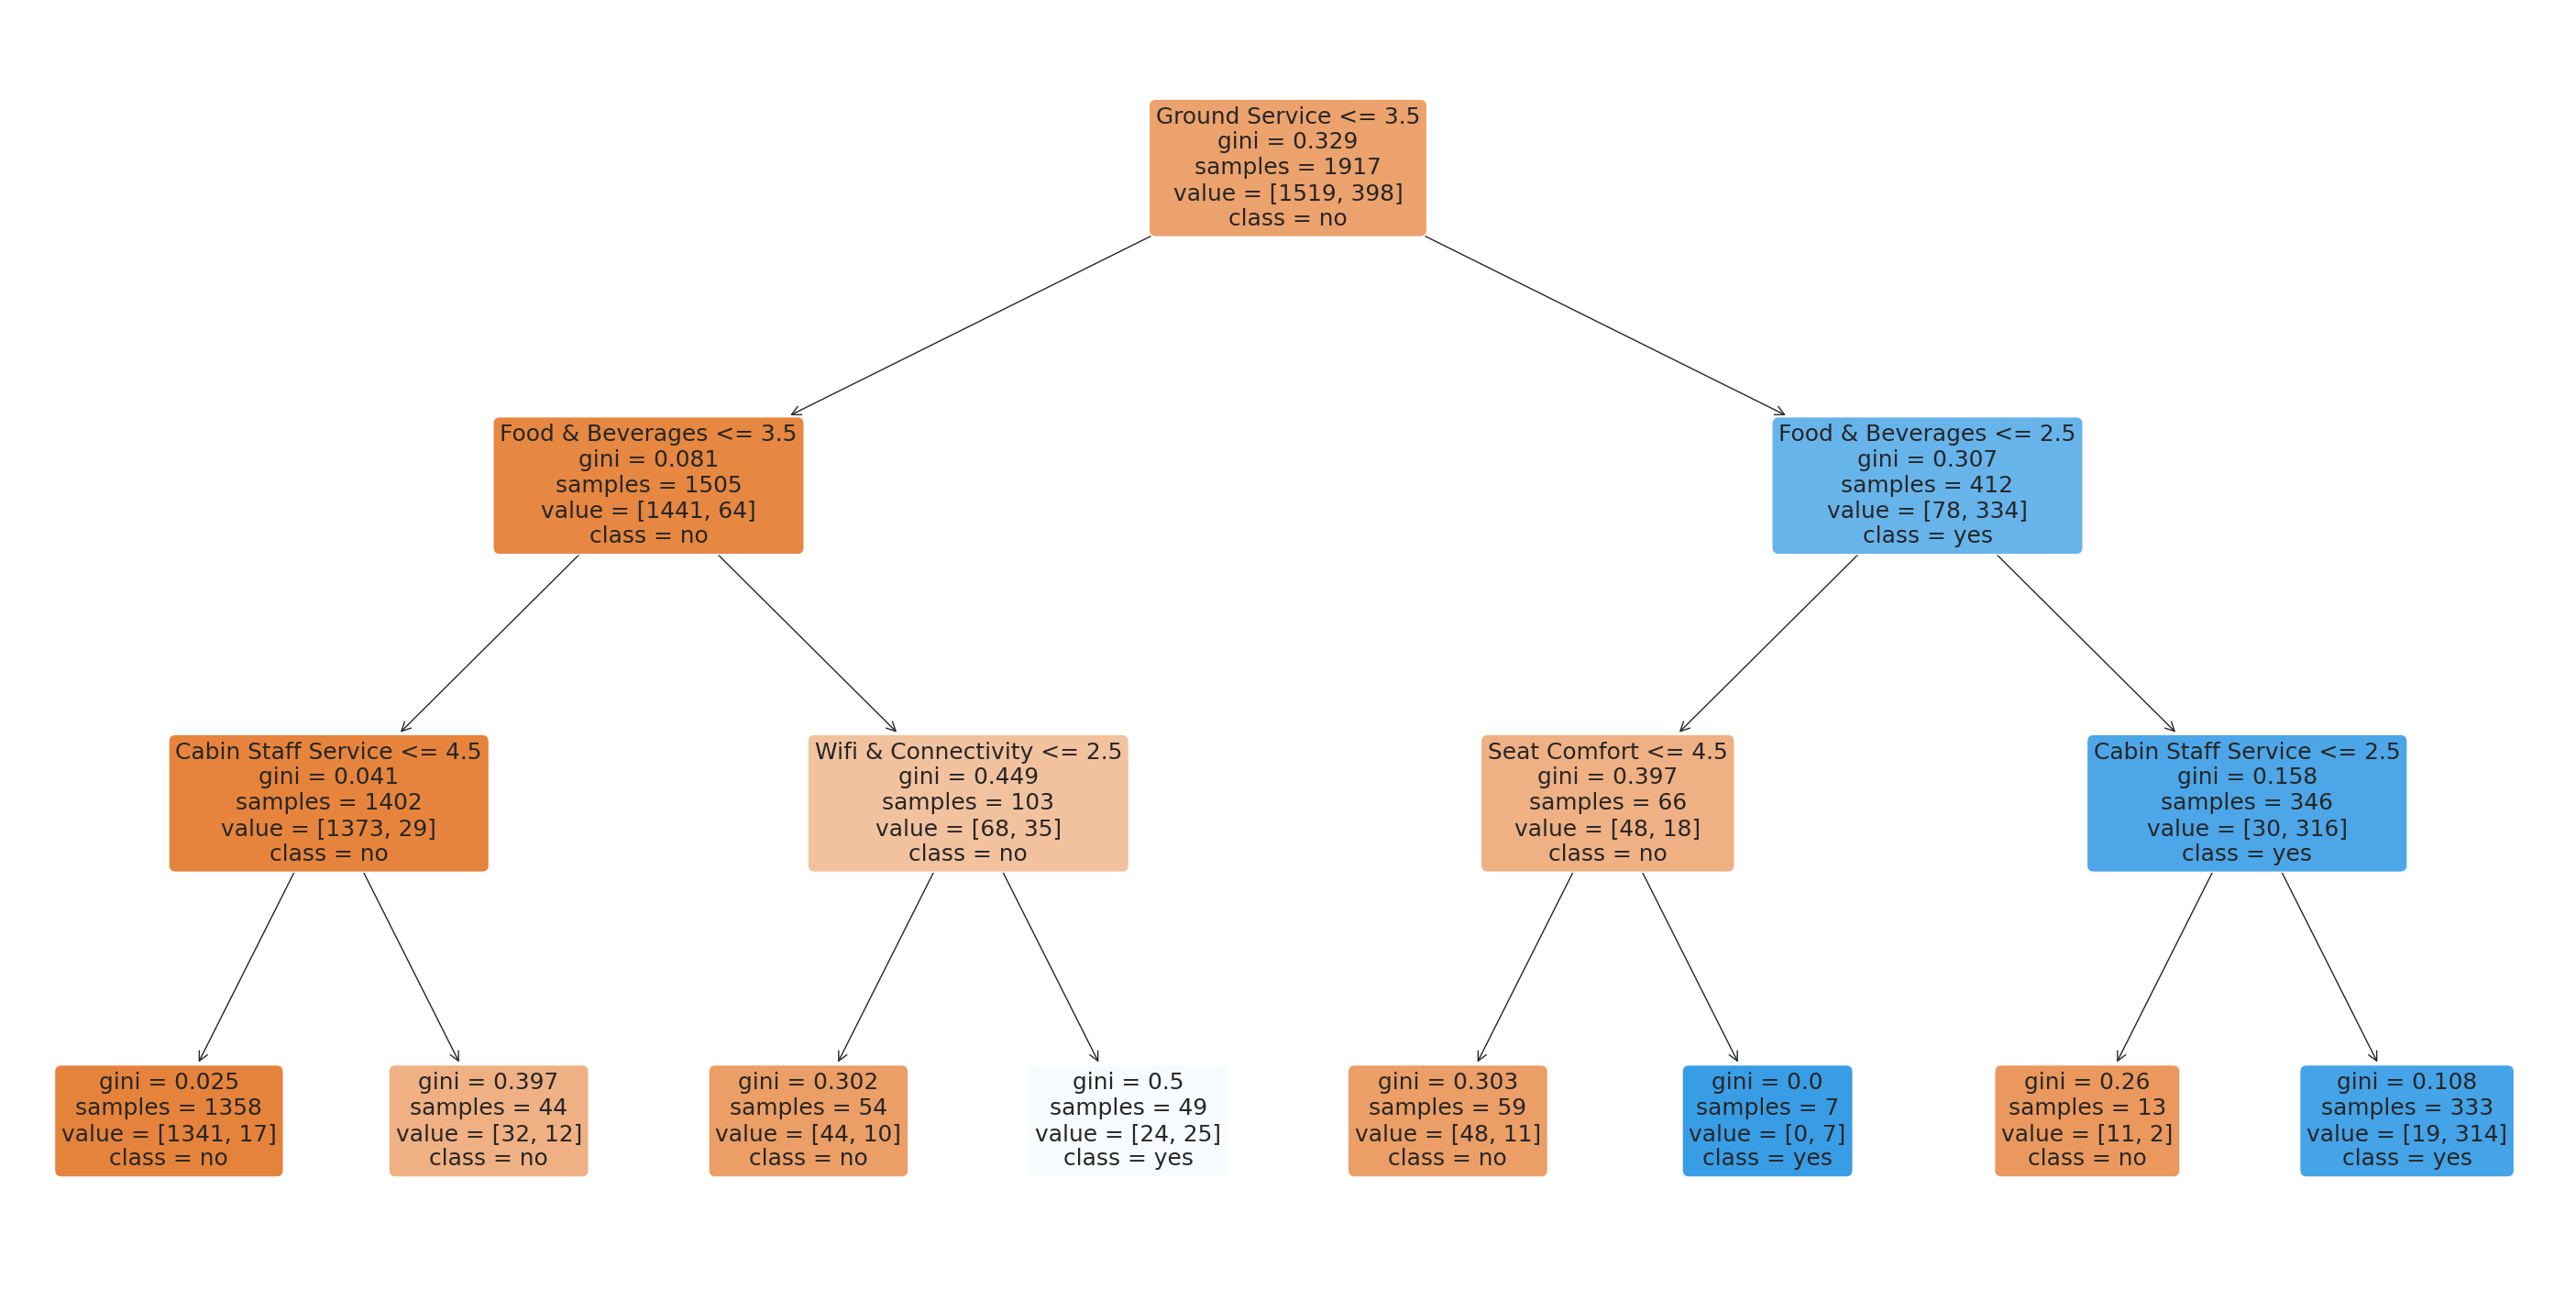

Feature importances:
Seat Comfort: 0.01719256577509584
Cabin Staff Service: 0.04431768091627367
Food & Beverages: 0.13496967078837674
Ground Service: 0.7922552182089113
Inflight Entertainment: 0.0
Wifi & Connectivity: 0.011264864311342411


In [63]:
# Extract Response and Predictors
y = pd.DataFrame(Post_Covid_dropped_Review['Recommended'])
X = pd.DataFrame(Post_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)  # create the decision tree object with a specified depth
dectree.fit(X_train, y_train)                   # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(18, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in dectree.classes_])

plt.show()

# Get feature importances
feature_importances = dectree.feature_importances_

# Zip feature names and their importance scores and convert to a dictionary
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Print the feature importances
print("Feature importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

For recommendation, post COVID ground service further cemented its place as the most important factor. However, second place moved from cabin staff service pre covid to food & beverages post covid. This could be due to the fact that during COVID, passengers had come to terms with the fact that cabin staff service would had to be done with precautions and measurements and hence did not give as much importance to it as before. 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6318840579710145

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5324675324675324



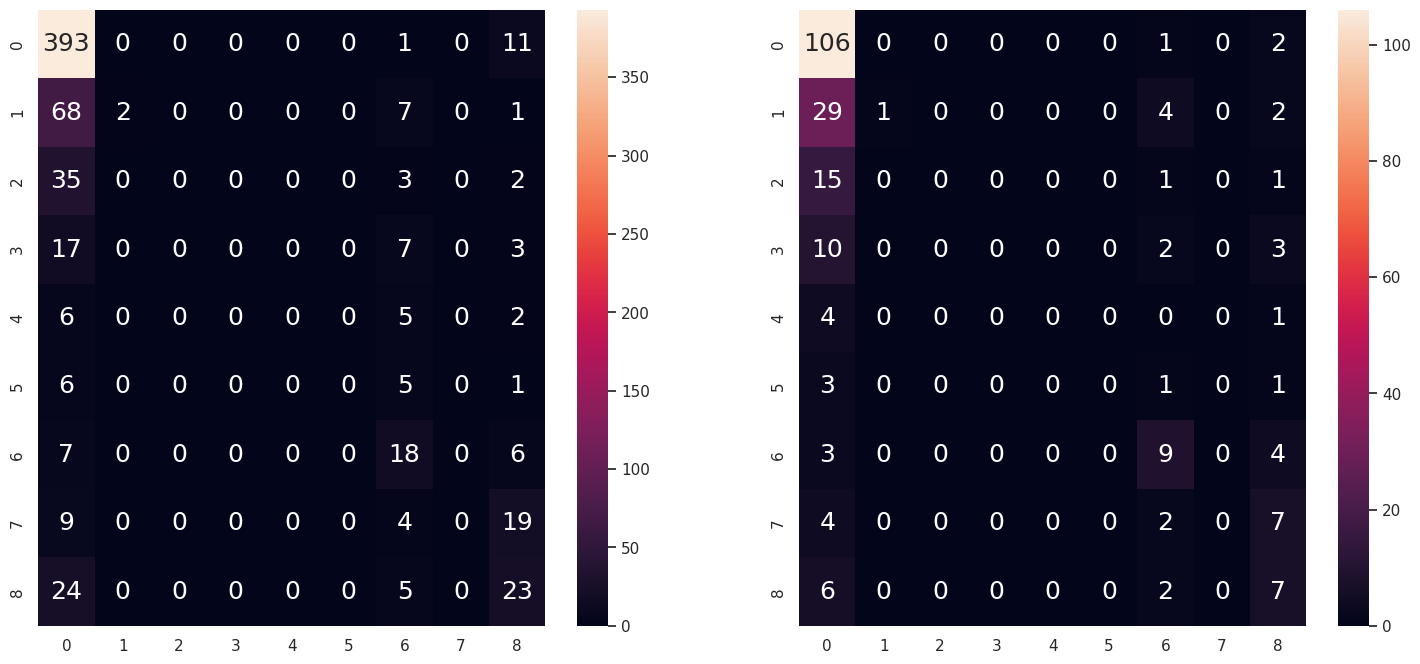

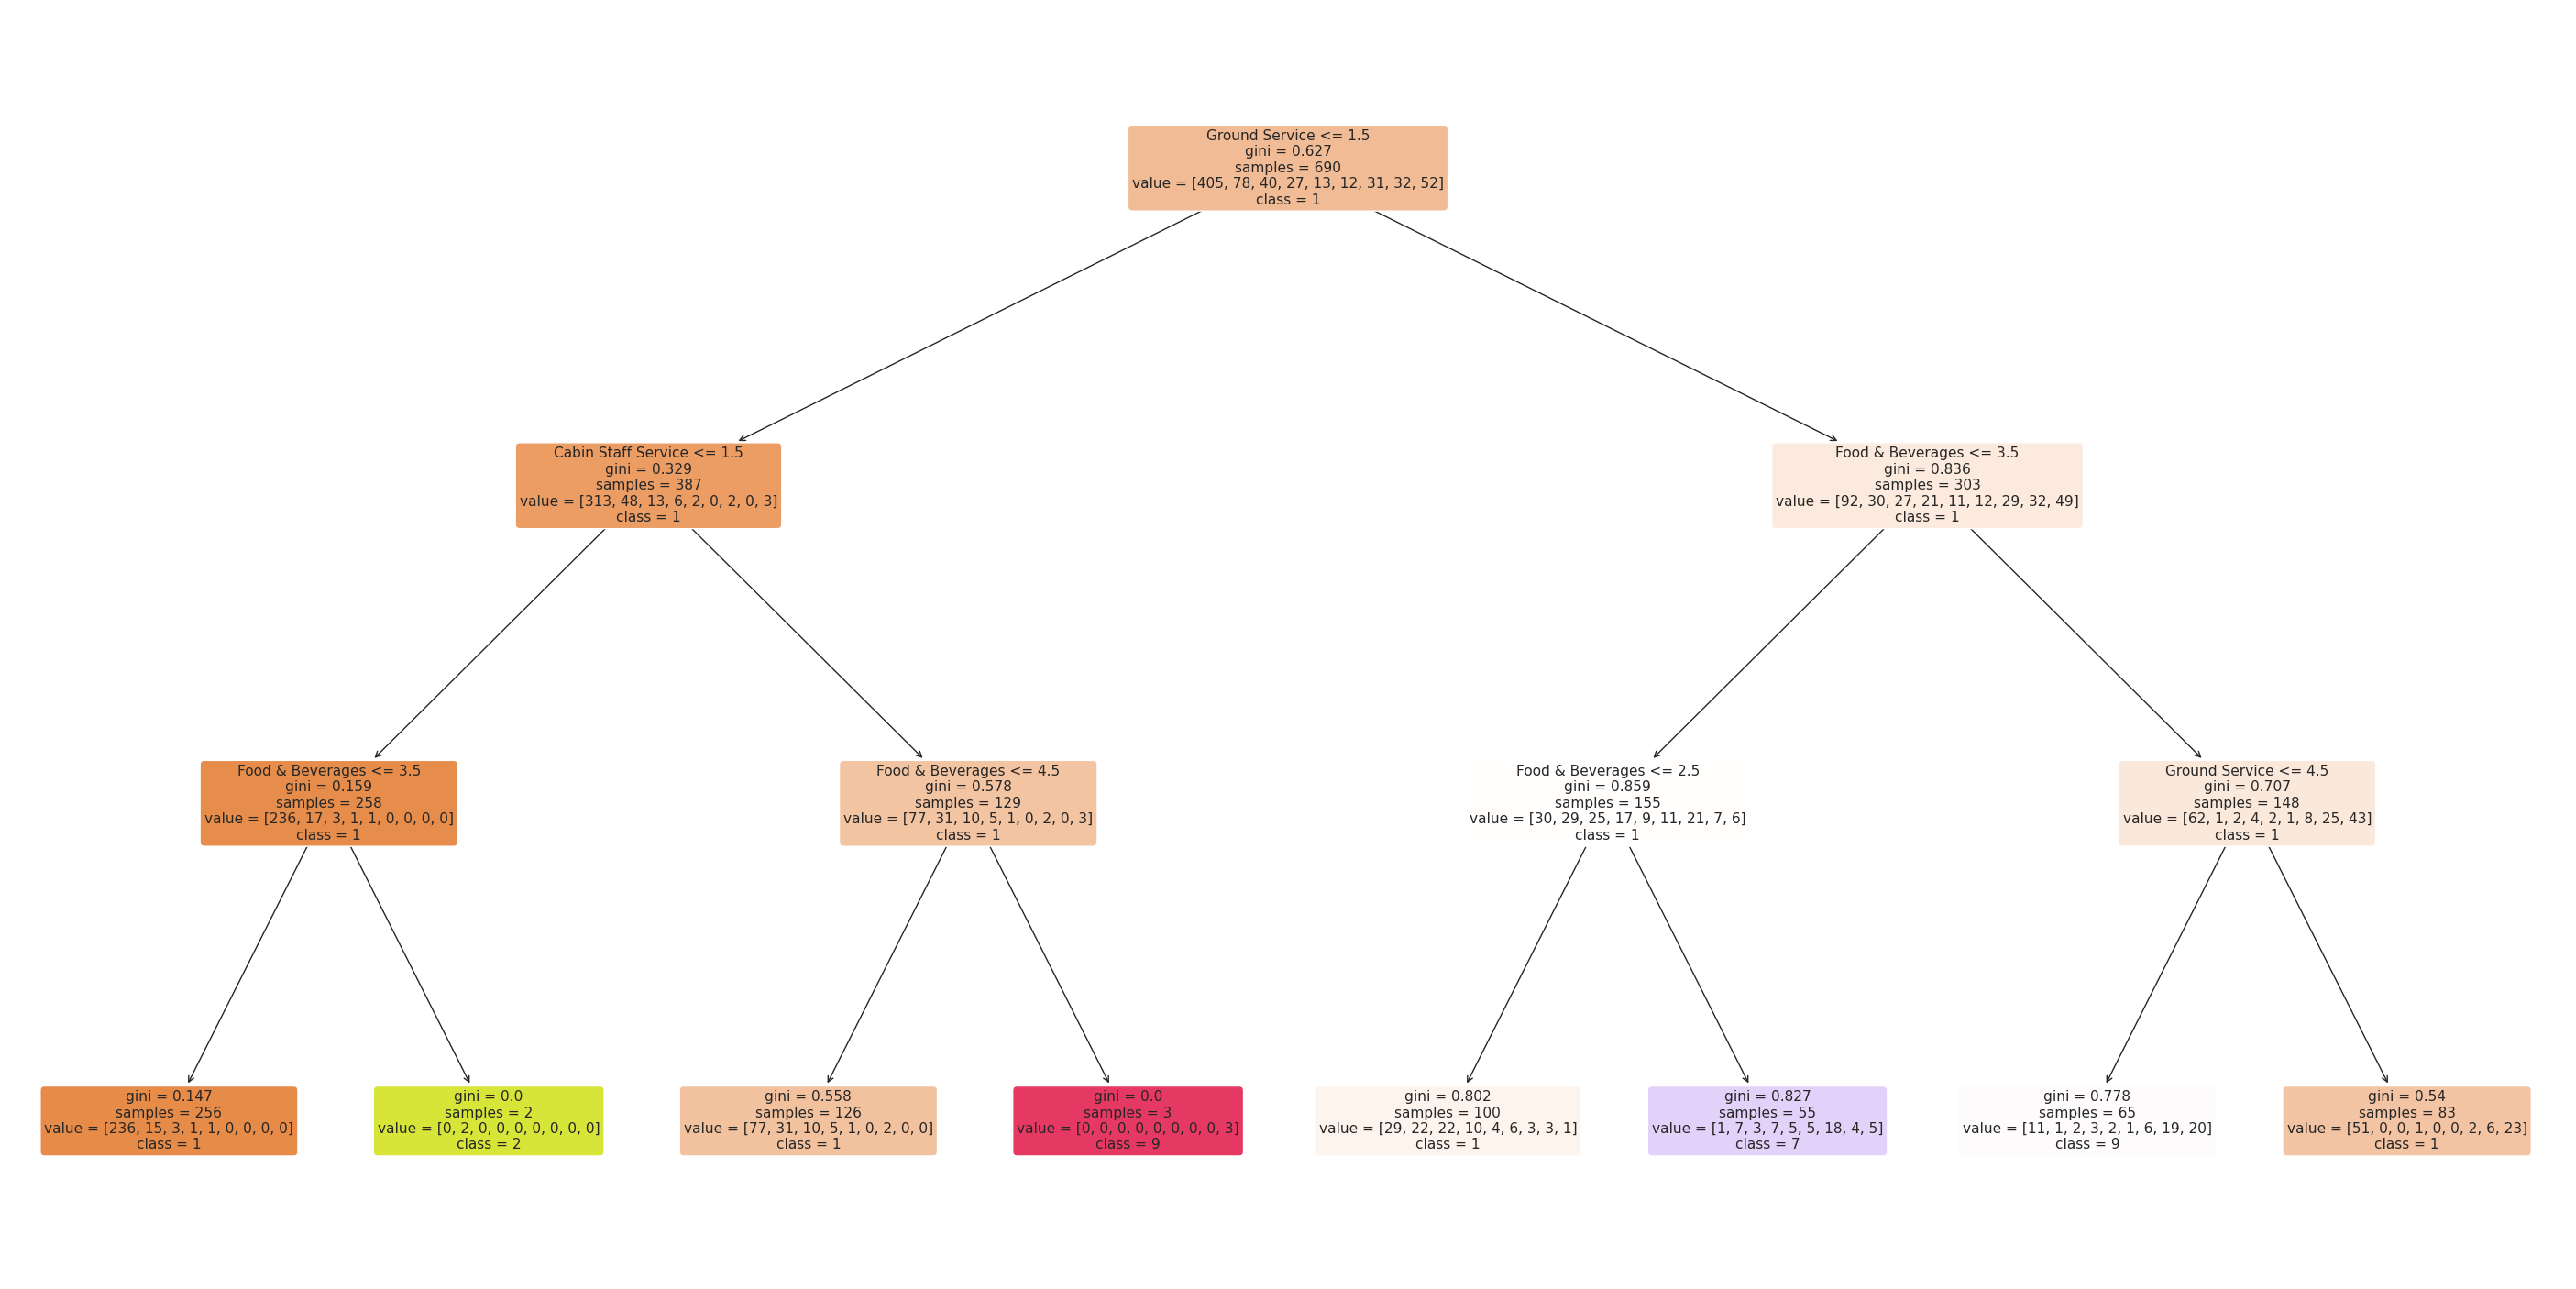

Feature importances:
Seat Comfort: 0.0
Cabin Staff Service: 0.11397803357723309
Food & Beverages: 0.2939201280858989
Ground Service: 0.5921018383368679
Inflight Entertainment: 0.0
Wifi & Connectivity: 0.0


In [64]:
# Extract Response and Predictors
y = pd.DataFrame(Pre_Covid_dropped_Review['Overall_Rating'])
X = pd.DataFrame(Pre_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)  # create the decision tree object with a specified depth
dectree.fit(X_train, y_train)                   # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(18, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in dectree.classes_])

plt.show()

# Get feature importances
feature_importances = dectree.feature_importances_

# Zip feature names and their importance scores and convert to a dictionary
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Print the feature importances
print("Feature importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6374543557642149

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.647887323943662



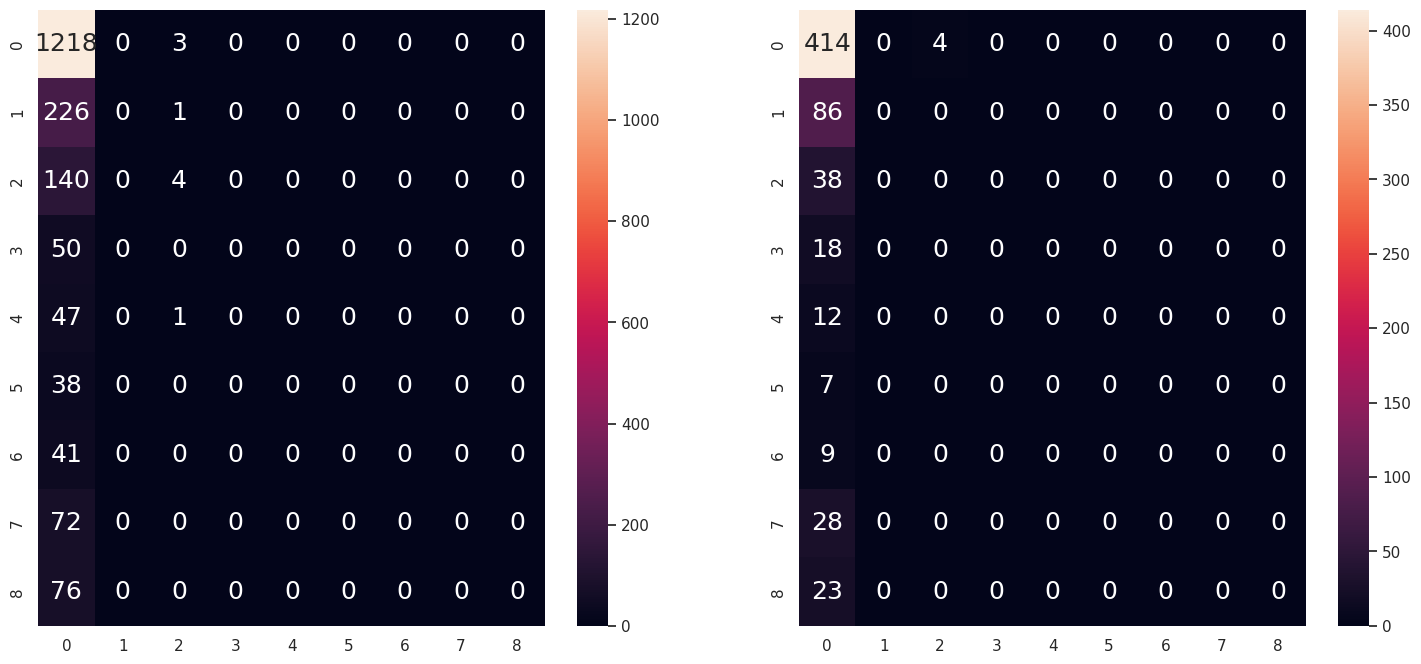

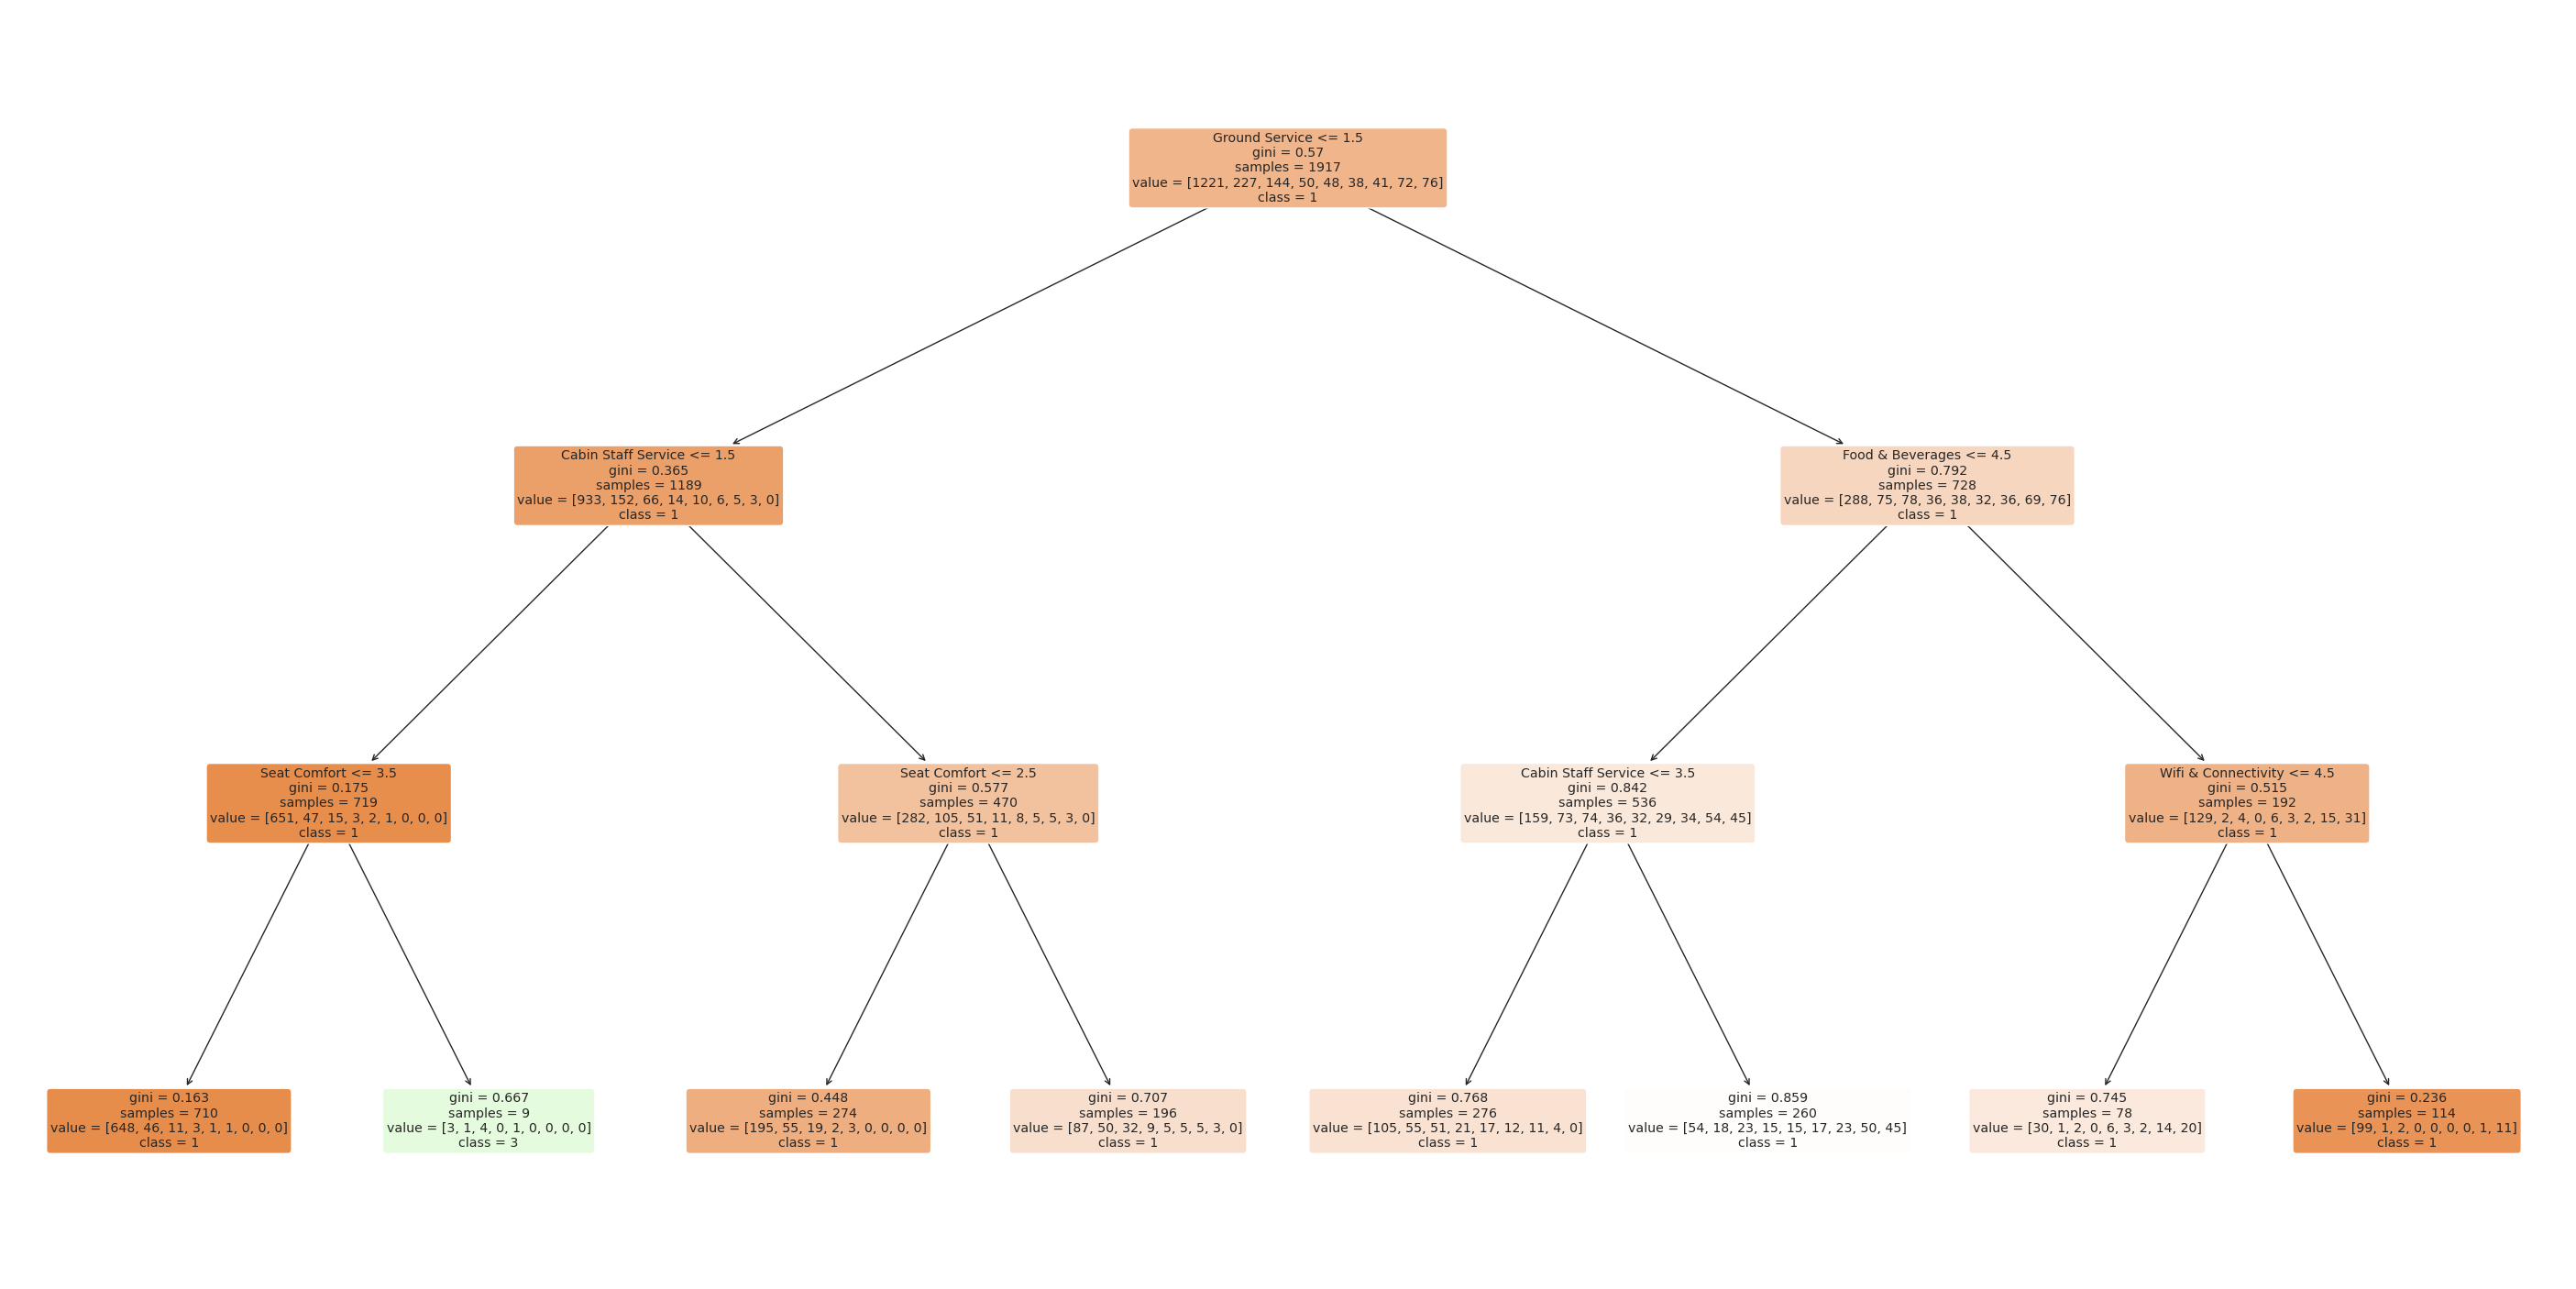

Feature importances:
Seat Comfort: 0.07766899526453652
Cabin Staff Service: 0.276638752926856
Food & Beverages: 0.1397194425222624
Ground Service: 0.4330939880559758
Inflight Entertainment: 0.0
Wifi & Connectivity: 0.07287882123036916


In [65]:
# Extract Response and Predictors
y = pd.DataFrame(Post_Covid_dropped_Review['Overall_Rating'])
X = pd.DataFrame(Post_Covid_dropped_Review[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)  # create the decision tree object with a specified depth
dectree.fit(X_train, y_train)                   # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(18, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in dectree.classes_])

plt.show()

# Get feature importances
feature_importances = dectree.feature_importances_

# Zip feature names and their importance scores and convert to a dictionary
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Print the feature importances
print("Feature importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

For the overall rating, comparing pre and post COVID we see that the ground service is still the most important factor. Although, it has list some ground to cabin staff service which saw more than an a 100% increase in importance. Post COVID, wifi and connectivity and seat comfort have also become slightly more important relative to pre COVID

### Data Driven Insights & Recommendations

Using the numbers we retrived for recommendations per seat type for the dropped dataset, we will create a comparison to identify how the recommendation per seat type for full service airline reviews have changed.

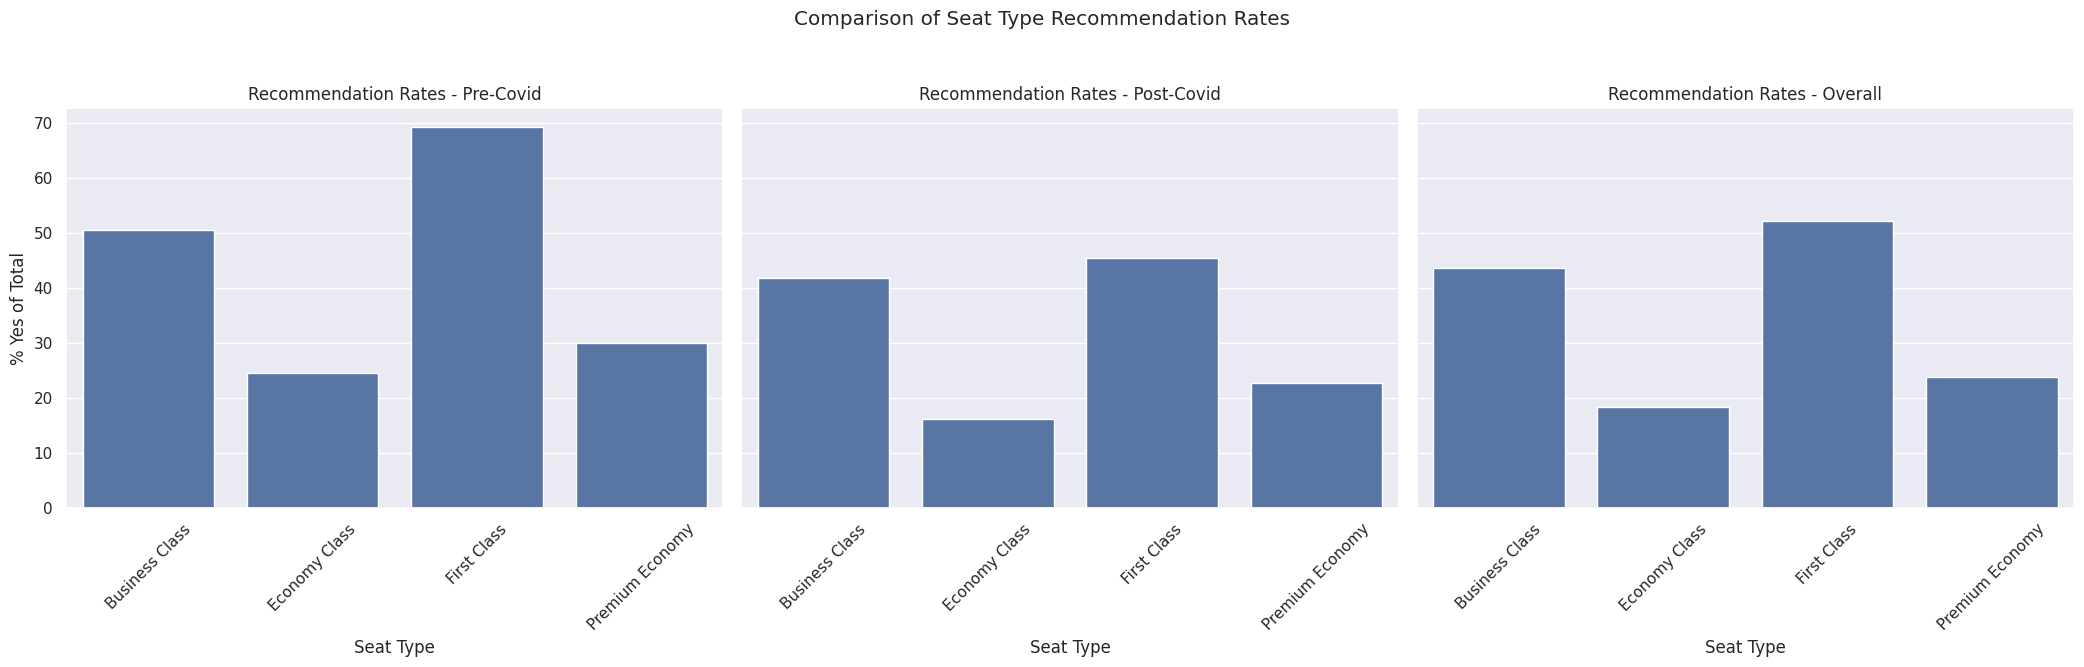

In [66]:
data_overall = {
    'Seat Type': ['Business Class', 'Economy Class', 'First Class', 'Premium Economy'],
    'No': [243, 2339, 22, 99],
    'Yes': [189, 530, 24, 31],
    'Total': [432, 2869, 46, 130],
    '% Yes of Total': [43.75, 18.47, 52.17, 23.85]
}

data_pre_covid = {
    'Seat Type': ['Business Class', 'Economy Class', 'First Class', 'Premium Economy'],
    'No': [47, 598, 4, 14],
    'Yes': [48, 195, 9, 6],
    'Total': [95, 793, 13, 20],
    '% Yes of Total': [50.53, 24.59, 69.23, 30.00]
}

data_post_covid = {
    'Seat Type': ['Business Class', 'Economy Class', 'First Class', 'Premium Economy'],
    'No': [196, 1741, 18, 85],
    'Yes': [141, 335, 15, 25],
    'Total': [337, 2076, 33, 110],
    '% Yes of Total': [41.84, 16.14, 45.45, 22.73]
}

# Creating DataFrames for each period
df_overall = pd.DataFrame(data_overall).set_index('Seat Type')
df_pre_covid = pd.DataFrame(data_pre_covid).set_index('Seat Type')
df_post_covid = pd.DataFrame(data_post_covid).set_index('Seat Type')

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

# Titles for each subplot
titles = ['Pre-Covid', 'Post-Covid', 'Overall']

# DataFrames in a list for iteration
dfs = [df_pre_covid, df_post_covid, df_overall]

for i, df in enumerate(dfs):
    sb.barplot(ax=axes[i], x=df.index, y='% Yes of Total', data=df)
    axes[i].set_title(f'Recommendation Rates - {titles[i]}')
    axes[i].set_xlabel('Seat Type')
    axes[i].set_ylabel('% Yes of Total' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

# Overall title and layout adjustment
plt.suptitle('Comparison of Seat Type Recommendation Rates')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the overall title
plt.show()


Economy Class: It has the lowest recommendation rates overall, but there is an interesting slight decrease in the post-Covid period. This could indicate the impact of service changes due to the pandemic or shifts in passenger expectations.

Premium Economy: Shows a varying recommendation rate, but it seems to maintain a mid-range position across all periods.

Business Class: It seems to have consistently high recommendation rates, with a noticeable peak in the pre-Covid dataset. This might suggest that business-class service was particularly appreciated during that period, or fewer business travelers had negative experiences.

First Class: First Class shows the highest recommendation rate pre-Covid, which suggests a particularly high level of satisfaction. The post-Covid drop could reflect changes in service or passenger expectations due to the pandemic.


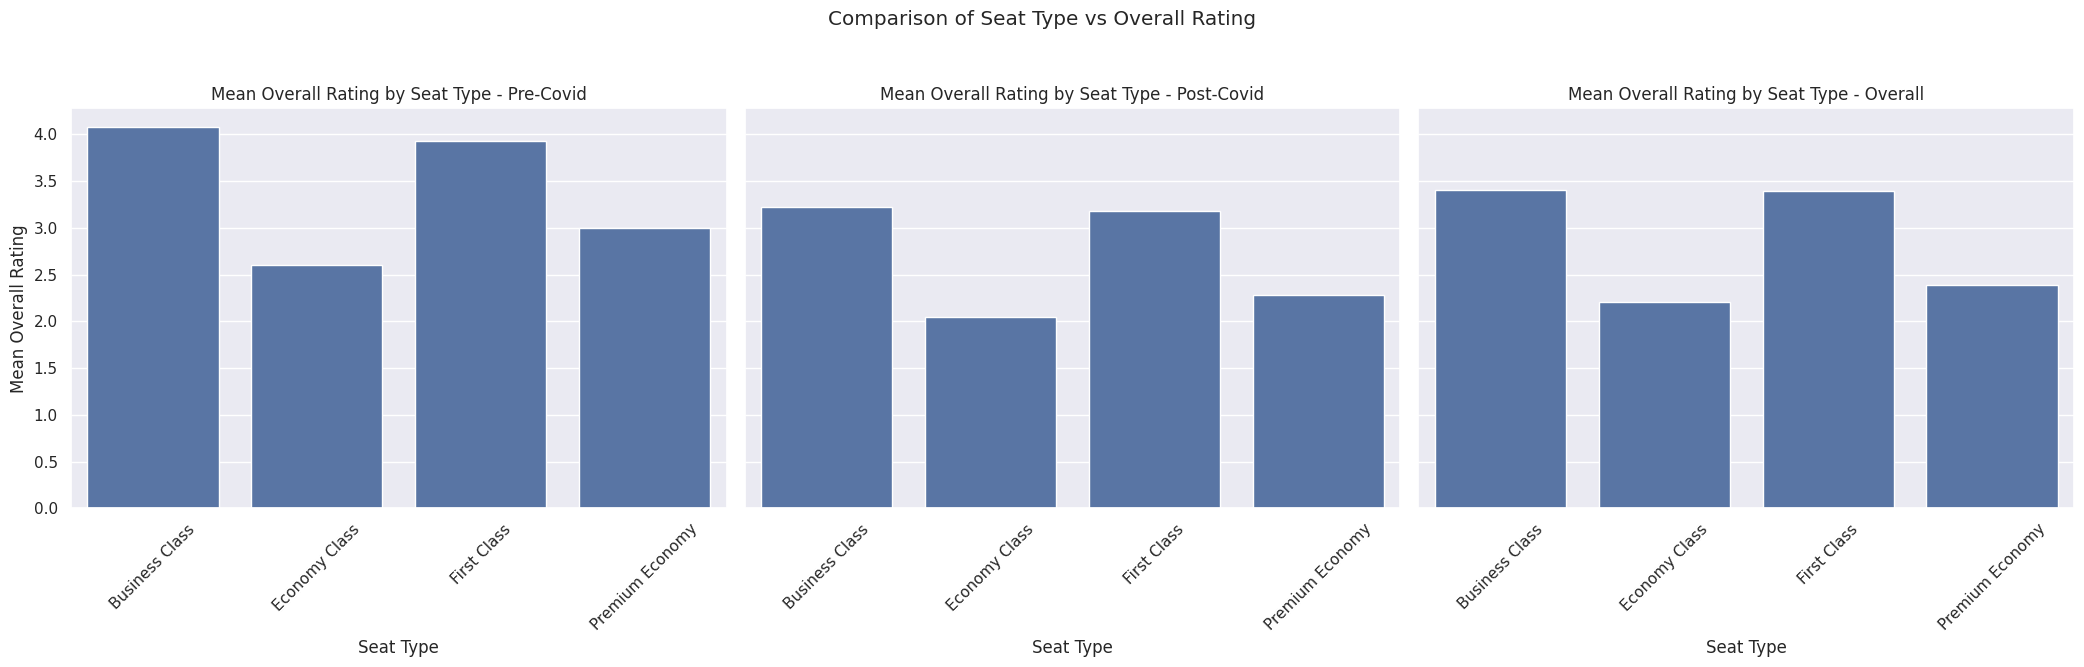

In [67]:
data_overall = {
    'Seat Type': ['Business Class', 'Economy Class', 'First Class', 'Premium Economy'],
    'Mean Overall Rating': [3.407407, 2.202858, 3.391304, 2.392308]
}

data_pre_covid = {
    'Seat Type': ['Business Class', 'Economy Class', 'First Class', 'Premium Economy'],
    'Mean Overall Rating': [4.073684, 2.606557, 3.923077, 3.000000]
}

data_post_covid = {
    'Seat Type': ['Business Class', 'Economy Class', 'First Class', 'Premium Economy'],
    'Mean Overall Rating': [3.219585, 2.048651, 3.181818, 2.281818]
}

# Convert dictionaries into DataFrames
df_overall = pd.DataFrame(data_overall)
df_pre_covid = pd.DataFrame(data_pre_covid)
df_post_covid = pd.DataFrame(data_post_covid)

# Set 'Seat Type' as the index for each DataFrame
df_overall.set_index('Seat Type', inplace=True)
df_pre_covid.set_index('Seat Type', inplace=True)
df_post_covid.set_index('Seat Type', inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

# Titles for each subplot
titles = ['Pre-Covid', 'Post-Covid', 'Overall']

# DataFrames in a list for iteration
dfs = [df_pre_covid, df_post_covid, df_overall]

for i, df in enumerate(dfs):
    sb.barplot(ax=axes[i], x=df.index, y='Mean Overall Rating', data=df)
    axes[i].set_title(f'Mean Overall Rating by Seat Type - {titles[i]}')
    axes[i].set_xlabel('Seat Type')
    axes[i].set_ylabel('Mean Overall Rating' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

# Overall title and layout adjustment
plt.suptitle('Comparison of Seat Type vs Overall Rating')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the overall title
plt.show()


Economy Class: Continues to have the lowest mean overall rating, which further declined post-COVID. This could reflect dissatisfaction with cramped spaces and less personalised service due to COVID protocols.

Premium Economy: Saw a significant decrease in mean overall rating as well, which could also be attributed to the less personalised services which could have made passengers feel that they are not getting the premium they paid for over economy passengers leading to dissent.

Business Class: Also saw a drop in mean overall ratings post-COVID, possibly due to reduced business travel or cutbacks in service quality as explained above.

First Class: Although there was a decrease, it maintains a relatively high mean overall rating, suggesting sustained satisfaction among premium passengers.


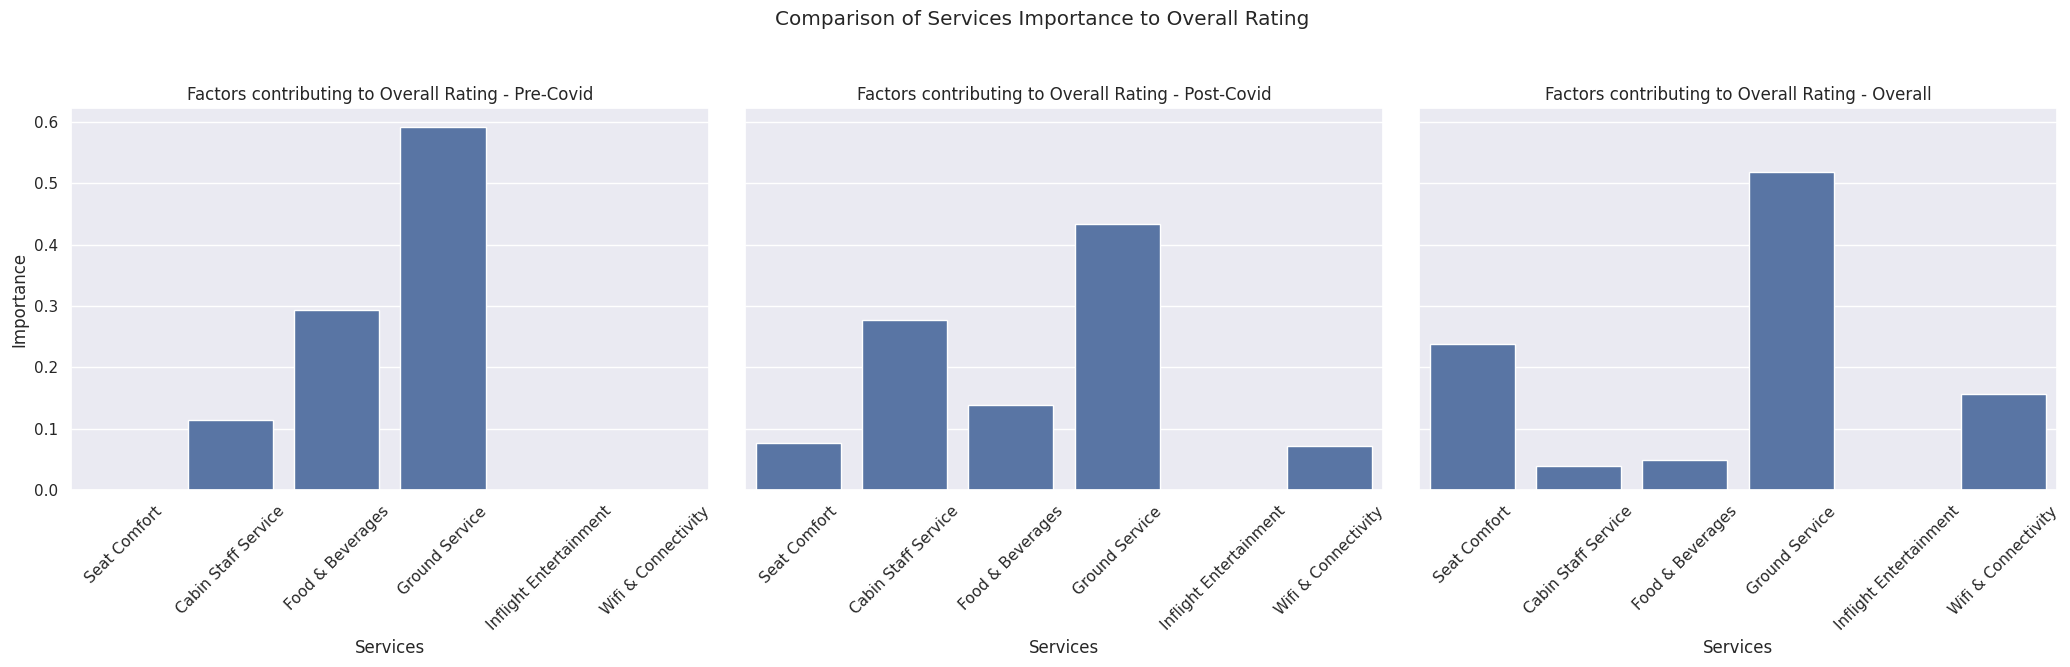

In [68]:
# Feature importance data provided
feature_importances_overall = {
    'Feature': ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
    'Importance': [0.2378544559004816, 0.039316395186285734, 0.0487355238593829, 0.5178817922247565, 0.0, 0.15621183282909323]
}

feature_importances_pre_covid = {
    'Feature': ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
    'Importance': [0.0, 0.11397803357723309, 0.2939201280858989, 0.5921018383368679, 0.0, 0.0]
}

feature_importances_post_covid = {
    'Feature': ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
    'Importance': [0.07766899526453652, 0.276638752926856, 0.1397194425222624, 0.4330939880559758, 0.0, 0.07287882123036916]
}

# Convert dictionaries into DataFrames
df_importances_overall = pd.DataFrame(feature_importances_overall)
df_importances_pre_covid = pd.DataFrame(feature_importances_pre_covid)
df_importances_post_covid = pd.DataFrame(feature_importances_post_covid)

# Setting 'Feature' as the index for each DataFrame
df_importances_overall.set_index('Feature', inplace=True)
df_importances_pre_covid.set_index('Feature', inplace=True)
df_importances_post_covid.set_index('Feature', inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

# Titles for each subplot
titles = ['Pre-Covid', 'Post-Covid', 'Overall']

# DataFrames in a list for iteration
dfs = [df_importances_pre_covid, df_importances_post_covid, df_importances_overall]

for i, df in enumerate(dfs):
    sb.barplot(ax=axes[i], x=df.index, y='Importance', data=df)
    axes[i].set_title(f'Factors contributing to Overall Rating - {titles[i]}')
    axes[i].set_xlabel('Services')
    axes[i].set_ylabel('Importance' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

# Overall title and layout adjustment
plt.suptitle('Comparison of Services Importance to Overall Rating')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the overall title
plt.show()

Ground Service consistently holds the highest importance in influencing mean overall rating across all periods. 

Food & Beverages sees a notable decrease in importance for airlines recommendation in the post-Covid period compared to being the second most important factor pre-Covid.

Wifi and connectivity sees an increase in importance post-Covid.

Seat Comfort has low importance pre and post Covid but in the overall model it seems to have a higher importance which is intriguing observation.


Considering the following airlines should : (to improve overall rating)

1. Given the significant role of cabin staff post-Covid, invest in comprehensive training programs to ensure staff can effectively handle passenger requests and provide a premium service which is crucial in improving pasenger experience.

2. Maintain the high importance of ground services. Make ground services easily available and help adequately with customers' needs 

3. While entertainment is less critical, comfort and connectivity are increasingly important. Enhancing seat comfort, perhaps with more spacious seating arrangements or better cushioning, and improving wifi services could be key areas of improvement.


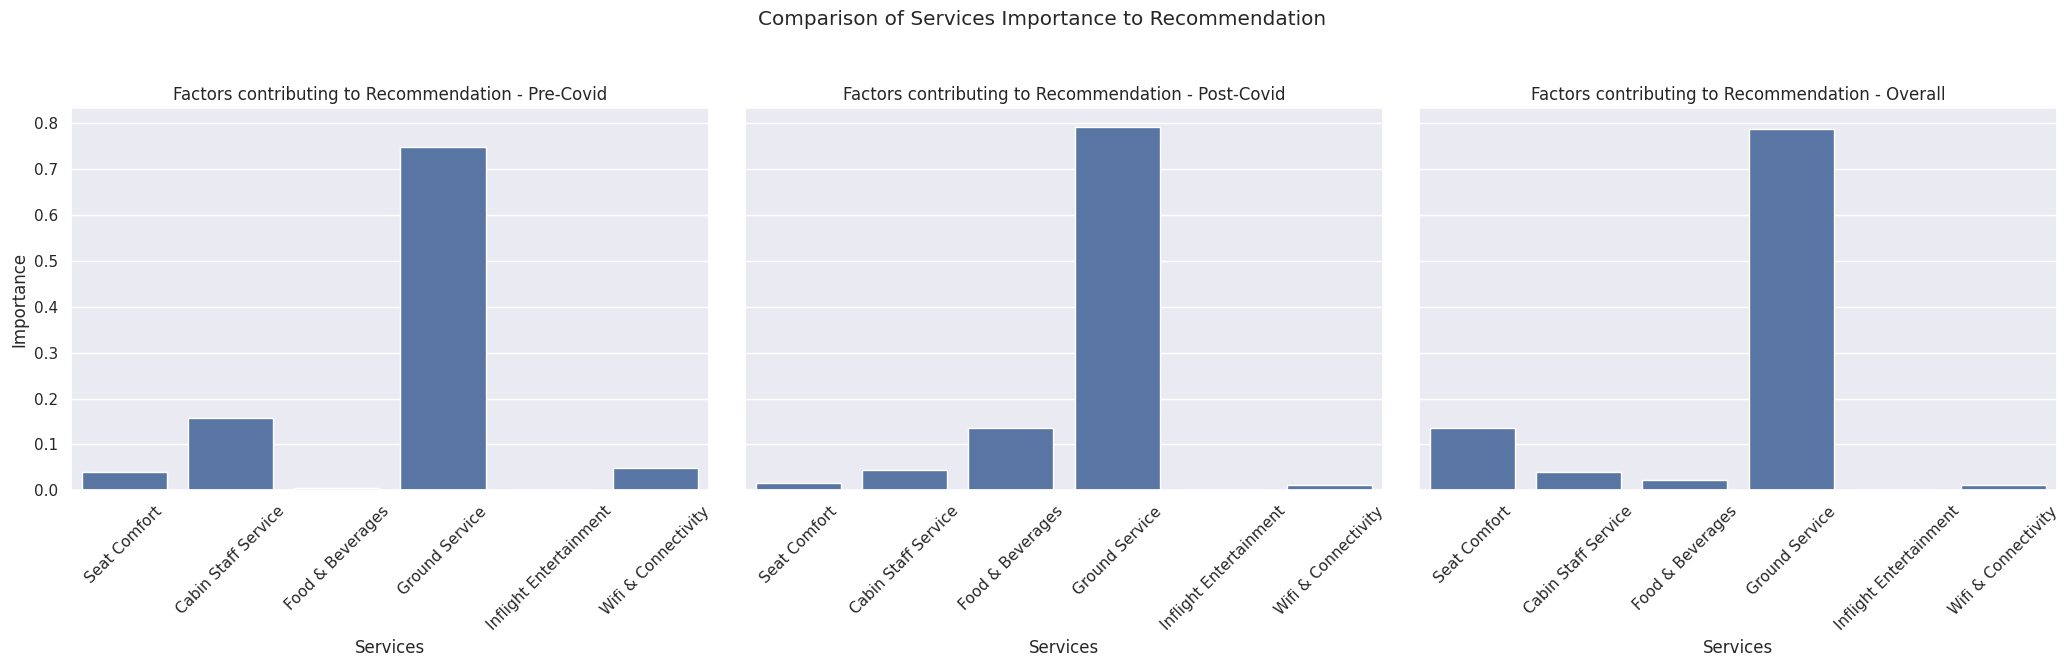

In [69]:
feature_importances_overall = {
    'Feature': ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
    'Importance': [0.13646521067168152, 0.04059715133050777, 0.022361931381605877, 0.7874564685666268, 0.0014398634094340208, 0.011679374640144102]
}

feature_importances_pre_covid = {
    'Feature': ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
    'Importance': [0.03953451360989358, 0.15869670737860941, 0.005256597041118881, 0.7485325128972088, 0.0, 0.0479796690731694]
}

feature_importances_post_covid = {
    'Feature': ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
    'Importance': [0.01719256577509584, 0.04431768091627367, 0.13496967078837674, 0.7922552182089113, 0.0, 0.011264864311342411]
}

# Convert dictionaries into DataFrames and set 'Feature' as the index
df_importances_overall = pd.DataFrame(feature_importances_overall)
df_importances_pre_covid = pd.DataFrame(feature_importances_pre_covid)
df_importances_post_covid = pd.DataFrame(feature_importances_post_covid)

# Setting 'Feature' as the index for each DataFrame
df_importances_overall.set_index('Feature', inplace=True)
df_importances_pre_covid.set_index('Feature', inplace=True)
df_importances_post_covid.set_index('Feature', inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

# Titles for each subplot
titles = ['Pre-Covid', 'Post-Covid', 'Overall']

# DataFrames in a list for iteration
dfs = [df_importances_pre_covid, df_importances_post_covid, df_importances_overall]

for i, df in enumerate(dfs):
    sb.barplot(ax=axes[i], x=df.index, y='Importance', data=df)
    axes[i].set_title(f'Factors contributing to Recommendation - {titles[i]}')
    axes[i].set_xlabel('Services')
    axes[i].set_ylabel('Importance' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

# Overall title and layout adjustment
plt.suptitle('Comparison of Services Importance to Recommendation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the overall title
plt.show()

Ground Service consistently holds the highest importance in influencing passenger recommendations across all periods. 

Food & Beverages sees a notable increase in importance for airlines recommendation in the post-Covid period compared to being negligible pre-Covid.

Importance of Cabin Staff Service and wifi and connectivity sees an decrease in importance post-Covid.

Seat Comfort has low importance pre and post Covid but in the overall model it seems to have a higher importance which is intriguing observation.


Considering the following airlines should: (to improve recommendation numbers)

1. Airlines should primarily focus on enhancing the efficiency, safety, and customer experience of ground services. 

2. This suggests a renewed interest or higher expectations in in-flight dining experiences has now possibly got renewed interest which means airlines need to provide high-quality meal options to get a good rating.

3. Airlines could improve or promote their cabin staff service as it was an important factor pre covid but now its relatively low so boosting this might be a differntiating factor for airlines. 

Although not a top priority, maintaining reliable connectivity could enhance passenger experience, especially for those who travel for business or need constant communication

Maintaining or enhancing seat comfort could improve passenger experience, especially as travel norms and expectations continue to evolve post-pandemic.

### Summary

Seat Types that yield the best reviews for Airlines:

Recommendation -> 1) First Class, 2) Business Class, 3) Premium Economy, 4) Economy

Overall Rating -> 1) Business Class, 2) First Class, 3) Premium Economy, 4) Economy


* However, should airlines want to improve their recommendation and overall rating numbers they should focus on improving their economy class product as that is the segment where passengers have the most complaints in.

Top Services to Focus on for Airlines (Our Final Judgement)

Recommendation -> 1) Ground Service, 2) Seat Comfort, 3) Food & Beverages
Overall Rating -> 1) Ground Service, 2) Cabin Staff Service, 3) Seat Comfort

* This does not just follow the overall importance. It accounts for any increase in importance post COVID suggesting that it might be for important for airlines to start focusing on these factors as well. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8cd8cf96-de9a-4936-bba7-f21125d77dad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>